In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
data=pd.read_csv('../fixtures.csv')

In [3]:
data.head()

week  Day        Date   Time             Home  HomeScore         Away  \
0   1.0  Fri  2024-08-16  20:00   Manchester Utd          1       Fulham   
1   1.0  Sat  2024-08-17  12:30     Ipswich Town          0    Liverpool   
2   1.0  Sat  2024-08-17  15:00    Newcastle Utd          1  Southampton   
3   1.0  Sat  2024-08-17  15:00          Everton          0     Brighton   
4   1.0  Sat  2024-08-17  15:00  Nott'ham Forest          1  Bournemouth   

   AwayScore  Attendance                 Venue         Referee  
0          0     73297.0          Old Trafford    Robert Jones  
1          2     30014.0  Portman Road Stadium    Tim Robinson  
2          0     52196.0        St James' Park    Craig Pawson  
3          3     39217.0         Goodison Park    Simon Hooper  
4          1     29763.0       The City Ground  Michael Oliver

In [4]:
data.tail()

week  Day        Date   Time             Home  HomeScore  \
375  38.0  Sun  2025-05-25  16:00  Nott'ham Forest          0   
376  38.0  Sun  2025-05-25  16:00           Fulham          0   
377  38.0  Sun  2025-05-25  16:00    Newcastle Utd          0   
378  38.0  Sun  2025-05-25  16:00      Bournemouth          2   
379  38.0  Sun  2025-05-25  16:00        Tottenham          1   

                Away  AwayScore  Attendance                      Venue  \
375          Chelsea          1     30263.0            The City Ground   
376  Manchester City          2     27671.0             Craven Cottage   
377          Everton          1     52221.0             St James' Park   
378   Leicester City          0     11238.0           Vitality Stadium   
379         Brighton          4     61449.0  Tottenham Hotspur Stadium   

             Referee  
375   Anthony Taylor  
376    Andrew Madley  
377  Tony Harrington  
378      Lewis Smith  
379     Robert Jones

In [5]:
data.shape

(380, 11)

In [6]:
data.size

4180

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.size

4180

In [9]:
data.isnull().sum()

week          0
Day           0
Date          0
Time          0
Home          0
HomeScore     0
Away          0
AwayScore     0
Attendance    4
Venue         0
Referee       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        380 non-null    float64
 1   Day         380 non-null    object 
 2   Date        380 non-null    object 
 3   Time        380 non-null    object 
 4   Home        380 non-null    object 
 5   HomeScore   380 non-null    int64  
 6   Away        380 non-null    object 
 7   AwayScore   380 non-null    int64  
 8   Attendance  376 non-null    float64
 9   Venue       380 non-null    object 
 10  Referee     380 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 32.8+ KB


In [11]:
data['Venue'].unique()

array(['Old Trafford', 'Portman Road Stadium', "St James' Park",
       'Goodison Park', 'The City Ground', 'Emirates Stadium',
       'London Stadium', 'Gtech Community Stadium', 'Stamford Bridge',
       'King Power Stadium', 'The American Express Stadium',
       'Etihad Stadium', "St Mary's Stadium", 'Tottenham Hotspur Stadium',
       'Craven Cottage', 'Selhurst Park', 'Villa Park',
       'Molineux Stadium', 'Vitality Stadium', 'Anfield'], dtype=object)

In [12]:
data['Venue'].value_counts()

Venue
Old Trafford                    19
Portman Road Stadium            19
St James' Park                  19
Goodison Park                   19
The City Ground                 19
Emirates Stadium                19
London Stadium                  19
Gtech Community Stadium         19
Stamford Bridge                 19
King Power Stadium              19
The American Express Stadium    19
Etihad Stadium                  19
St Mary's Stadium               19
Tottenham Hotspur Stadium       19
Craven Cottage                  19
Selhurst Park                   19
Villa Park                      19
Molineux Stadium                19
Vitality Stadium                19
Anfield                         19
Name: count, dtype: int64

In [13]:
data['Referee'].value_counts()

Referee
Anthony Taylor       31
Michael Oliver       26
Chris Kavanagh       25
Simon Hooper         24
Samuel Barrott       23
Peter Bankes         23
Robert Jones         22
Craig Pawson         22
Darren England       20
Andy Madley          19
Stuart Attwell       19
Tony Harrington      18
Jarred Gillett       16
John Brooks          16
Tim Robinson         15
Darren Bond          14
Michael Salisbury    13
Thomas Bramall       11
Lewis Smith           7
David Coote           6
Joshua Smith          3
Samuel Allison        2
Andrew Kitchen        2
David Webb            2
Andrew Madley         1
Name: count, dtype: int64

In [14]:
data['HomeScore'].unique()

array([1, 0, 2, 4, 3, 5, 7])

In [15]:
data['AwayScore'].unique()

array([0, 2, 3, 1, 6, 4, 5])

In [16]:
data.describe().round(2)

week  HomeScore  AwayScore  Attendance
count  380.00     380.00     380.00      376.00
mean    19.50       1.51       1.42    40431.26
std     10.98       1.28       1.19    16605.13
min      1.00       0.00       0.00    11129.00
25%     10.00       1.00       1.00    29824.25
50%     19.50       1.00       1.00    38773.50
75%     29.00       2.00       2.00    56473.75
max     38.00       7.00       6.00    73839.00

In [17]:
data.describe(exclude="number")

Day        Date   Time            Home    Away         Venue  \
count   380         380    380             380     380           380   
unique    7         109     16              20      20            20   
top     Sat  2025-05-25  15:00  Manchester Utd  Fulham  Old Trafford   
freq    179          10    137              19      19            19   

               Referee  
count              380  
unique              25  
top     Anthony Taylor  
freq                31

In [18]:
data['Score']=data['HomeScore'].astype(str)+ ':' + data['AwayScore'].astype(str)

In [19]:
data['Totale_Goals']=data['HomeScore']+data['AwayScore']

In [20]:
data

week  Day        Date   Time             Home  HomeScore  \
0     1.0  Fri  2024-08-16  20:00   Manchester Utd          1   
1     1.0  Sat  2024-08-17  12:30     Ipswich Town          0   
2     1.0  Sat  2024-08-17  15:00    Newcastle Utd          1   
3     1.0  Sat  2024-08-17  15:00          Everton          0   
4     1.0  Sat  2024-08-17  15:00  Nott'ham Forest          1   
..    ...  ...         ...    ...              ...        ...   
375  38.0  Sun  2025-05-25  16:00  Nott'ham Forest          0   
376  38.0  Sun  2025-05-25  16:00           Fulham          0   
377  38.0  Sun  2025-05-25  16:00    Newcastle Utd          0   
378  38.0  Sun  2025-05-25  16:00      Bournemouth          2   
379  38.0  Sun  2025-05-25  16:00        Tottenham          1   

                Away  AwayScore  Attendance                      Venue  \
0             Fulham          0     73297.0               Old Trafford   
1          Liverpool          2     30014.0       Portman Road Stadium   
2        Southampton          0     52196.0             St James' Park   
3           Brighton          3     39217.0              Goodison Park   
4        Bournemouth          1     29763.0            The City Ground   
..               ...        ...         ...                        ...   
375          Chelsea          1     30263.0            The City Ground   
376  Manchester City          2     27671.0             Craven Cottage   
377          Everton          1     52221.0             St James' Park   
378   Leicester City          0     11238.0           Vitality Stadium   
379         Brighton          4     61449.0  Tottenham Hotspur Stadium   

             Referee Score  Totale_Goals  
0       Robert Jones   1:0             1  
1       Tim Robinson   0:2             2  
2       Craig Pawson   1:0             1  
3       Simon Hooper   0:3             3  
4     Michael Oliver   1:1             2  
..               ...   ...           ...  
375   Anthony Taylor   0:1             1  
376    Andrew Madley   0:2             2  
377  Tony Harrington   0:1             1  
378      Lewis Smith   2:0             2  
379     Robert Jones   1:4             5  

[380 rows x 13 columns]

In [21]:
frequent_Scores=pd.DataFrame(data['Score'].value_counts())
frequent_Scores.reset_index(inplace=True)


In [22]:
frequent_Scores

Score  count
0    1:1     45
1    2:1     33
2    2:2     31
3    1:0     29
4    1:2     29
5    0:2     28
6    0:1     26
7    2:0     21
8    3:1     17
9    0:0     16
10   0:3     12
11   3:0     11
12   3:2     11
13   1:3     11
14   4:1     10
15   4:0      7
16   4:2      6
17   2:3      5
18   0:4      5
19   1:4      4
20   4:3      3
21   0:5      3
22   1:5      2
23   5:0      2
24   5:1      2
25   2:4      2
26   2:6      1
27   3:3      1
28   2:5      1
29   5:3      1
30   3:4      1
31   0:6      1
32   3:6      1
33   7:0      1
34   5:2      1

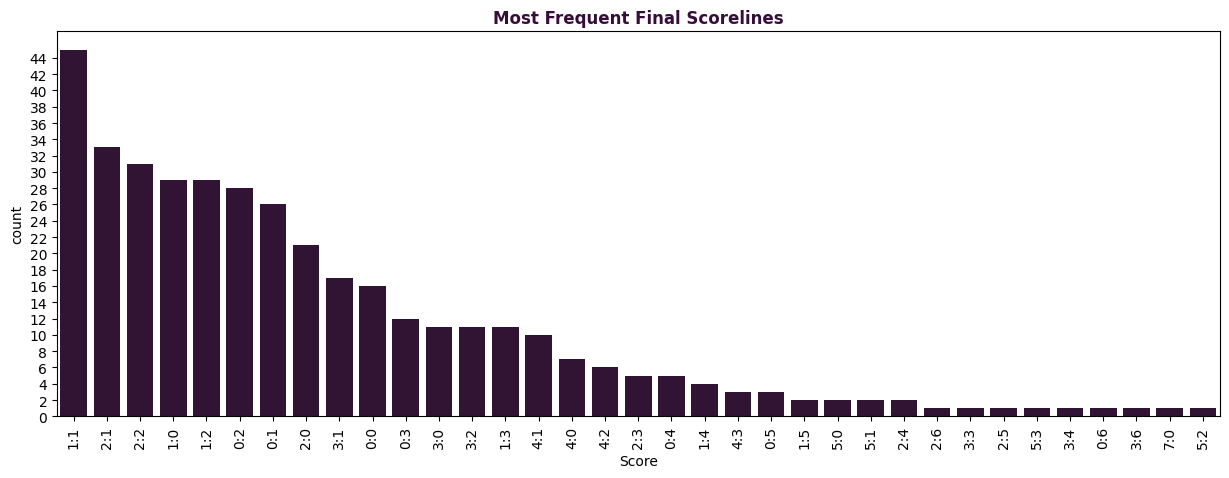

In [23]:
plt.figure(figsize=[15,5])
sns.countplot(x='Score', data=data, order=data['Score'].value_counts().index,color='#360D3A')
plt.title("Most Frequent Final Scorelines", fontweight='bold',color='#360D3A')
plt.yticks(np.arange(0, 45, 2))
plt.xticks(rotation=90)
plt.show()


In [24]:
data

week  Day        Date   Time             Home  HomeScore  \
0     1.0  Fri  2024-08-16  20:00   Manchester Utd          1   
1     1.0  Sat  2024-08-17  12:30     Ipswich Town          0   
2     1.0  Sat  2024-08-17  15:00    Newcastle Utd          1   
3     1.0  Sat  2024-08-17  15:00          Everton          0   
4     1.0  Sat  2024-08-17  15:00  Nott'ham Forest          1   
..    ...  ...         ...    ...              ...        ...   
375  38.0  Sun  2025-05-25  16:00  Nott'ham Forest          0   
376  38.0  Sun  2025-05-25  16:00           Fulham          0   
377  38.0  Sun  2025-05-25  16:00    Newcastle Utd          0   
378  38.0  Sun  2025-05-25  16:00      Bournemouth          2   
379  38.0  Sun  2025-05-25  16:00        Tottenham          1   

                Away  AwayScore  Attendance                      Venue  \
0             Fulham          0     73297.0               Old Trafford   
1          Liverpool          2     30014.0       Portman Road Stadium   
2        Southampton          0     52196.0             St James' Park   
3           Brighton          3     39217.0              Goodison Park   
4        Bournemouth          1     29763.0            The City Ground   
..               ...        ...         ...                        ...   
375          Chelsea          1     30263.0            The City Ground   
376  Manchester City          2     27671.0             Craven Cottage   
377          Everton          1     52221.0             St James' Park   
378   Leicester City          0     11238.0           Vitality Stadium   
379         Brighton          4     61449.0  Tottenham Hotspur Stadium   

             Referee Score  Totale_Goals  
0       Robert Jones   1:0             1  
1       Tim Robinson   0:2             2  
2       Craig Pawson   1:0             1  
3       Simon Hooper   0:3             3  
4     Michael Oliver   1:1             2  
..               ...   ...           ...  
375   Anthony Taylor   0:1             1  
376    Andrew Madley   0:2             2  
377  Tony Harrington   0:1             1  
378      Lewis Smith   2:0             2  
379     Robert Jones   1:4             5  

[380 rows x 13 columns]

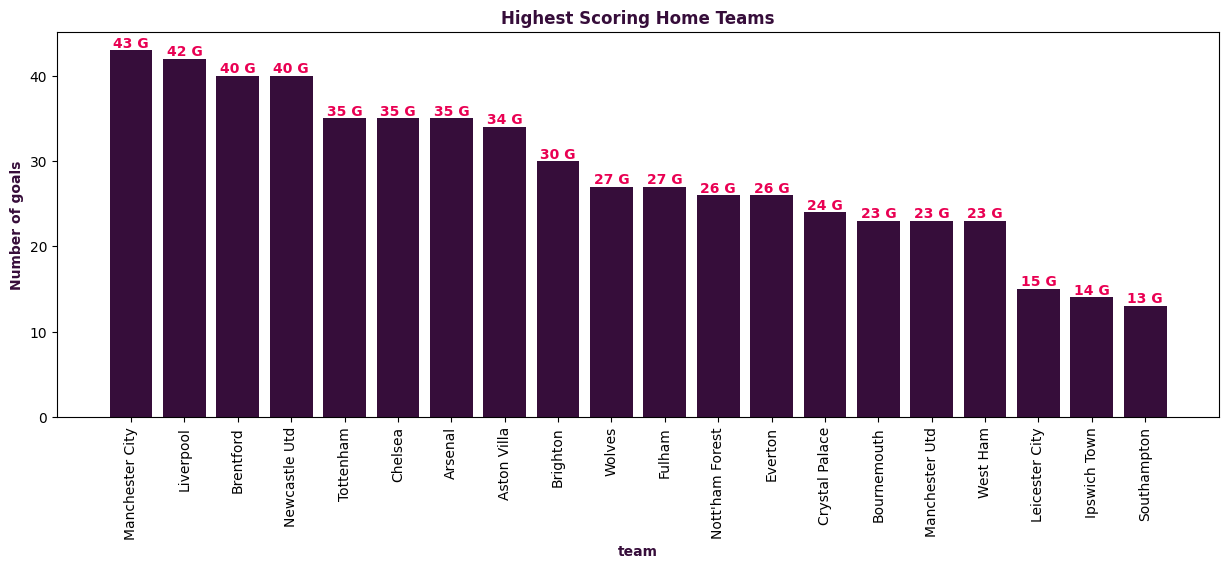

In [25]:
home=data.groupby('Home')['HomeScore'].sum()
home=pd.DataFrame(home)
home.reset_index(inplace=True)
home=home.sort_values('HomeScore',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(home['Home'], home['HomeScore'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G',fontweight='bold',color='#E90052')
plt.title("Highest Scoring Home Teams",fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('Number of goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

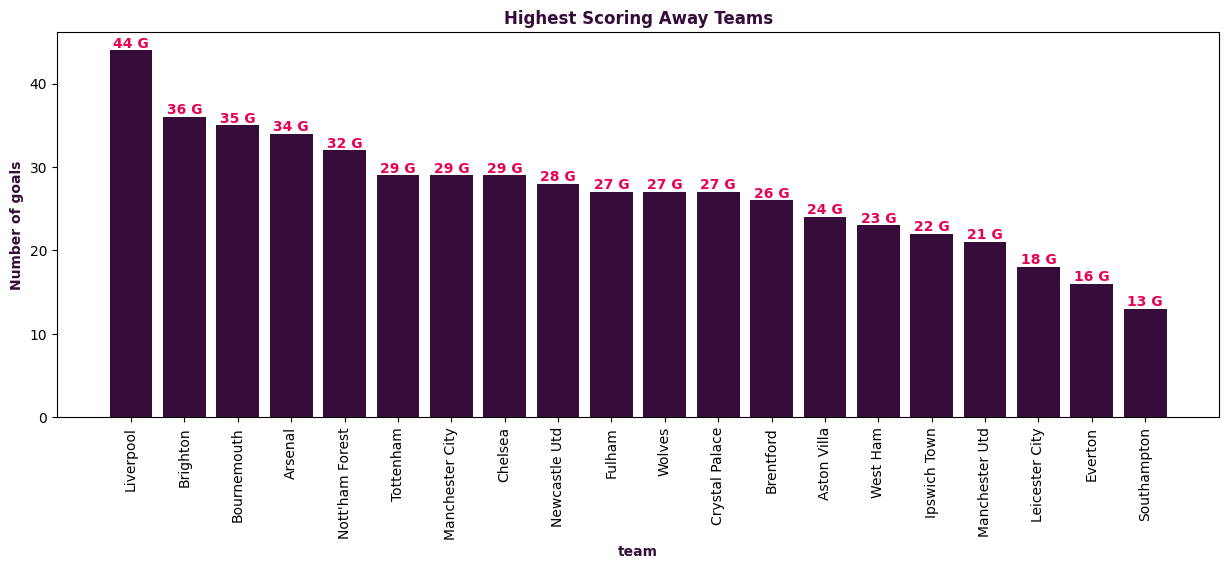

In [26]:
Away=data.groupby('Away')['AwayScore'].sum()
Away=pd.DataFrame(Away)
Away.reset_index(inplace=True)
Away=Away.sort_values('AwayScore',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Away['Away'], Away['AwayScore'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G',fontweight='bold',color='#E90052')
plt.title("Highest Scoring Away Teams",fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('Number of goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

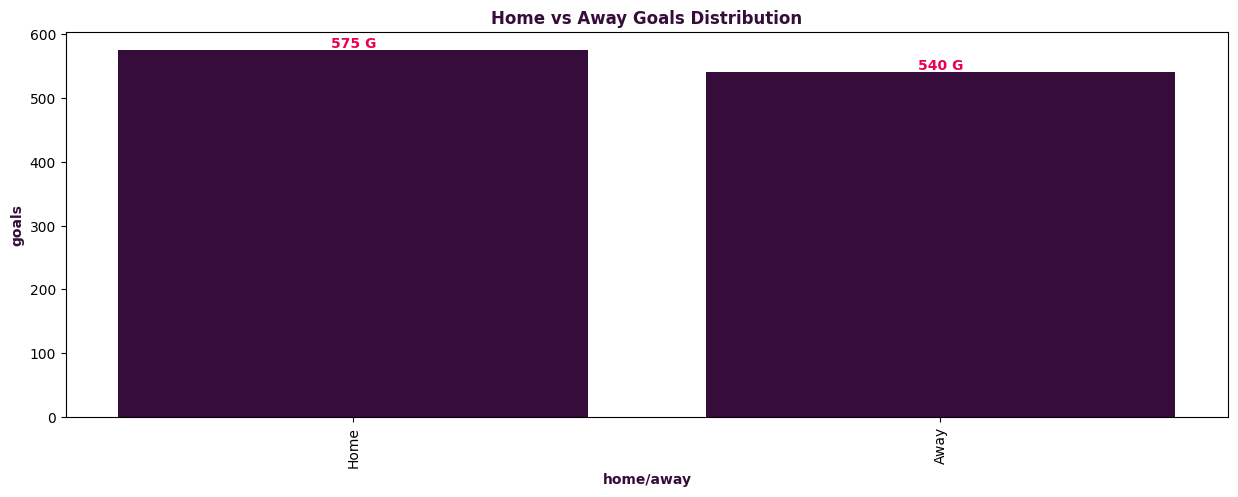

In [27]:
distrubution=pd.DataFrame()
distrubution['home/away']=['Home','Away']
distrubution['Goals']=[home['HomeScore'].sum(),Away['AwayScore'].sum()]
plt.figure(figsize=[15,5])
plt.bar(distrubution['home/away'], distrubution['Goals'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G',fontweight='bold',color='#E90052')
plt.title("Home vs Away Goals Distribution",fontweight='bold',color='#360D3A')
plt.xlabel('home/away',fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

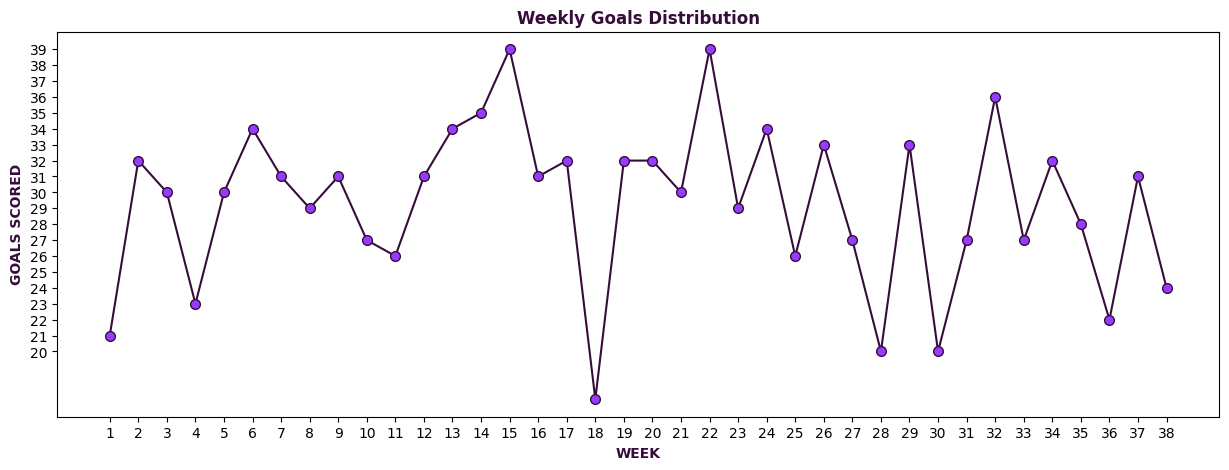

In [28]:
goals_by_week=data.groupby('week')[['HomeScore','AwayScore']].sum()
goals_by_week.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.plot(goals_by_week['week'],(goals_by_week['HomeScore']+goals_by_week['AwayScore']),color='#360D3A',marker='o',markersize=7,markerfacecolor='#963CFF')
plt.xticks(np.arange(1,39,1))
plt.xlabel("WEEK",fontweight='bold',color='#360D3A')
plt.ylabel("GOALS SCORED",fontweight='bold',color='#360D3A')
plt.yticks(np.arange(20, 40, 1))
plt.title("Weekly Goals Distribution",fontweight='bold',color='#360D3A')
plt.show()

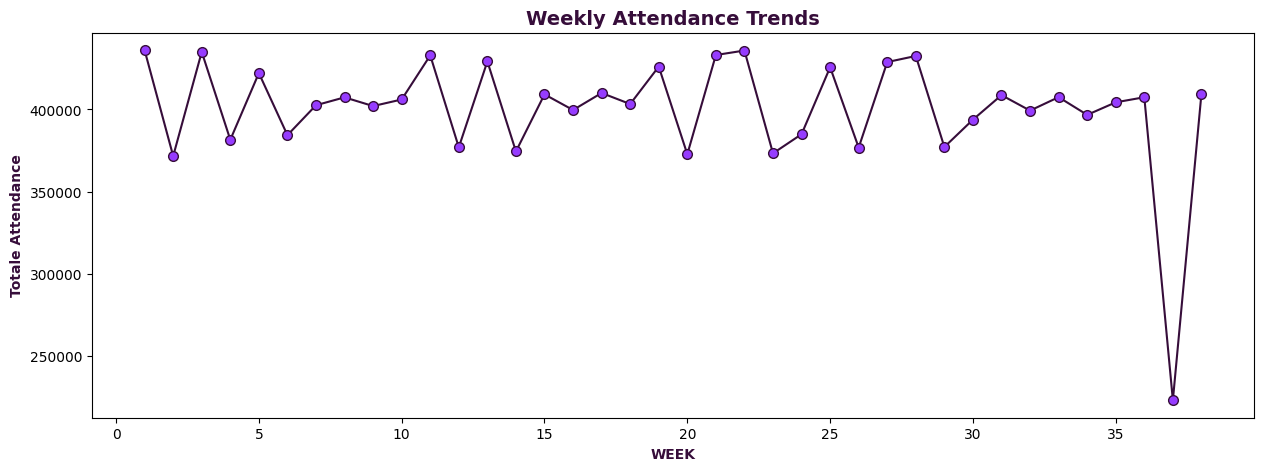

In [29]:
Attendance_by_week=pd.DataFrame(data.groupby('week')['Attendance'].sum())
Attendance_by_week.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.plot(Attendance_by_week['week'],Attendance_by_week['Attendance'],color='#360D3A',marker='o',markersize=7,markerfacecolor='#963CFF')
plt.xlabel("WEEK",fontweight='bold',color='#360D3A')
plt.ylabel("Totale Attendance",fontweight='bold',color='#360D3A')
plt.title("Weekly Attendance Trends",fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

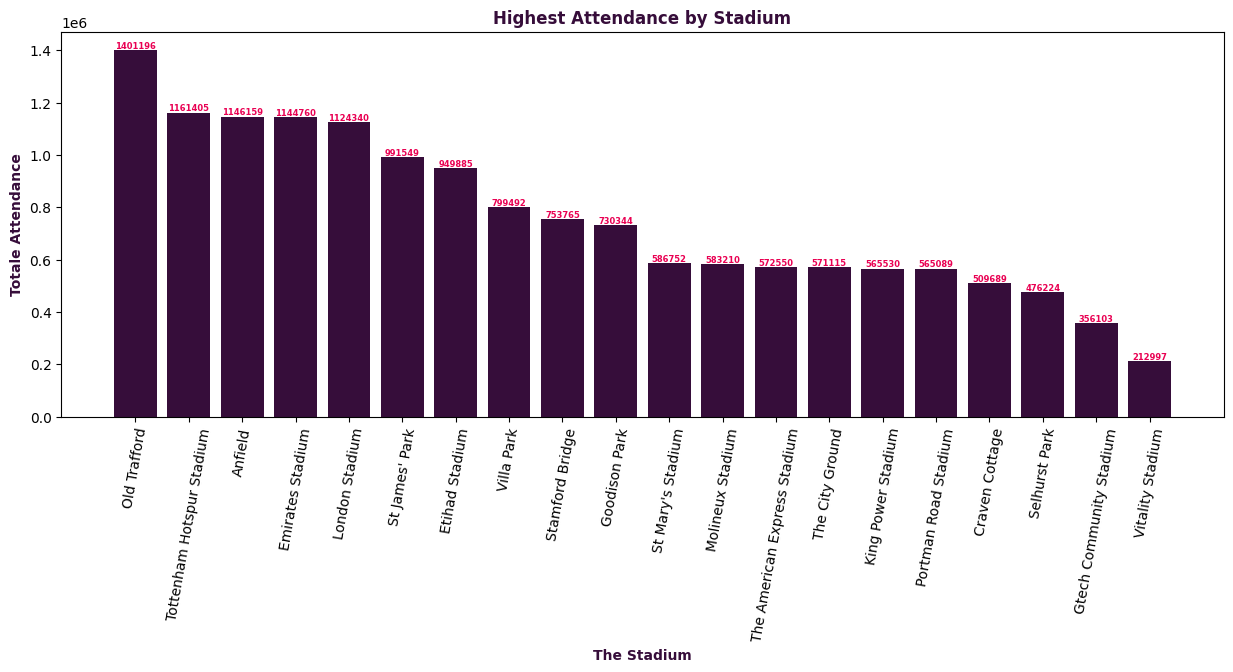

In [30]:
Attendance_by_the_stadium = pd.DataFrame(data.groupby('Venue')['Attendance'].sum())
Attendance_by_the_stadium.reset_index(inplace=True)
Attendance_by_the_stadium=Attendance_by_the_stadium.sort_values('Attendance',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Attendance_by_the_stadium['Venue'],Attendance_by_the_stadium ['Attendance'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f',fontsize=6,fontweight='bold',color='#E90052')
plt.xlabel('The Stadium',fontweight='bold',color='#360D3A')
plt.ylabel('Totale Attendance',fontweight='bold',color='#360D3A')
plt.title("Highest Attendance by Stadium",fontweight='bold',color='#360D3A')
plt.xticks(rotation=80)
plt.show()

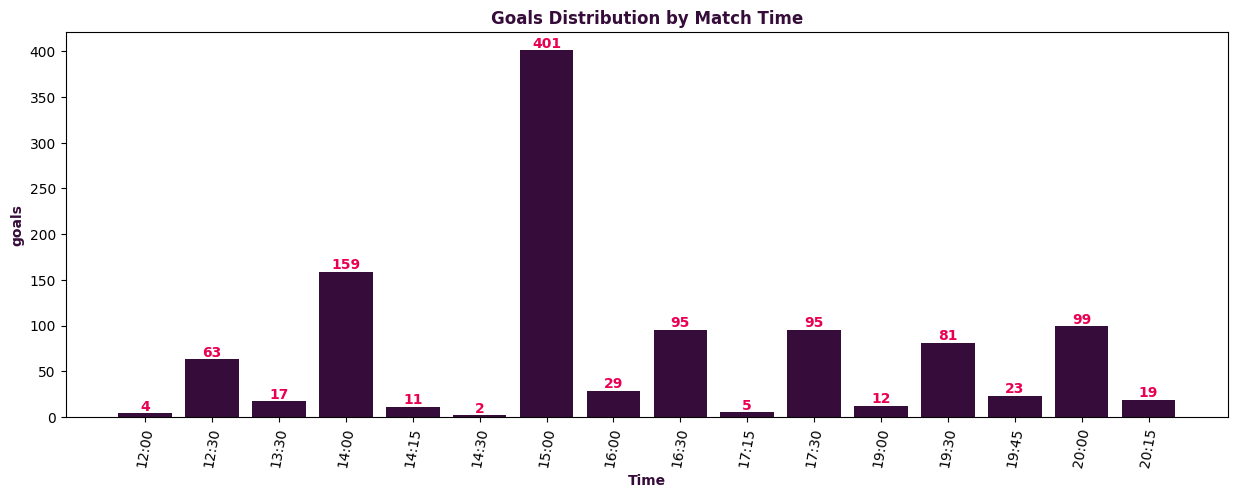

In [31]:
goals_by_time = pd.DataFrame(data.groupby('Time')[['HomeScore','AwayScore']].sum())
goals_by_time.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.bar(goals_by_time['Time'],goals_by_time ['HomeScore']+goals_by_time ['AwayScore'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f',fontweight='bold',color='#E90052')
plt.xlabel('Time',fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontweight='bold',color='#360D3A')
plt.title("Goals Distribution by Match Time",fontweight='bold',color='#360D3A')
plt.xticks(rotation=80)
plt.show()

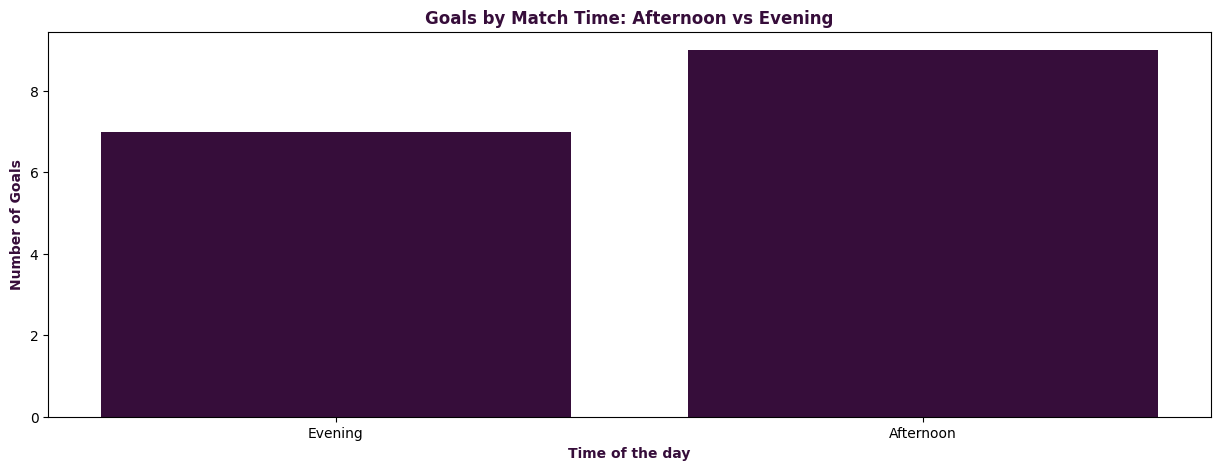

In [32]:

data['Time_of_the_day'] = np.where(
    data['Time'].isin(['12:30','12:00','13:30','14:00','14:15','14:30','15:00','16:00','16:30']),
    'Afternoon',
    'Evening'
)
plt.figure(figsize=[15,5])
plt.bar(data['Time_of_the_day'],data['Totale_Goals'],color='#360D3A')
plt.xlabel('Time of the day',fontweight='bold',color='#360D3A')
plt.ylabel('Number of Goals',fontweight='bold',color='#360D3A')
plt.title("Goals by Match Time: Afternoon vs Evening",fontweight='bold',color='#360D3A')
plt.show()

In [33]:
goals_by_referee=pd.DataFrame(data.groupby('Referee')['Totale_Goals'].sum())
goals_by_referee=goals_by_referee.sort_values('Totale_Goals',ascending=False)
goals_by_referee.reset_index(inplace=True)
goals_by_referee

Referee  Totale_Goals
0      Anthony Taylor           110
1        Peter Bankes            75
2        Simon Hooper            70
3      Samuel Barrott            70
4      Michael Oliver            69
5      Darren England            68
6      Chris Kavanagh            59
7        Robert Jones            58
8         Andy Madley            57
9      Stuart Attwell            57
10       Craig Pawson            56
11    Tony Harrington            51
12     Jarred Gillett            48
13        John Brooks            43
14  Michael Salisbury            43
15        Darren Bond            41
16       Tim Robinson            38
17     Thomas Bramall            33
18        Lewis Smith            24
19        David Coote            15
20       Joshua Smith             9
21         David Webb             8
22     Samuel Allison             7
23     Andrew Kitchen             4
24      Andrew Madley             2

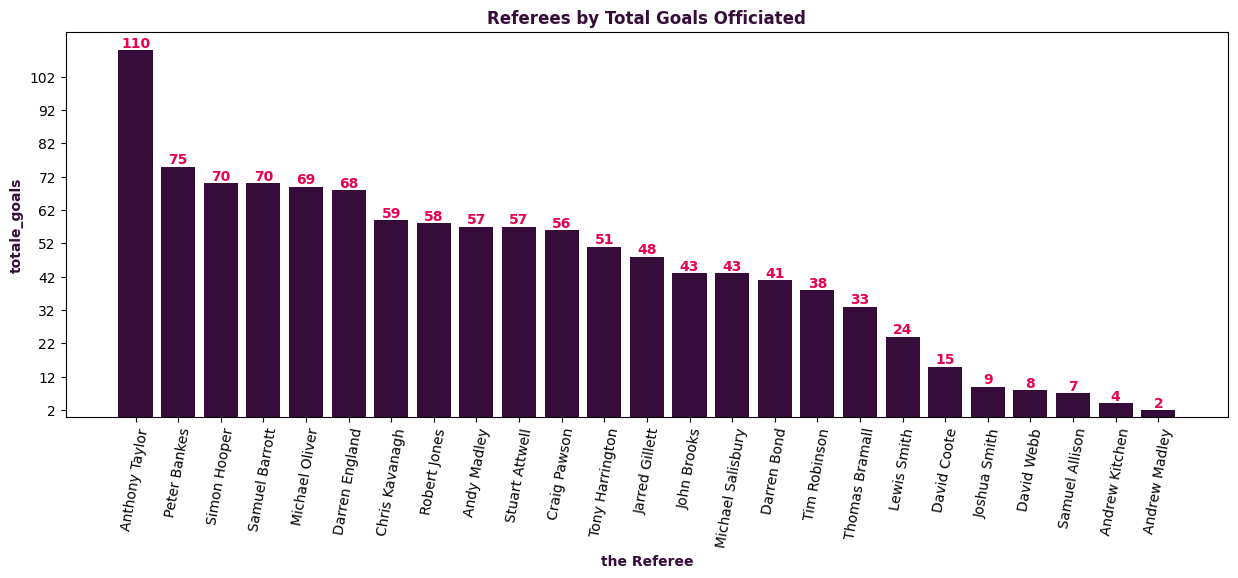

In [34]:
plt.figure(figsize=[15,5])
plt.bar(goals_by_referee['Referee'],goals_by_referee['Totale_Goals'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f',fontweight='bold',color='#E90052')
plt.title("Referees by Total Goals Officiated",fontweight='bold',color='#360D3A')
plt.xlabel('the Referee',fontweight='bold',color='#360D3A')
plt.ylabel('totale_goals',fontweight='bold',color='#360D3A')
plt.yticks(np.arange(2, 110, 10))
plt.xticks(rotation=80)
plt.show()

In [35]:
data.columns

Index(['week', 'Day', 'Date', 'Time', 'Home', 'HomeScore', 'Away', 'AwayScore',
       'Attendance', 'Venue', 'Referee', 'Score', 'Totale_Goals',
       'Time_of_the_day'],
      dtype='object')

# player_possession_stats

In [36]:
data_1 = pd.read_csv('../player_possession_stats.csv')
data_1.head()

player nation position         team   age   90s  touches  \
0         Max Aarons    ENG       DF  Bournemouth  25.0   1.0       73   
1  Joshua Acheampong    ENG       DF      Chelsea  19.0   1.9      137   
2        Tyler Adams    USA       MF  Bournemouth  26.0  20.8     1279   
3   Tosin Adarabioyo    ENG       DF      Chelsea  27.0  14.7     1255   
4      Simon Adingra    CIV    FW,MF     Brighton  23.0  11.7      529   

   deffensive_touches  middle_touches  attacking_touches  attempted_take_ons  \
0                  19              40                 15                   2   
1                  48              81                  8                   2   
2                 338             741                214                  17   
3                 596             633                 27                   5   
4                  66             168                302                  49   

   successful_take_ons  takeons_tackled  carries  total_distance_carried  \
0                    0                1       41                     152   
1                    1                0      106                     709   
2                    3               10      622                    3119   
3                    4                0      733                    2991   
4                   21               27      356                    2460   

   received  
0        40  
1       111  
2       718  
3       948  
4       372

In [37]:
data_1.tail()

player nation position            team   age   90s  touches  \
566         Ashley Young    ENG       DF         Everton  39.0  19.8     1154   
567       Illia Zabarnyi    UKR       DF     Bournemouth  22.0  33.5     1985   
568  Oleksandr Zinchenko    UKR    DF,MF         Arsenal  28.0   5.1      413   
569       Joshua Zirkzee    NED    FW,MF  Manchester Utd  24.0  15.6      587   
570     Martin Ãdegaard    NOR       MF         Arsenal  26.0  25.7     1674   

     deffensive_touches  middle_touches  attacking_touches  \
566                 354             507                300   
567                 908            1026                 73   
568                  77             207                130   
569                  71             303                219   
570                 125             705                859   

     attempted_take_ons  successful_take_ons  takeons_tackled  carries  \
566                  18                    5                9      473   
567                   8                    5                2     1221   
568                   4                    3                0      235   
569                  35                   11               24      327   
570                  58                   24               32     1158   

     total_distance_carried  received  
566                    2375       602  
567                    7951      1246  
568                    1151       287  
569                    1483       418  
570                    7365      1318

In [38]:
data_1.columns

Index(['player', 'nation', 'position', 'team', 'age', '90s', 'touches',
       'deffensive_touches', 'middle_touches', 'attacking_touches',
       'attempted_take_ons', 'successful_take_ons', 'takeons_tackled',
       'carries', 'total_distance_carried', 'received'],
      dtype='object')

In [39]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  571 non-null    object 
 1   nation                  568 non-null    object 
 2   position                571 non-null    object 
 3   team                    571 non-null    object 
 4   age                     568 non-null    float64
 5   90s                     571 non-null    float64
 6   touches                 571 non-null    int64  
 7   deffensive_touches      571 non-null    int64  
 8   middle_touches          571 non-null    int64  
 9   attacking_touches       571 non-null    int64  
 10  attempted_take_ons      571 non-null    int64  
 11  successful_take_ons     571 non-null    int64  
 12  takeons_tackled         571 non-null    int64  
 13  carries                 571 non-null    int64  
 14  total_distance_carried  571 non-null    in

In [40]:
data_1.describe()

age         90s      touches  deffensive_touches  \
count  568.000000  571.000000   571.000000          571.000000   
mean    25.933099   14.228897   776.800350          257.352014   
std      4.447510   11.430861   682.084665          320.350861   
min     16.000000    0.000000     0.000000            0.000000   
25%     23.000000    3.550000   172.000000           38.500000   
50%     26.000000   11.800000   625.000000          128.000000   
75%     29.000000   24.250000  1221.500000          356.000000   
max     40.000000   37.000000  3181.000000         1726.000000   

       middle_touches  attacking_touches  attempted_take_ons  \
count      571.000000         571.000000          571.000000   
mean       330.318739         196.842382           23.567426   
std        335.666642         220.787823           32.076667   
min          0.000000           0.000000            0.000000   
25%         46.500000          24.000000            2.000000   
50%        223.000000         116.000000           12.000000   
75%        506.500000         304.000000           33.000000   
max       1736.000000        1070.000000          206.000000   

       successful_take_ons  takeons_tackled      carries  \
count           571.000000       571.000000   571.000000   
mean             10.162872        10.621716   435.725044   
std              14.264903        14.870452   391.475840   
min               0.000000         0.000000     0.000000   
25%               1.000000         1.000000    92.500000   
50%               4.000000         4.000000   334.000000   
75%              13.000000        14.000000   700.500000   
max             107.000000        97.000000  1966.000000   

       total_distance_carried     received  
count              571.000000   571.000000  
mean              2344.276708   508.516637  
std               2153.581750   458.514498  
min                  0.000000     0.000000  
25%                468.000000   108.000000  
50%               1736.000000   398.000000  
75%               3704.500000   804.500000  
max              10393.000000  2226.000000

* player	:اسم اللاعب
* nation	:الجنسية/الدولة
* position :	المركز (FW, MF, DF, GK)
* team :	اسم الفريق
* age :	العمر (سنوات) 
* 90s :	90 دقيقة كاملة لعبها (دقائق ÷ 90)
* touches : 	إجمالي لمسات الكرة
* defensive_touches :	لمسات في المنطقة الدفاعية
* middle_touches :	لمسات في وسط الملعب
* attacking_touches :	لمسات في المنطقة الهجومية
* attempted_take_ons :	محاولات المراوغة
* successful_take_ons :	مراوغات ناجحة
* takeons_tackled :	مراوغات فاشلة (تم التعامل معها)
* carries :	عدد مرات حمل الكرة
* total_distance_carried :	المسافة الإجمالية المقطوعة بحمل الكرة (أمتار)
* received :	عدد التمريرات المستلمة

In [41]:
data_1['dribble_rate']=(data_1['successful_take_ons']/data_1['attempted_take_ons'])*100
data_1

player nation position            team   age   90s  touches  \
0             Max Aarons    ENG       DF     Bournemouth  25.0   1.0       73   
1      Joshua Acheampong    ENG       DF         Chelsea  19.0   1.9      137   
2            Tyler Adams    USA       MF     Bournemouth  26.0  20.8     1279   
3       Tosin Adarabioyo    ENG       DF         Chelsea  27.0  14.7     1255   
4          Simon Adingra    CIV    FW,MF        Brighton  23.0  11.7      529   
..                   ...    ...      ...             ...   ...   ...      ...   
566         Ashley Young    ENG       DF         Everton  39.0  19.8     1154   
567       Illia Zabarnyi    UKR       DF     Bournemouth  22.0  33.5     1985   
568  Oleksandr Zinchenko    UKR    DF,MF         Arsenal  28.0   5.1      413   
569       Joshua Zirkzee    NED    FW,MF  Manchester Utd  24.0  15.6      587   
570     Martin Ãdegaard    NOR       MF         Arsenal  26.0  25.7     1674   

     deffensive_touches  middle_touches  attacking_touches  \
0                    19              40                 15   
1                    48              81                  8   
2                   338             741                214   
3                   596             633                 27   
4                    66             168                302   
..                  ...             ...                ...   
566                 354             507                300   
567                 908            1026                 73   
568                  77             207                130   
569                  71             303                219   
570                 125             705                859   

     attempted_take_ons  successful_take_ons  takeons_tackled  carries  \
0                     2                    0                1       41   
1                     2                    1                0      106   
2                    17                    3               10      622   
3                     5                    4                0      733   
4                    49                   21               27      356   
..                  ...                  ...              ...      ...   
566                  18                    5                9      473   
567                   8                    5                2     1221   
568                   4                    3                0      235   
569                  35                   11               24      327   
570                  58                   24               32     1158   

     total_distance_carried  received  dribble_rate  
0                       152        40      0.000000  
1                       709       111     50.000000  
2                      3119       718     17.647059  
3                      2991       948     80.000000  
4                      2460       372     42.857143  
..                      ...       ...           ...  
566                    2375       602     27.777778  
567                    7951      1246     62.500000  
568                    1151       287     75.000000  
569                    1483       418     31.428571  
570                    7365      1318     41.379310  

[571 rows x 17 columns]

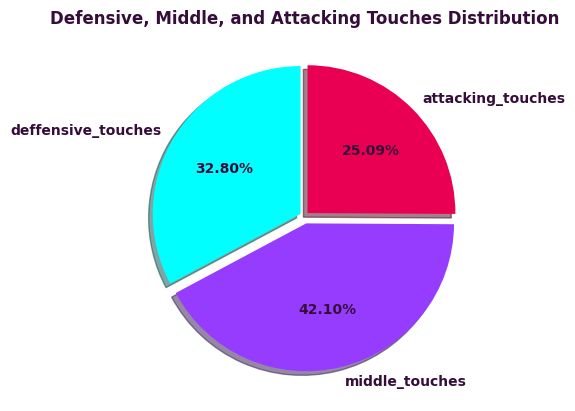

In [42]:
custom_colors = ['Cyan', '#963CFF', '#E90052']
plt.pie([data_1['deffensive_touches'].sum(),data_1['middle_touches'].sum(),data_1['attacking_touches'].sum()],labels=['deffensive_touches','middle_touches','attacking_touches'],colors=custom_colors,textprops={'color': '#360D3A', 'fontweight':'bold'},autopct='%1.2f%%',explode=[0.03, 0.05, 0.03],shadow=True,startangle=90)
plt.title("Defensive, Middle, and Attacking Touches Distribution",fontweight='bold',color='#360D3A')
plt.show()

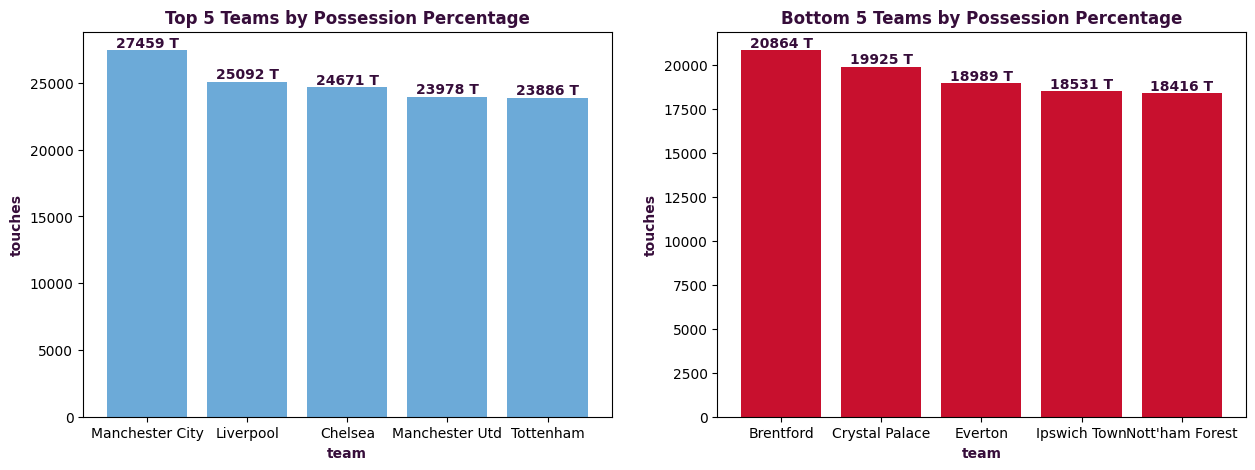

In [43]:
teams_touches=pd.DataFrame(data_1.groupby('team')['touches'].sum())
teams_touches=teams_touches.sort_values('touches',ascending=False)
teams_touches.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.bar(teams_touches['team'].head(),teams_touches['touches'].head(),color='#6CAAD8')
plt.bar_label(plt.gca().containers[0],fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title("Top 5 Teams by Possession Percentage",fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.subplot(1,2,2)
plt.bar(teams_touches['team'].tail(),teams_touches['touches'].tail(),color='#C8102E')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title("Bottom 5 Teams by Possession Percentage",fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.show()

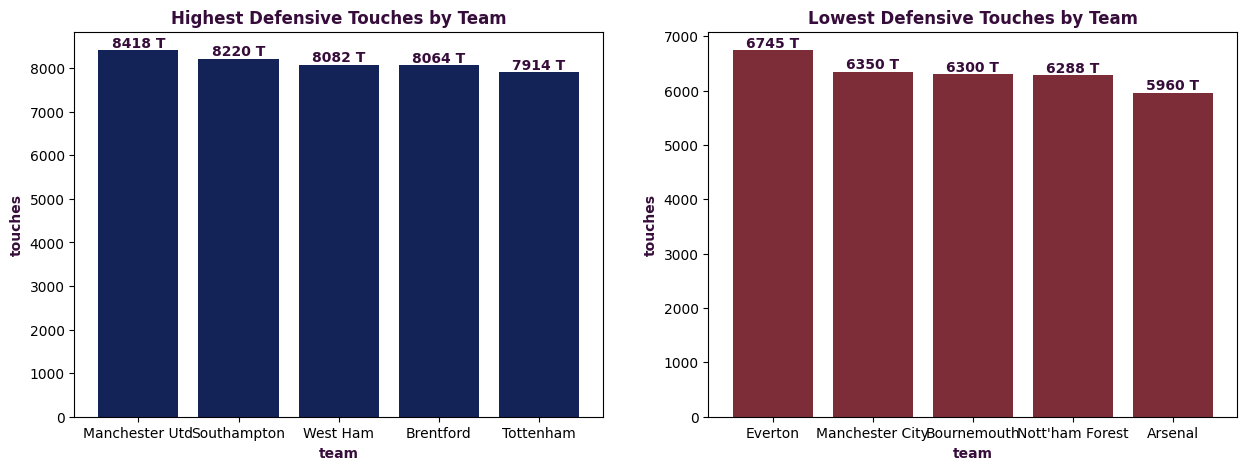

In [44]:
teams_deffensive_touches=pd.DataFrame(data_1.groupby('team')['deffensive_touches'].sum())
teams_deffensive_touches=teams_deffensive_touches.sort_values('deffensive_touches',ascending=False)
teams_deffensive_touches.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.bar(teams_deffensive_touches['team'].head(),teams_deffensive_touches['deffensive_touches'].head(),color='#132257')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title("Highest Defensive Touches by Team",fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.subplot(1,2,2)
plt.bar(teams_deffensive_touches['team'].tail(),teams_deffensive_touches['deffensive_touches'].tail(),color='#7C2D38')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title("Lowest Defensive Touches by Team",fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.show()

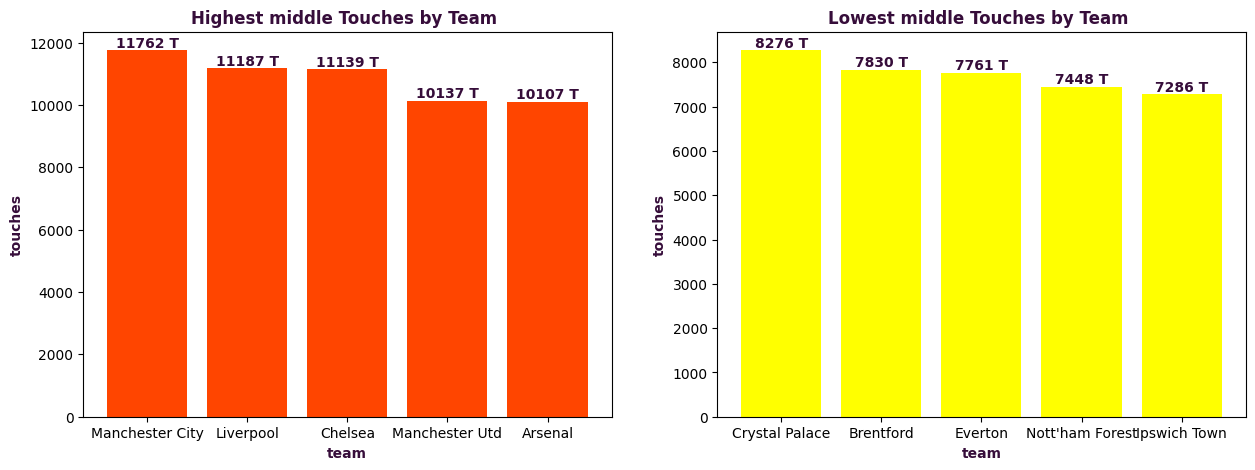

In [45]:
teams_middle_touches=pd.DataFrame(data_1.groupby('team')['middle_touches'].sum())
teams_middle_touches=teams_middle_touches.sort_values('middle_touches',ascending=False)
teams_middle_touches.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.bar(teams_middle_touches['team'].head(),teams_middle_touches['middle_touches'].head(),color='#FF4500')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title('Highest middle Touches by Team ',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.subplot(1,2,2)
colors = ['#6CAAD8', '#C8102E', '#034694', '#FF4500', '#EF0107']
plt.bar(teams_middle_touches['team'].tail(),teams_middle_touches['middle_touches'].tail(),color='yellow')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title('Lowest middle Touches by Team ',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.show()

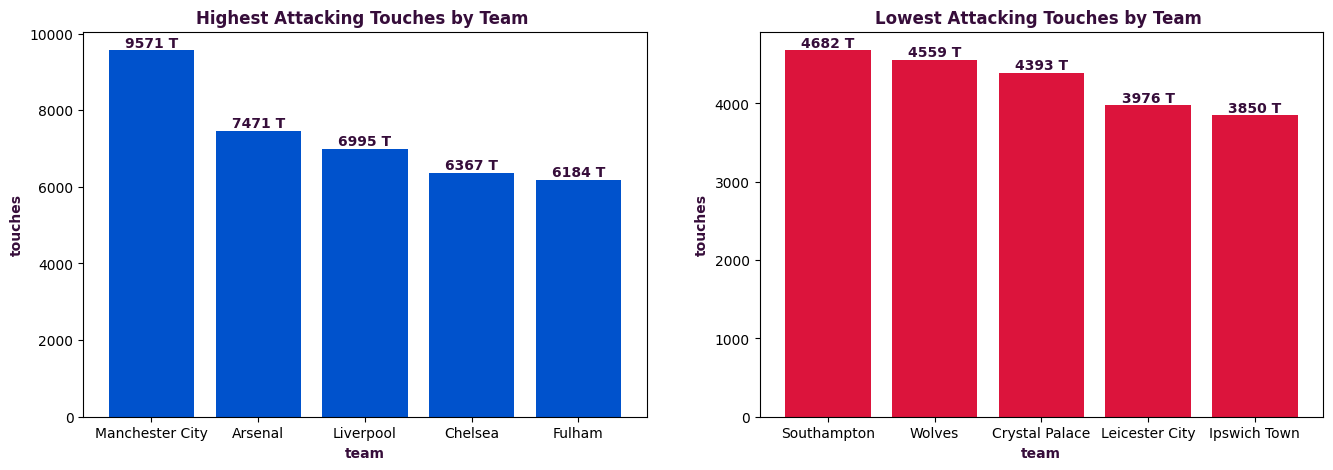

In [46]:
teams_attacking_touches=pd.DataFrame(data_1.groupby('team')['attacking_touches'].sum())
teams_attacking_touches=teams_attacking_touches.sort_values('attacking_touches',ascending=False)
teams_attacking_touches.reset_index(inplace=True)
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.bar(teams_attacking_touches['team'].head(),teams_attacking_touches['attacking_touches'].head(),color='#0052CC')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title('Highest Attacking Touches by Team ',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.subplot(1,2,2)
plt.bar(teams_attacking_touches['team'].tail(),teams_attacking_touches['attacking_touches'].tail(),color='#DC143C')
plt.bar_label(plt.gca().containers[0], fmt='%.0f T' ,fontweight='bold',color='#360D3A')
plt.title('Lowest Attacking Touches by Team ',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.show()

In [47]:
avg_age=pd.DataFrame(data_1.groupby('team')['age'].mean())
avg_age=avg_age.sort_values('age',ascending=False)
avg_age.reset_index(inplace=True)
avg_age

team        age
0     Newcastle Utd  27.625000
1            Fulham  27.615385
2          West Ham  27.592593
3       Aston Villa  26.714286
4           Everton  26.653846
5      Ipswich Town  26.593750
6            Wolves  26.500000
7   Nott'ham Forest  26.434783
8         Liverpool  26.375000
9    Leicester City  26.275862
10   Crystal Palace  26.034483
11  Manchester City  25.862069
12          Arsenal  25.800000
13      Southampton  25.527778
14   Manchester Utd  25.193548
15         Brighton  25.093750
16      Bournemouth  24.965517
17        Tottenham  24.838710
18        Brentford  24.714286
19          Chelsea  23.275862

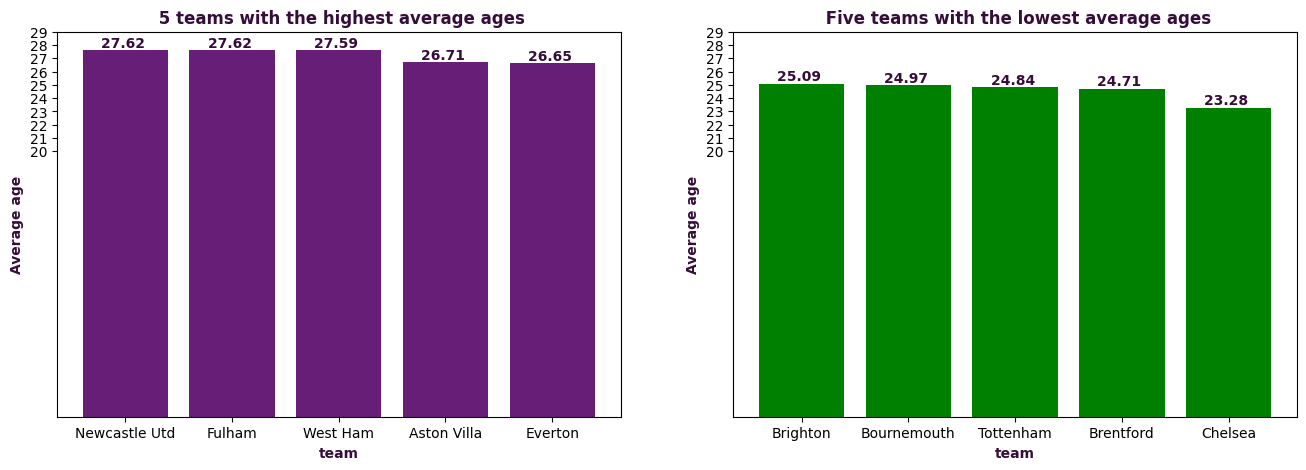

In [48]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.bar(avg_age['team'].head(),avg_age['age'].head(),color='#671E76')
plt.bar_label(plt.gca().containers[0], fmt='%.2f ' ,fontweight='bold',color='#360D3A')
plt.title(' 5 teams with the highest average ages',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('Average age',fontweight='bold',color='#360D3A')
plt.yticks(np.arange(20, 30, 1))
plt.subplot(1,2,2)
plt.bar(avg_age['team'].tail(),avg_age['age'].tail(),color='green')
plt.bar_label(plt.gca().containers[0], fmt='%.2f ' ,fontweight='bold',color='#360D3A')
plt.title(' Five teams with the lowest average ages',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('Average age',fontweight='bold',color='#360D3A')
plt.yticks(np.arange(20, 30, 1))
plt.show()

In [49]:
dribble=pd.DataFrame(data_1[['player','position', 'attempted_take_ons','successful_take_ons','takeons_tackled', 'dribble_rate']])
dribble=dribble.sort_values('attempted_take_ons',ascending=False)
dribble

player position  attempted_take_ons  successful_take_ons  \
292     Mohammed Kudus    FW,MF                 206                   91   
141        Jeremy Doku    FW,MF                 194                  107   
441      Morgan Rogers    FW,MF                 156                   65   
372      Iliman Ndiaye       FW                 139                   64   
8     Rayan AÃ¯t-Nouri       DF                 137                   63   
..                 ...      ...                 ...                  ...   
517       Mark Travers       GK                   0                    0   
300         Bernd Leno       GK                   0                    0   
297     Will Lankshear    FW,MF                   0                    0   
538   Christian Walton       GK                   0                    0   
543  James Ward-Prowse       MF                   0                    0   

     takeons_tackled  dribble_rate  
292               97     44.174757  
141               56     55.154639  
441               71     41.666667  
372               64     46.043165  
8                 56     45.985401  
..               ...           ...  
517                0           NaN  
300                0           NaN  
297                0           NaN  
538                0           NaN  
543                0           NaN  

[571 rows x 6 columns]

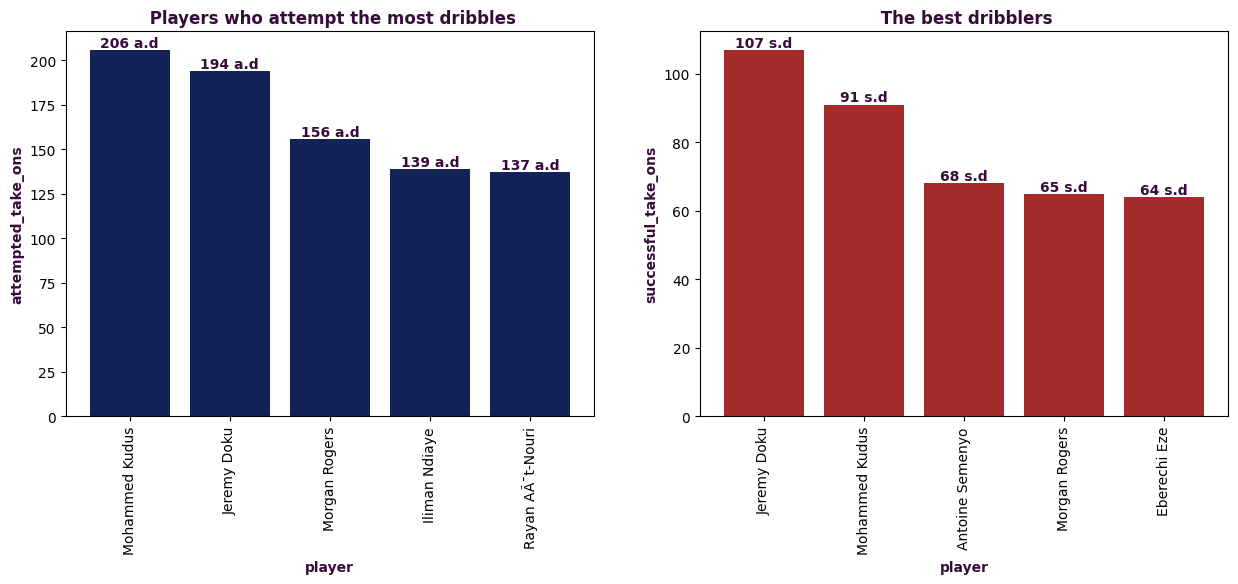

In [50]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.bar(dribble['player'].head(),dribble['attempted_take_ons'].head(),color='#132257')
plt.bar_label(plt.gca().containers[0], fmt='%.0f a.d' ,fontweight='bold',color='#360D3A')
plt.title(' Players who attempt the most dribbles',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('attempted_take_ons',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
best_dribblers=pd.DataFrame(dribble.sort_values('successful_take_ons',ascending=False))
plt.bar(best_dribblers['player'].head(),best_dribblers['successful_take_ons'].head(),color='brown')
plt.bar_label(plt.gca().containers[0], fmt='%.0f s.d' ,fontweight='bold',color='#360D3A')
plt.title(' The best dribblers',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('successful_take_ons',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

In [51]:
worst_dribblers=pd.DataFrame(dribble.sort_values('takeons_tackled',ascending=False))
worst_dribblers

player position  attempted_take_ons  successful_take_ons  \
292    Mohammed Kudus    FW,MF                 206                   91   
63       Jarrod Bowen    FW,MF                 127                   42   
354      Kaoru Mitoma    FW,MF                 128                   50   
293  Dejan Kulusevski    MF,FW                 117                   38   
441     Morgan Rogers    FW,MF                 156                   65   
..                ...      ...                 ...                  ...   
514    Conor Townsend       DF                   0                    0   
510     Harry Toffolo       DF                   0                    0   
30    Alphonse Areola       GK                   0                    0   
284  AntonÃ­n KinskÃ½       GK                   0                    0   
290      Caleb Kporha       DF                   0                    0   

     takeons_tackled  dribble_rate  
292               97     44.174757  
63                75     33.070866  
354               73     39.062500  
293               71     32.478632  
441               71     41.666667  
..               ...           ...  
514                0           NaN  
510                0           NaN  
30                 0           NaN  
284                0           NaN  
290                0           NaN  

[571 rows x 6 columns]

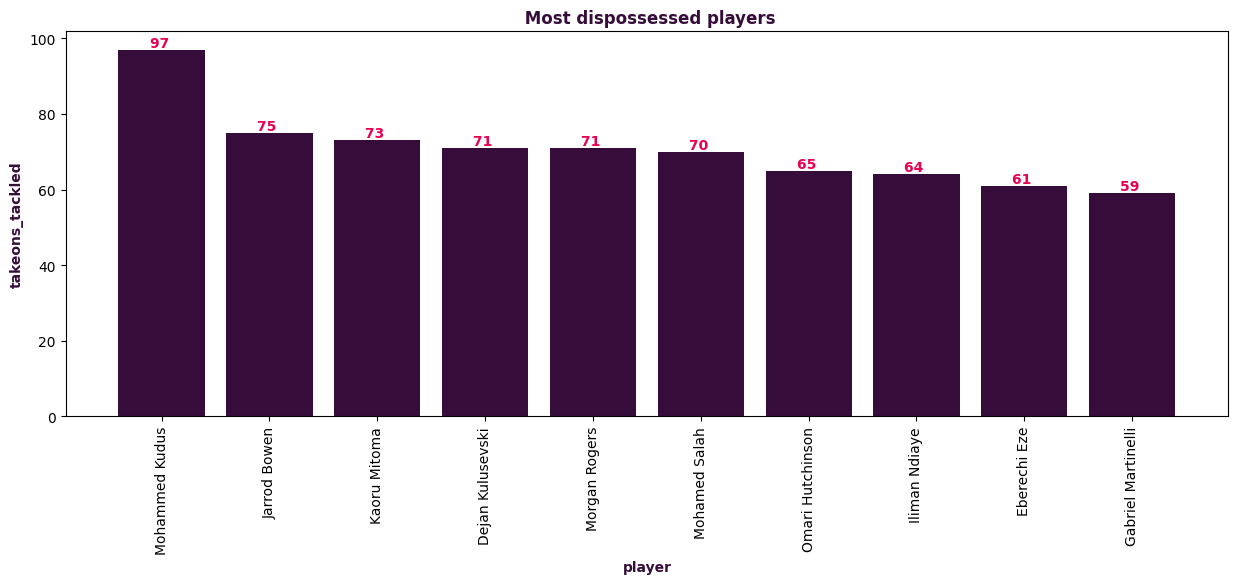

In [52]:
plt.figure(figsize=[15,5])
plt.bar(worst_dribblers['player'].head(10),worst_dribblers['takeons_tackled'].head(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.0f ' ,fontweight='bold',color='#E90052')
plt.title(' Most dispossessed players',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('takeons_tackled',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

In [53]:
most_carried=pd.DataFrame(data_1[['player','carries','total_distance_carried','position','team']])
most_carried=most_carried.sort_values('total_distance_carried',ascending=False)
most_carried['total_distance_carried_km']=most_carried['total_distance_carried']/1000

In [54]:
most_carried

player  carries  total_distance_carried position  \
221     JoÅ¡ko Gvardiol     1966                   10393       DF   
230  Jan Paul van Hecke     1660                   10301       DF   
131         RÃºben Dias     1724                    9771       DF   
527     Virgil van Dijk     1779                    8423       DF   
289     Mateo KovaÄiÄ     1445                    8397       MF   
..                  ...      ...                     ...      ...   
86         Kaelan Casey        0                       0       DF   
239       Mason Holgate        1                       0    FW,DF   
200     Michael Golding        0                       0       MF   
484      Jay Stansfield        0                       0       MF   
516    Boubacar TraorÃ©        0                       0       MF   

                team  total_distance_carried_km  
221  Manchester City                     10.393  
230         Brighton                     10.301  
131  Manchester City                      9.771  
527        Liverpool                      8.423  
289  Manchester City                      8.397  
..               ...                        ...  
86          West Ham                      0.000  
239          Everton                      0.000  
200   Leicester City                      0.000  
484           Fulham                      0.000  
516           Wolves                      0.000  

[571 rows x 6 columns]

C:\Users\eloma\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eloma\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


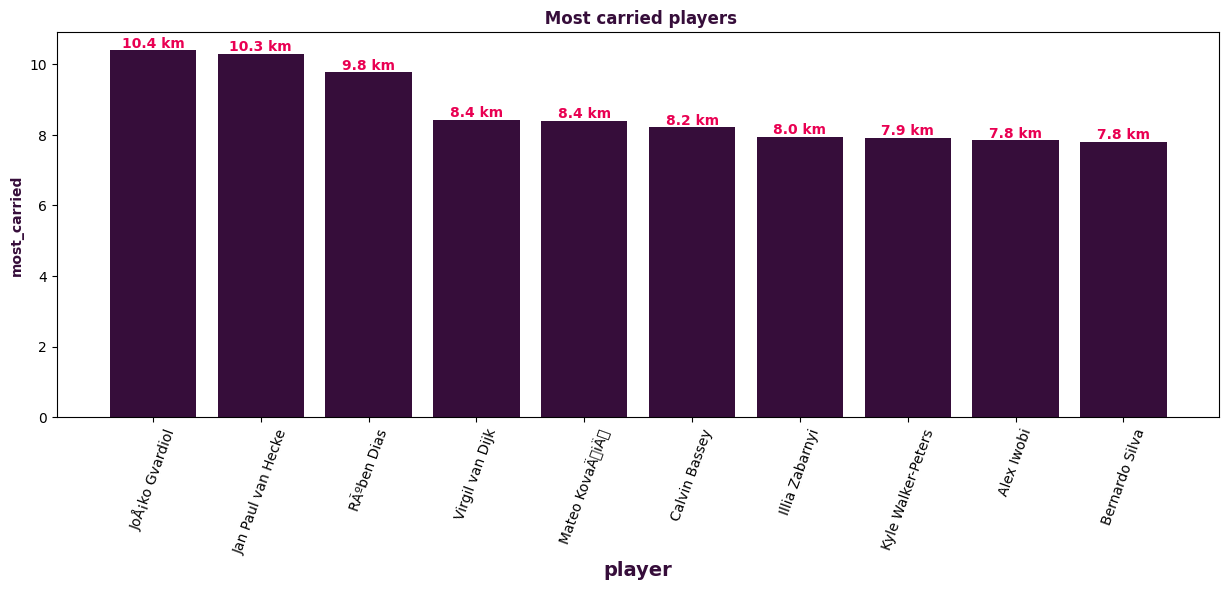

In [55]:
plt.figure(figsize=[15,5])
plt.bar(most_carried['player'].head(10),most_carried['total_distance_carried_km'].head(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.1f km' ,fontweight='bold',color='#E90052')
plt.title(' Most carried players',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontsize=14,fontweight='bold',color='#360D3A')
plt.ylabel('most_carried',fontweight='bold',color='#360D3A')
plt.xticks(rotation=70)
plt.show()

C:\Users\eloma\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


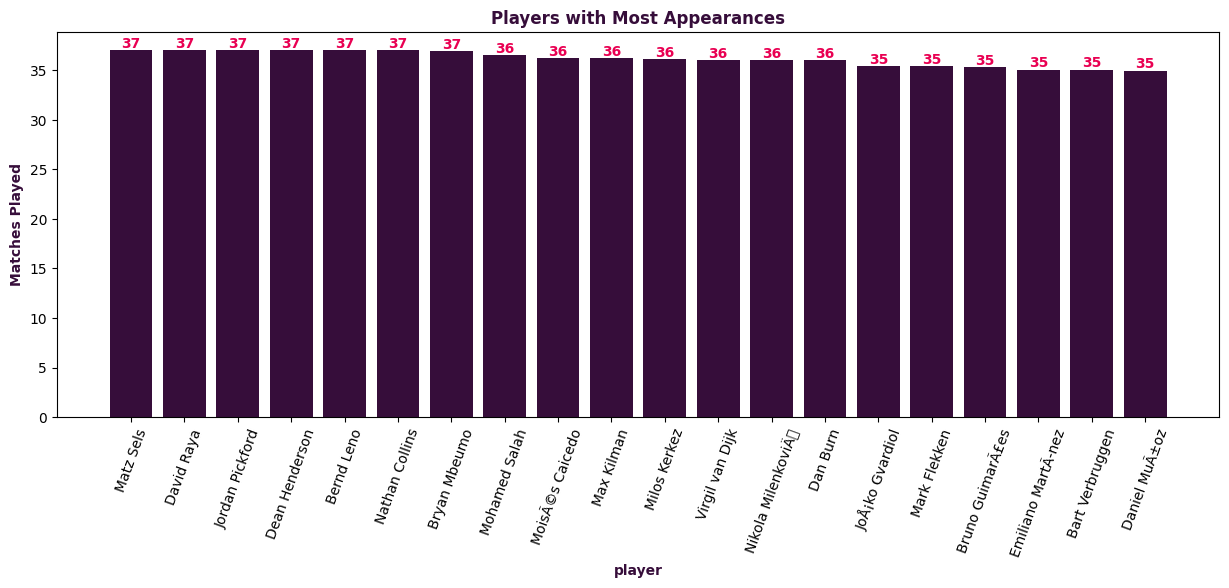

In [56]:
most_matches_played=data_1[['player','90s','position']]
most_matches_played=most_matches_played.sort_values('90s',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(most_matches_played['player'].head(20),most_matches_played['90s'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.0f' ,fontweight='bold',color='#E90052')
plt.title('Players with Most Appearances',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('Matches Played',fontweight='bold',color='#360D3A')
plt.xticks(rotation=70)
plt.show()

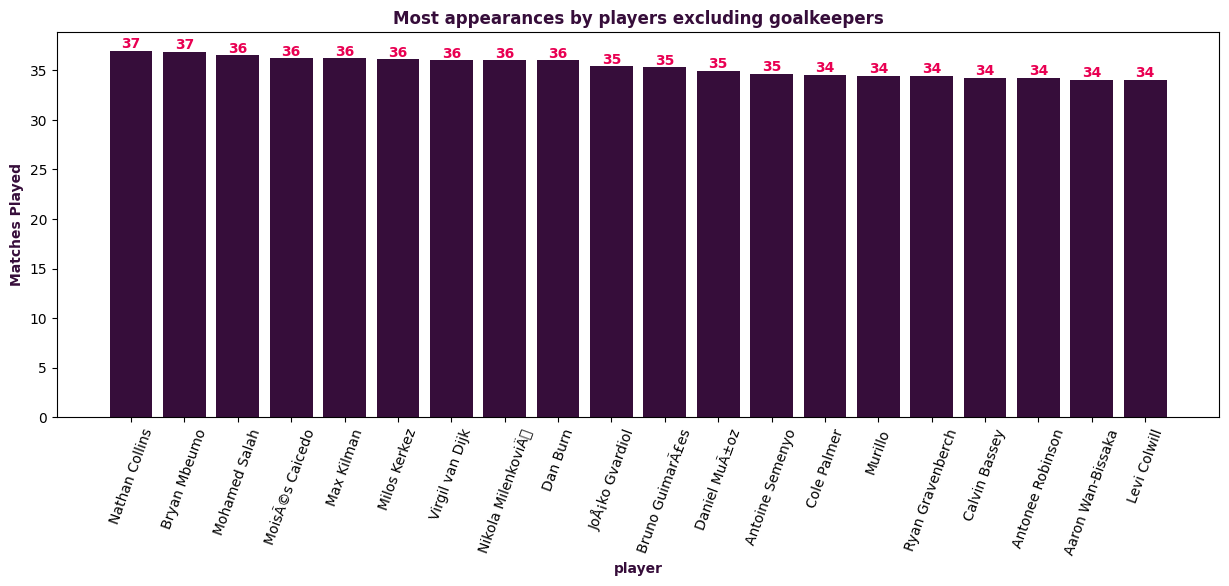

In [57]:
most_matches_played_not_GK = most_matches_played[most_matches_played['position'] != 'GK']
most_matches_played_not_GK=most_matches_played_not_GK.sort_values('90s',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(most_matches_played_not_GK['player'].head(20),most_matches_played_not_GK['90s'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.0f' ,fontweight='bold',color='#E90052')
plt.title("Most appearances by players excluding goalkeepers",fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('Matches Played',fontweight='bold',color='#360D3A')
plt.xticks(rotation=70)
plt.show()

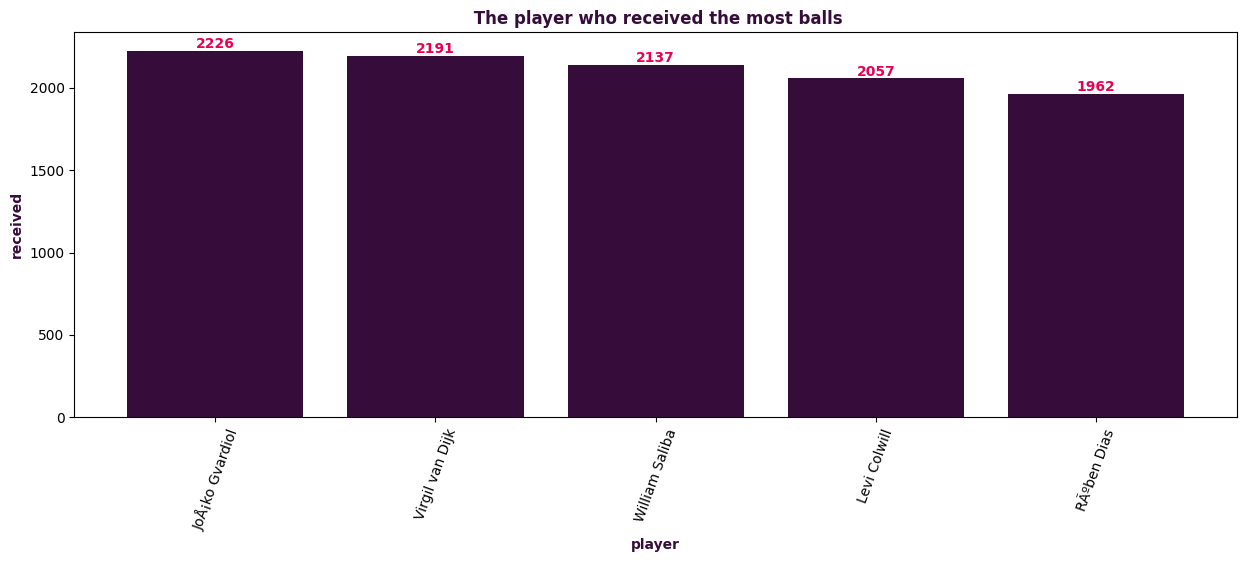

In [58]:
most_received=pd.DataFrame(data_1[['player','received']])
most_received=most_received.sort_values('received',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(most_received['player'].head(),most_received['received'].head(),color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.0f' ,fontweight='bold',color='#E90052')
plt.title(' The player who received the most balls',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('received',fontweight='bold',color='#360D3A')
plt.xticks(rotation=70)
plt.show()

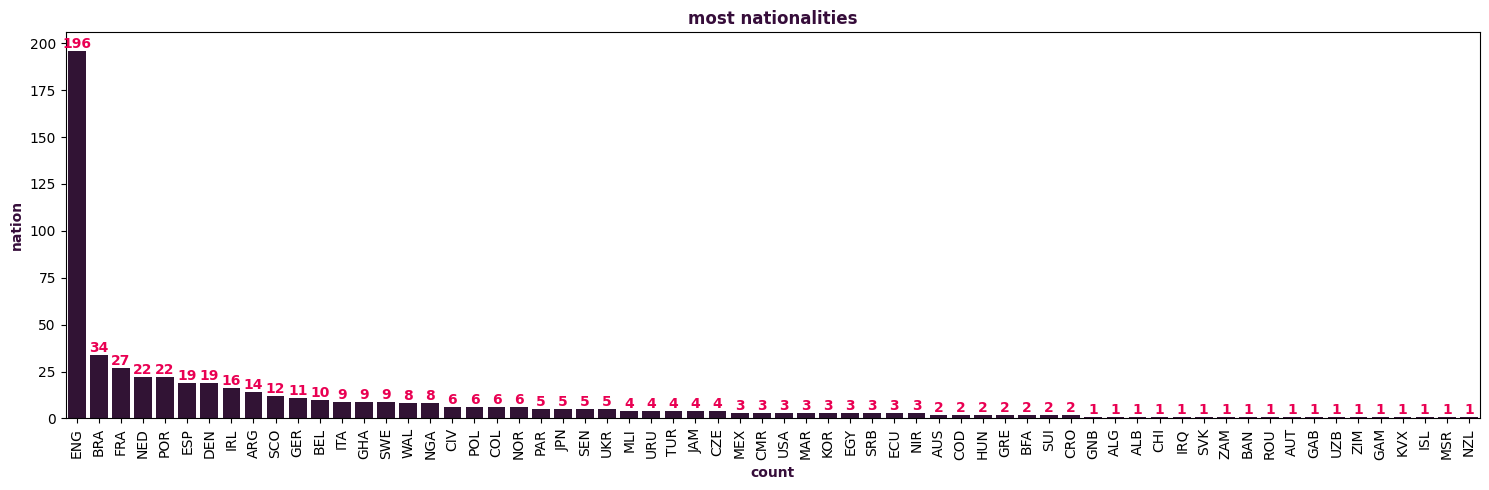

In [59]:
nations=pd.DataFrame(data_1['nation'].value_counts())
nations.reset_index(inplace=True)
plt.figure(figsize=[15,5])
sns.countplot(x='nation', data=data_1, order=data_1['nation'].value_counts().index,color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.0f' ,fontweight='bold',color='#E90052')
plt.title('most nationalities',fontweight='bold',color='#360D3A')
plt.xlabel('count',fontweight='bold',color='#360D3A')
plt.ylabel('nation',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

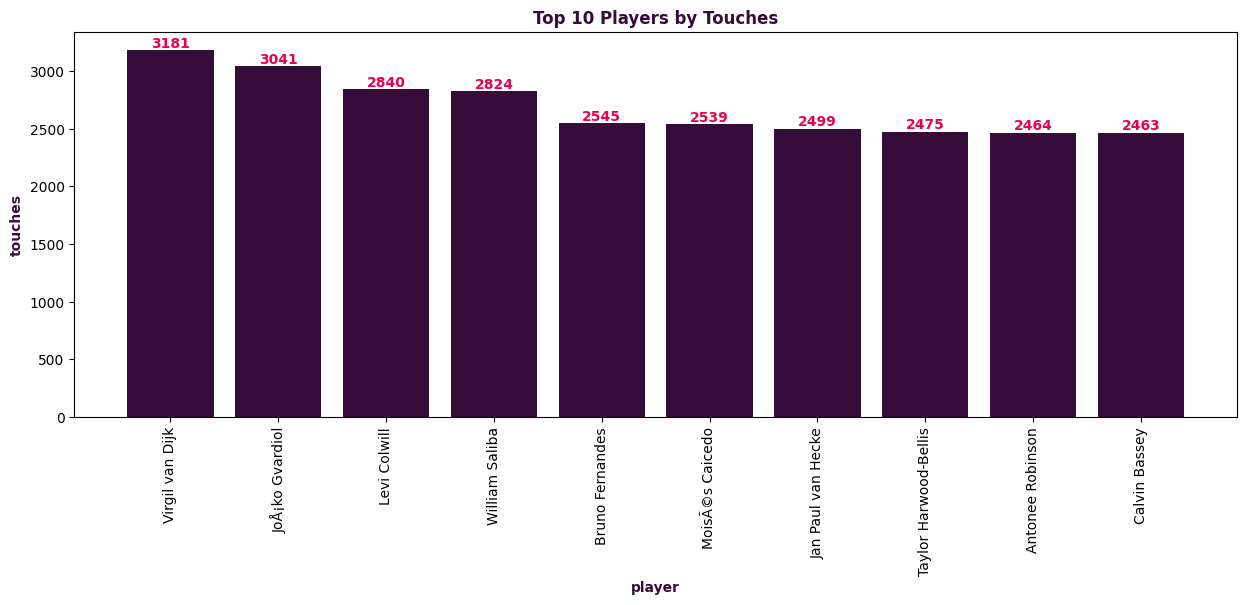

In [60]:
players_touches=pd.DataFrame(data_1.groupby('player')['touches'].sum())
players_touches=players_touches.sort_values('touches',ascending=False)
players_touches.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.bar(players_touches['player'].head(10),players_touches['touches'].head(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0], fmt='%.0f' ,fontweight='bold',color='#E90052')
plt.title('Top 10 Players by Touches',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('touches',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

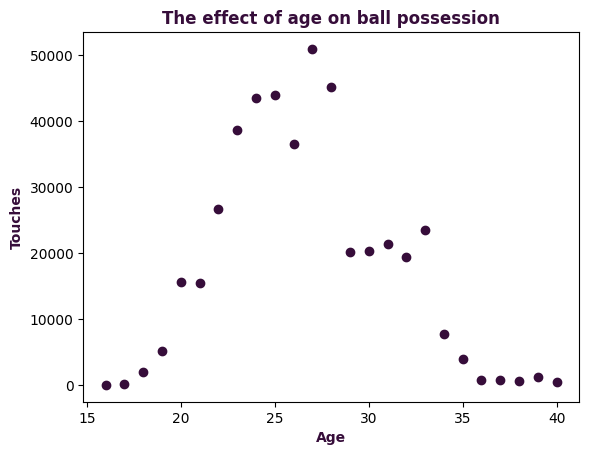

In [61]:
touches_by_age=pd.DataFrame(data_1.groupby('age')['touches'].sum())
touches_by_age=touches_by_age.sort_values('touches',ascending=False)
touches_by_age.reset_index(inplace=True)
touches_by_age
plt.scatter(touches_by_age['age'],touches_by_age['touches'],c='#360D3A')
plt.title('The effect of age on ball possession',fontweight='bold',color='#360D3A')
plt.xlabel('Age',fontweight='bold',color='#360D3A')
plt.ylabel('Touches',fontweight='bold',color='#360D3A')
plt.show()

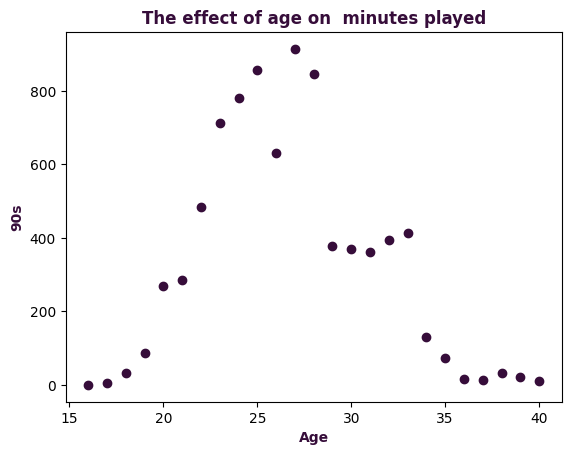

In [62]:
games_by_age=pd.DataFrame(data_1.groupby('age')['90s'].sum())
games_by_age=games_by_age.sort_values('90s',ascending=False)
games_by_age.reset_index(inplace=True)
games_by_age
plt.scatter(games_by_age['age'],games_by_age['90s'],c='#360D3A')
plt.title('The effect of age on  minutes played',fontweight='bold',color='#360D3A')
plt.xlabel('Age',fontweight='bold',color='#360D3A')
plt.ylabel('90s',fontweight='bold',color='#360D3A')
plt.show()

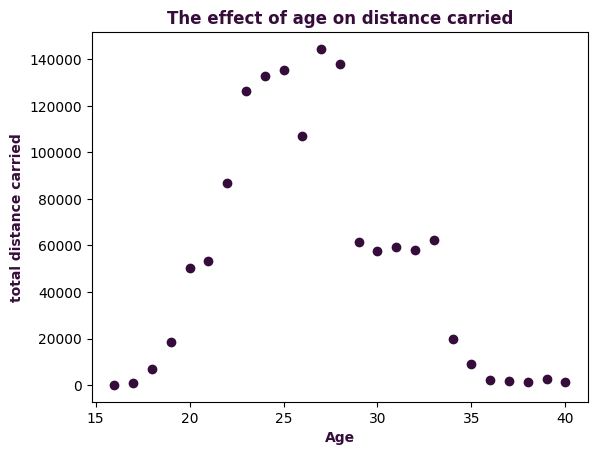

In [63]:
distance_by_age=pd.DataFrame(data_1.groupby('age')['total_distance_carried'].sum())
distance_by_age=distance_by_age.sort_values('total_distance_carried',ascending=False)
distance_by_age.reset_index(inplace=True)
plt.scatter( distance_by_age['age'],distance_by_age['total_distance_carried'],c='#360D3A')
plt.title('The effect of age on distance carried',fontweight='bold',color='#360D3A')
plt.xlabel('Age',fontweight='bold',color='#360D3A')
plt.ylabel('total distance carried',fontweight='bold',color='#360D3A')
plt.show()

In [64]:
data_1.columns

Index(['player', 'nation', 'position', 'team', 'age', '90s', 'touches',
       'deffensive_touches', 'middle_touches', 'attacking_touches',
       'attempted_take_ons', 'successful_take_ons', 'takeons_tackled',
       'carries', 'total_distance_carried', 'received', 'dribble_rate'],
      dtype='object')

* player	:اسم اللاعب
* nation	:الجنسية/الدولة
* position :	المركز (FW, MF, DF, GK)
* team :	اسم الفريق
* age :	العمر (سنوات) 
* 90s :	90 دقيقة كاملة لعبها (دقائق ÷ 90)
* touches : 	إجمالي لمسات الكرة
* defensive_touches :	لمسات في المنطقة الدفاعية
* middle_touches :	لمسات في وسط الملعب
* attacking_touches :	لمسات في المنطقة الهجومية
* attempted_take_ons :	محاولات المراوغة
* successful_take_ons :	مراوغات ناجحة
* takeons_tackled :	مراوغات فاشلة (تم التعامل معها)
* carries :	عدد مرات حمل الكرة
* total_distance_carried :	المسافة الإجمالية المقطوعة بحمل الكرة (أمتار)
* received :	عدد التمريرات المستلمة

In [65]:
data_1

player nation position            team   age   90s  touches  \
0             Max Aarons    ENG       DF     Bournemouth  25.0   1.0       73   
1      Joshua Acheampong    ENG       DF         Chelsea  19.0   1.9      137   
2            Tyler Adams    USA       MF     Bournemouth  26.0  20.8     1279   
3       Tosin Adarabioyo    ENG       DF         Chelsea  27.0  14.7     1255   
4          Simon Adingra    CIV    FW,MF        Brighton  23.0  11.7      529   
..                   ...    ...      ...             ...   ...   ...      ...   
566         Ashley Young    ENG       DF         Everton  39.0  19.8     1154   
567       Illia Zabarnyi    UKR       DF     Bournemouth  22.0  33.5     1985   
568  Oleksandr Zinchenko    UKR    DF,MF         Arsenal  28.0   5.1      413   
569       Joshua Zirkzee    NED    FW,MF  Manchester Utd  24.0  15.6      587   
570     Martin Ãdegaard    NOR       MF         Arsenal  26.0  25.7     1674   

     deffensive_touches  middle_touches  attacking_touches  \
0                    19              40                 15   
1                    48              81                  8   
2                   338             741                214   
3                   596             633                 27   
4                    66             168                302   
..                  ...             ...                ...   
566                 354             507                300   
567                 908            1026                 73   
568                  77             207                130   
569                  71             303                219   
570                 125             705                859   

     attempted_take_ons  successful_take_ons  takeons_tackled  carries  \
0                     2                    0                1       41   
1                     2                    1                0      106   
2                    17                    3               10      622   
3                     5                    4                0      733   
4                    49                   21               27      356   
..                  ...                  ...              ...      ...   
566                  18                    5                9      473   
567                   8                    5                2     1221   
568                   4                    3                0      235   
569                  35                   11               24      327   
570                  58                   24               32     1158   

     total_distance_carried  received  dribble_rate  
0                       152        40      0.000000  
1                       709       111     50.000000  
2                      3119       718     17.647059  
3                      2991       948     80.000000  
4                      2460       372     42.857143  
..                      ...       ...           ...  
566                    2375       602     27.777778  
567                    7951      1246     62.500000  
568                    1151       287     75.000000  
569                    1483       418     31.428571  
570                    7365      1318     41.379310  

[571 rows x 17 columns]

In [66]:
data_2=pd.read_csv('../player_salaries.csv')


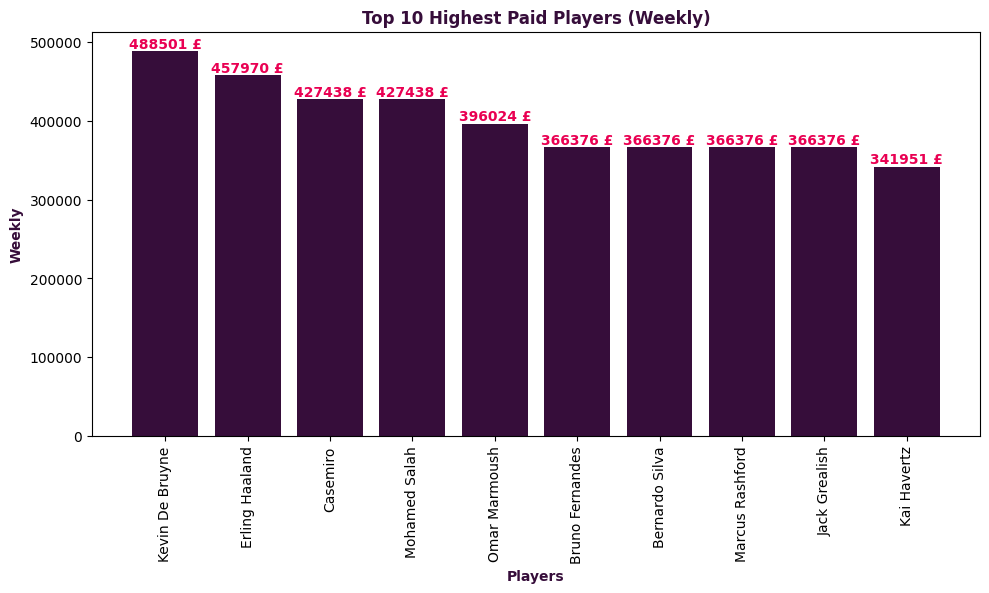

In [67]:
Highest_salaries=pd.DataFrame(data_2[['Player','Weekly']])
Highest_salaries=Highest_salaries.sort_values('Weekly',ascending=False)
plt.figure(figsize=[10,5])
plt.bar(Highest_salaries['Player'].head(10),Highest_salaries['Weekly'].head(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £',fontweight='bold',color='#E90052')
plt.title('Top 10 Highest Paid Players (Weekly)',fontweight='bold',color='#360D3A')
plt.xlabel('Players',fontweight='bold',color='#360D3A')
plt.ylabel('Weekly',fontweight='bold',color='#360D3A')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

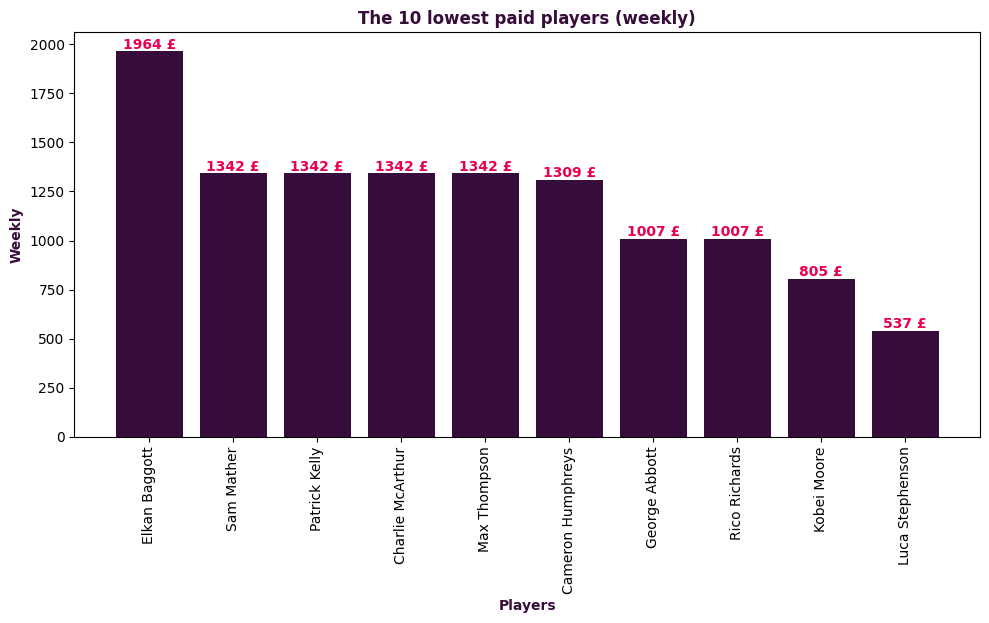

In [68]:

plt.figure(figsize=[10,5])
plt.bar(Highest_salaries['Player'].tail(10),Highest_salaries['Weekly'].tail(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £',fontweight='bold',color='#E90052')
plt.title('The 10 lowest paid players (weekly)',fontweight='bold',color='#360D3A')
plt.xlabel('Players',fontweight='bold',color='#360D3A')
plt.ylabel('Weekly',fontweight='bold',color='#360D3A')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

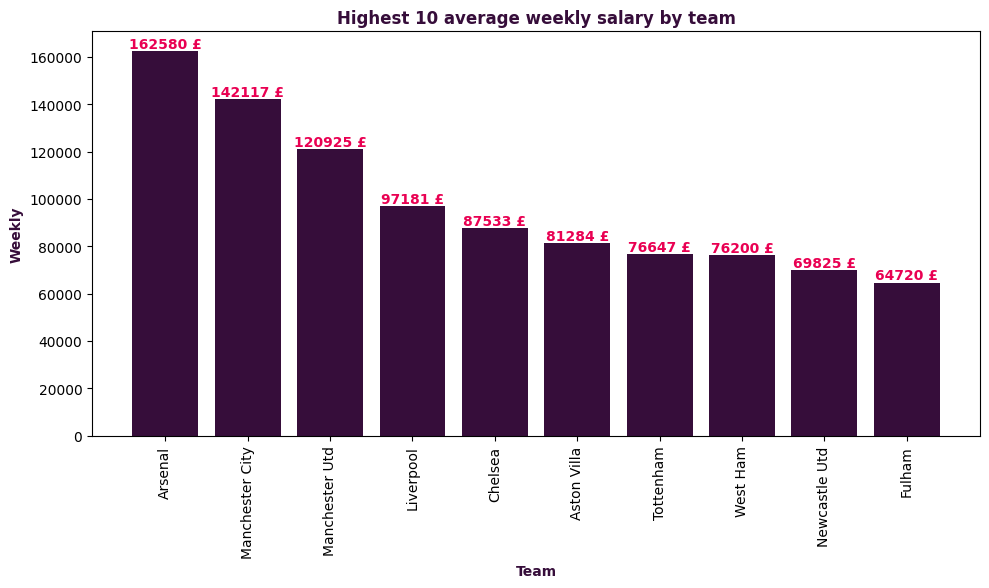

In [69]:
avg_team_salary=pd.DataFrame(data_2.groupby('Team')['Weekly'].mean())
avg_team_salary=avg_team_salary.sort_values('Weekly',ascending=False)
avg_team_salary.reset_index(inplace=True)
plt.figure(figsize=[10,5])
plt.bar(avg_team_salary['Team'].head(10),avg_team_salary['Weekly'].head(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £',fontweight='bold',color='#E90052')
plt.title('Highest 10 average weekly salary by team',fontweight='bold',color='#360D3A')
plt.xlabel('Team',fontweight='bold',color='#360D3A')
plt.ylabel('Weekly',fontweight='bold',color='#360D3A')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

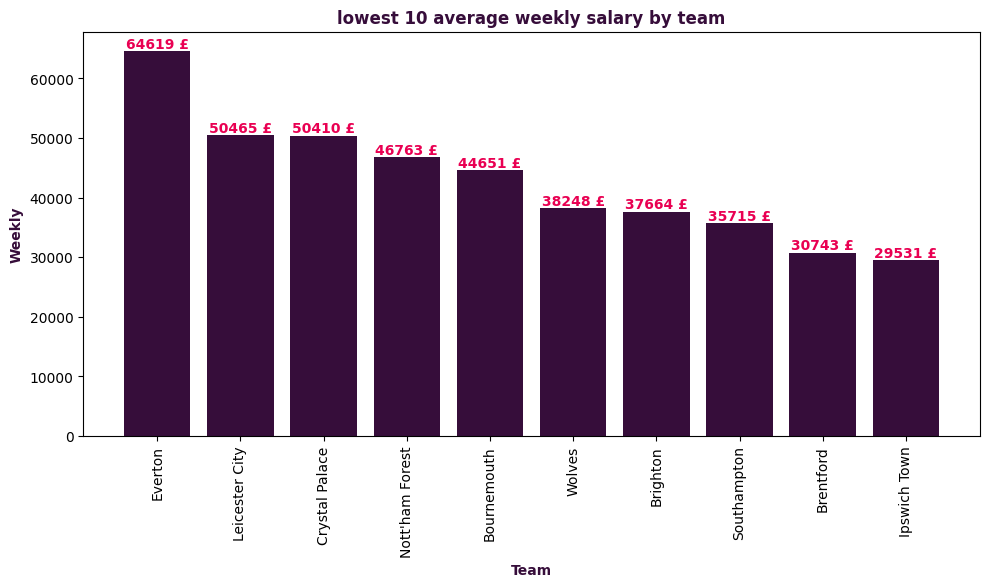

In [70]:
plt.figure(figsize=[10,5])
plt.bar(avg_team_salary['Team'].tail(10),avg_team_salary['Weekly'].tail(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £',fontweight='bold',color='#E90052')
plt.title('lowest 10 average weekly salary by team',fontweight='bold',color='#360D3A')
plt.xlabel('Team',fontweight='bold',color='#360D3A')
plt.ylabel('Weekly',fontweight='bold',color='#360D3A')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

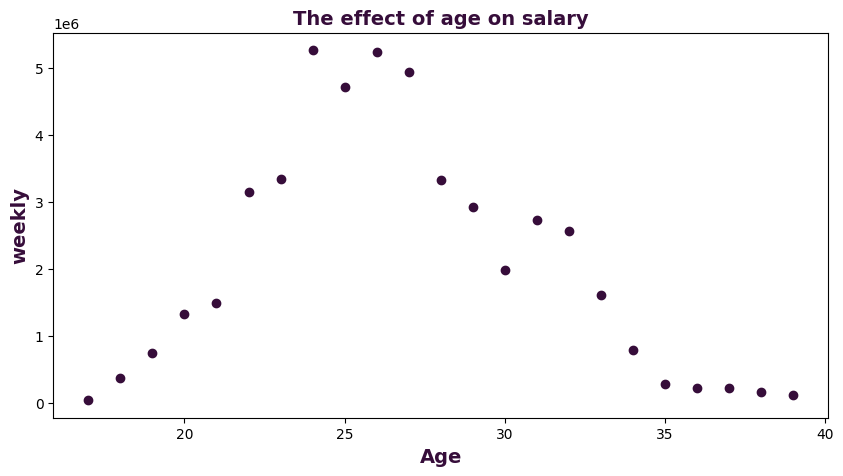

In [71]:
salary_by_age=pd.DataFrame(data_2.groupby('Age')['Weekly'].sum())
salary_by_age=salary_by_age.sort_values('Weekly',ascending=False)
salary_by_age.reset_index(inplace=True)
plt.figure(figsize=[10,5])
plt.scatter(salary_by_age['Age'],salary_by_age['Weekly'], c='#360D3A')
plt.title('The effect of age on salary', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('Age',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('weekly',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

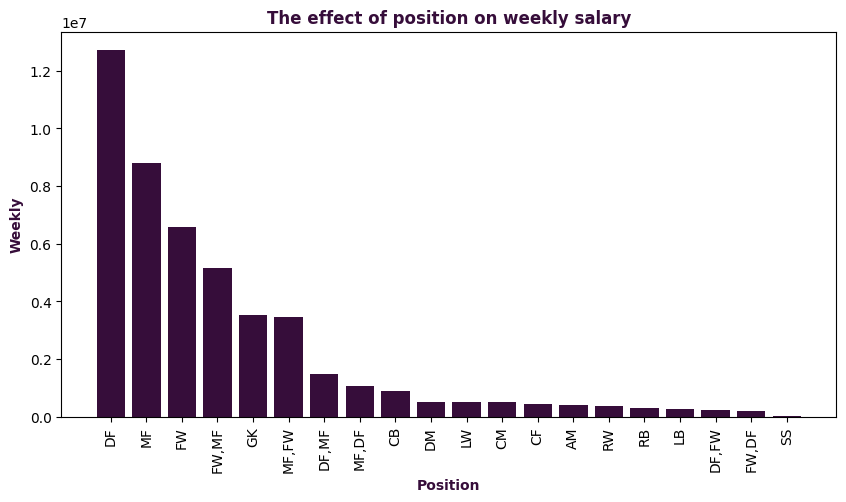

In [72]:
salary_by_Position=pd.DataFrame(data_2.groupby('Position')['Weekly'].sum())
salary_by_Position=salary_by_Position.sort_values('Weekly',ascending=False)
salary_by_Position.reset_index(inplace=True)
plt.figure(figsize=[10,5])
plt.bar(salary_by_Position['Position'], salary_by_Position['Weekly'],color='#360D3A')
plt.title('The effect of position on weekly salary',fontweight='bold',color='#360D3A')
plt.xlabel('Position',fontweight='bold',color='#360D3A')
plt.ylabel('Weekly',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

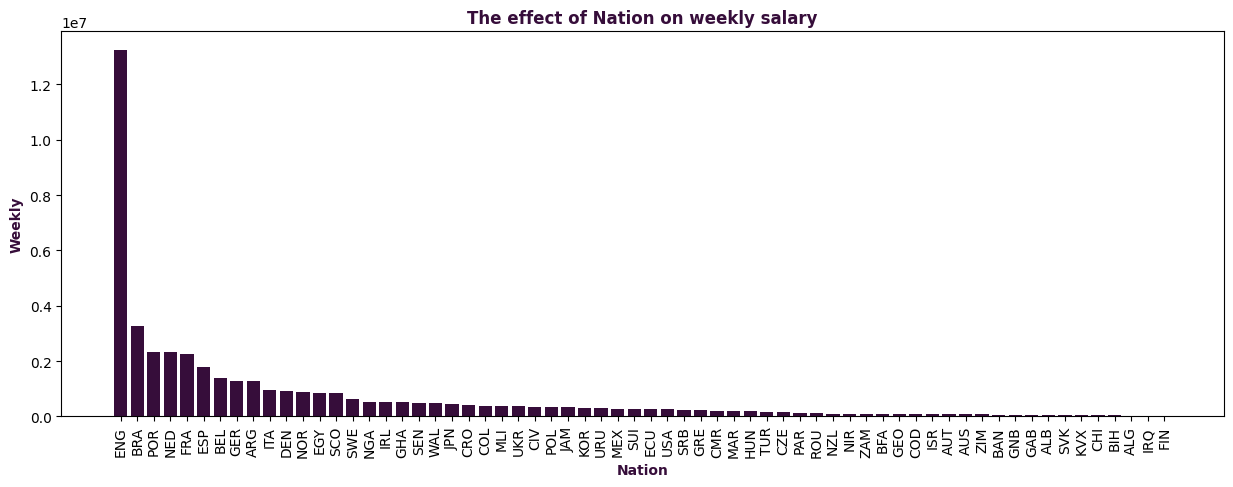

In [73]:
salary_by_Nation=pd.DataFrame(data_2.groupby('Nation')['Weekly'].sum())
salary_by_Nation=salary_by_Nation.sort_values('Weekly',ascending=False)
salary_by_Nation.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.bar(salary_by_Nation['Nation'], salary_by_Nation['Weekly'],color='#360D3A')
plt.title('The effect of Nation on weekly salary',fontweight='bold',color='#360D3A')
plt.xlabel('Nation',fontweight='bold',color='#360D3A')
plt.ylabel('Weekly',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

In [74]:
data_2.columns

Index(['Player', 'Nation', 'Position', 'Team', 'Age', 'Weekly', 'Annual'], dtype='object')

* Player	اسم اللاعب
* Nation	الجنسية/الدولة
* Position	المركز (FW, MF, DF, GK)
* Team	اسم الفريق
* Age	العمر (سنوات)
* Weekly	الراتب الأسبوعي (£)
* Annual	الراتب السنوي (£)

In [75]:
data_2

Player Nation Position             Team  Age  Weekly    Annual
0      Kevin De Bruyne    BEL    MF,FW  Manchester City   33  488501  25402046
1       Erling Haaland    NOR       FW  Manchester City   24  457970  23814418
2             Casemiro    BRA       MF   Manchester Utd   32  427438  22226790
3        Mohamed Salah    EGY       FW        Liverpool   32  427438  22226790
4      Bruno Fernandes    POR       MF   Manchester Utd   29  366376  19051534
..                 ...    ...      ...              ...  ...     ...       ...
679  Cameron Humphreys    NaN       CM     Ipswich Town   21    1309     68072
680      George Abbott    NaN       DM        Tottenham   19    1007     52356
681      Rico Richards    ENG       AM      Aston Villa   21    1007     52356
682        Kobei Moore    NaN       CF      Aston Villa   20     805     41885
683    Luca Stephenson    NaN       DM        Liverpool   21     537     27923

[684 rows x 7 columns]

In [76]:
data_3=pd.read_csv('../player_stats.csv')


In [77]:
data_3.describe()

age         born      played      starts      minutes  \
count  568.000000   568.000000  571.000000  571.000000   571.000000   
mean    25.933099  1998.519366   19.718039   14.255692  1280.558669   
std      4.447510     4.470911   11.905889   12.026190  1028.756114   
min     16.000000  1985.000000    1.000000    0.000000     1.000000   
25%     23.000000  1996.000000    9.000000    3.000000   319.000000   
50%     26.000000  1999.000000   21.000000   12.000000  1060.000000   
75%     29.000000  2002.000000   31.000000   25.000000  2183.000000   
max     40.000000  2008.000000   37.000000   37.000000  3330.000000   

            goals     assists  penalty_kicks  penalty_kick_attempts  \
count  571.000000  571.000000     571.000000             571.000000   
mean     1.852890    1.378284       0.113835               0.138354   
std      3.491755    2.227535       0.667018               0.720709   
min      0.000000    0.000000       0.000000               0.000000   
25%      0.000000    0.000000       0.000000               0.000000   
50%      0.000000    0.000000       0.000000               0.000000   
75%      2.000000    2.000000       0.000000               0.000000   
max     28.000000   18.000000       9.000000               9.000000   

           yellow         red  expected_goals  progressive_carries  \
count  571.000000  571.000000      571.000000           571.000000   
mean     2.751313    0.087566        1.876532            24.288967   
std      2.750020    0.300939        3.117080            31.782134   
min      0.000000    0.000000        0.000000             0.000000   
25%      0.000000    0.000000        0.100000             2.000000   
50%      2.000000    0.000000        0.700000            12.000000   
75%      4.000000    0.000000        2.100000            34.000000   
max     12.000000    2.000000       24.800000           202.000000   

       progressive_passes  received_progressive_passes  
count          571.000000                   571.000000  
mean            47.851138                    47.357268  
std             52.559513                    65.892192  
min              0.000000                     0.000000  
25%              6.000000                     2.000000  
50%             32.000000                    18.000000  
75%             71.000000                    74.500000  
max            302.000000                   470.000000

In [78]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         571 non-null    object 
 1   nation                       568 non-null    object 
 2   position                     571 non-null    object 
 3   team                         571 non-null    object 
 4   age                          568 non-null    float64
 5   born                         568 non-null    float64
 6   played                       571 non-null    int64  
 7   starts                       571 non-null    int64  
 8   minutes                      571 non-null    int64  
 9   goals                        571 non-null    int64  
 10  assists                      571 non-null    int64  
 11  penalty_kicks                571 non-null    int64  
 12  penalty_kick_attempts        571 non-null    int64  
 13  yellow              

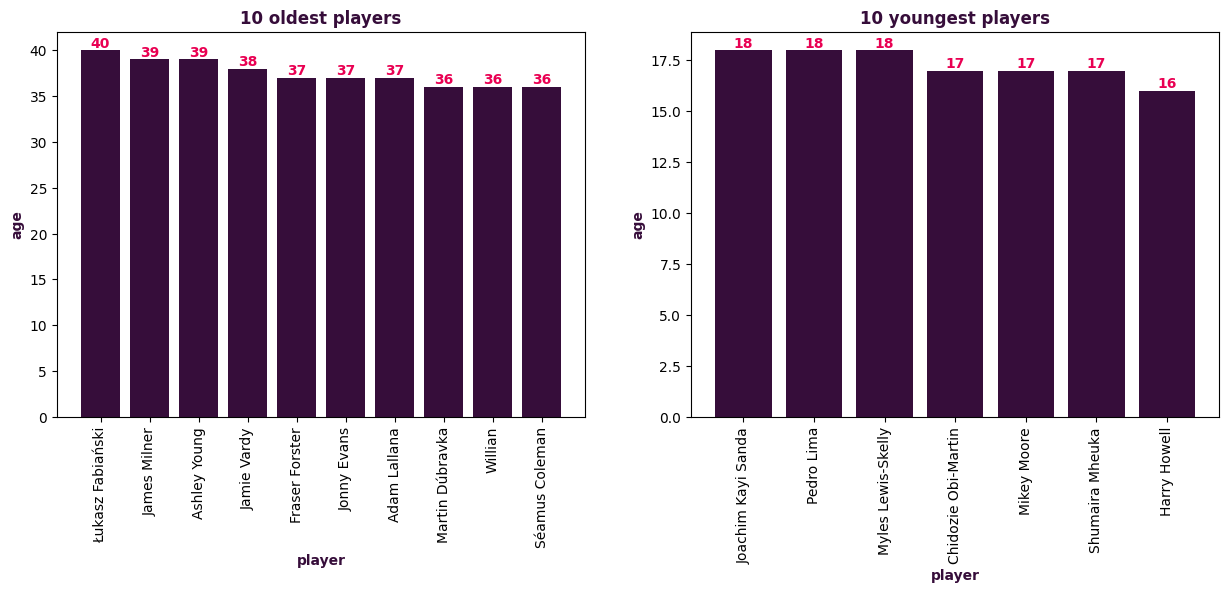

In [79]:
ages=pd.DataFrame(data_3[['name','age']])
ages=ages.sort_values('age',ascending=False)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.bar(ages['name'].head(10), ages['age'].head(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f',fontweight='bold',color='#E90052')
plt.title('10 oldest players',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('age',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.bar(ages['name'].tail(10), ages['age'].tail(10),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f',fontweight='bold',color='#E90052')
plt.title('10 youngest players',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('age',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

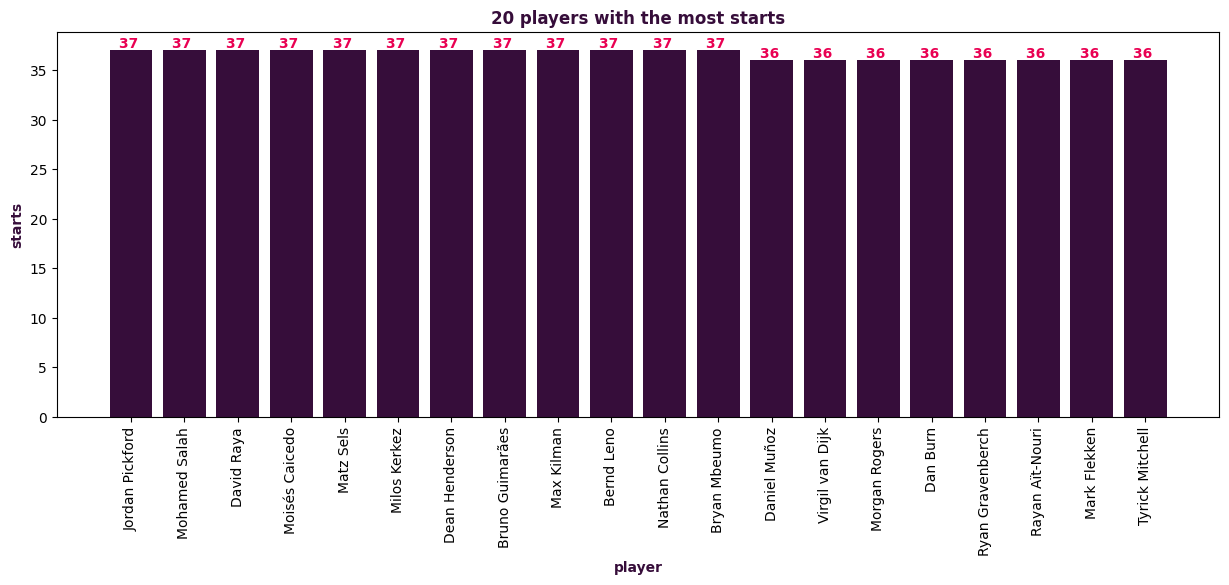

In [80]:
starts=pd.DataFrame(data_3[['name','starts']])
starts=starts.sort_values('starts',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(starts['name'].head(20), starts['starts'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('20 players with the most starts',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('starts',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

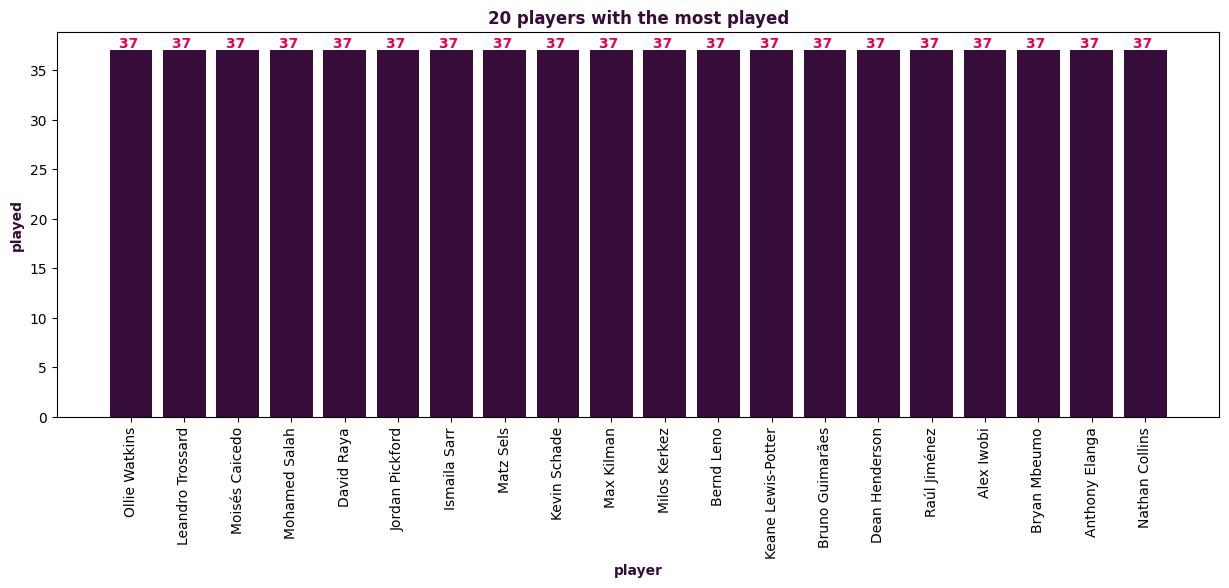

In [81]:
played=pd.DataFrame(data_3[['name','played']])
played=played.sort_values('played',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(played['name'].head(20), played['played'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('20 players with the most played',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('played',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

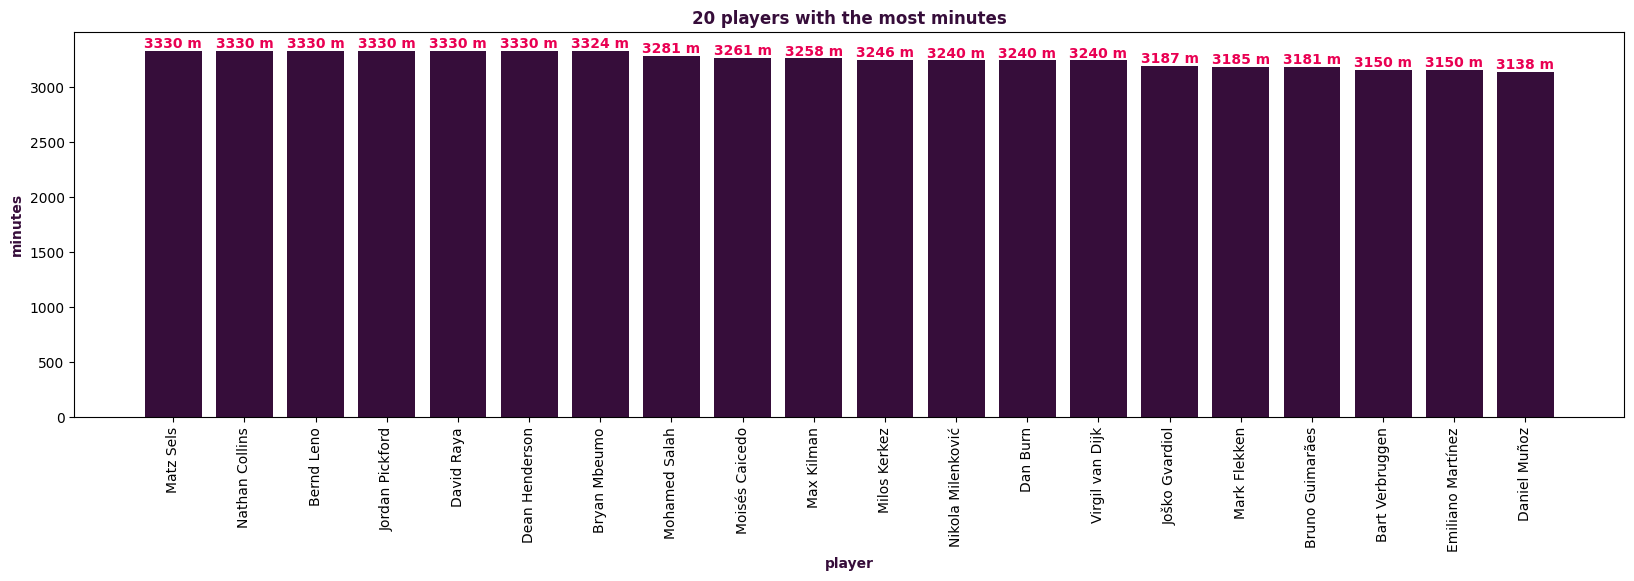

In [82]:
minutes=pd.DataFrame(data_3[['name','minutes']])
minutes=minutes.sort_values('minutes',ascending=False)
plt.figure(figsize=[20,5])
plt.bar(minutes['name'].head(20), minutes['minutes'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f m',fontweight='bold',color='#E90052')
plt.title('20 players with the most minutes',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('minutes',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

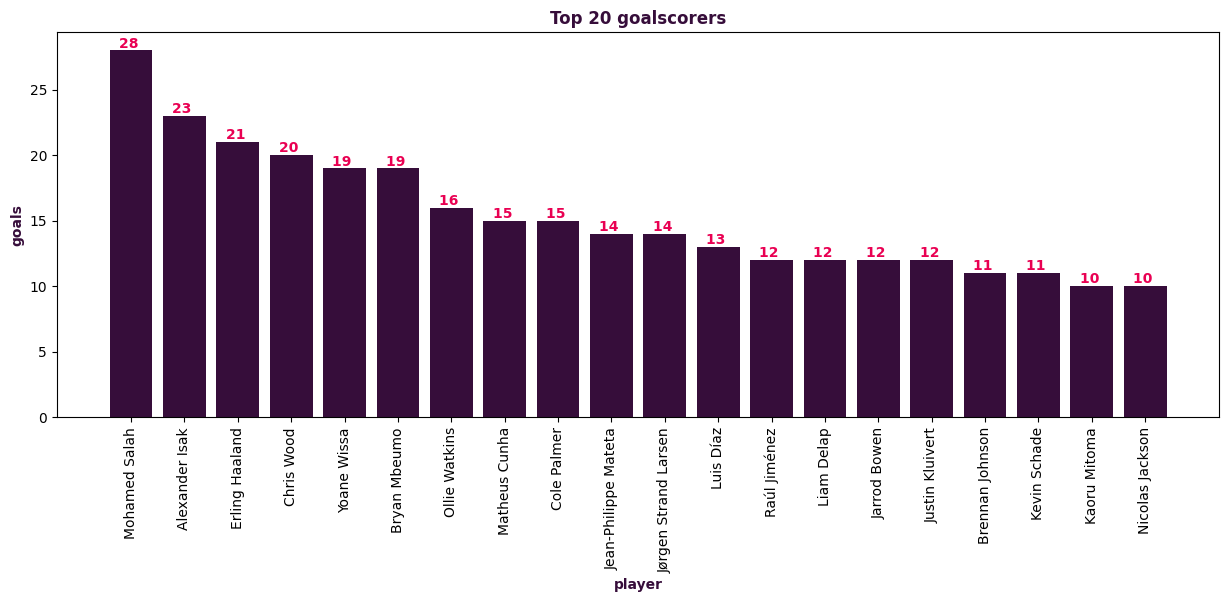

In [83]:
goals=pd.DataFrame(data_3[['name','goals']])
goals=goals.sort_values('goals',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(goals['name'].head(20), goals['goals'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('Top 20 goalscorers',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

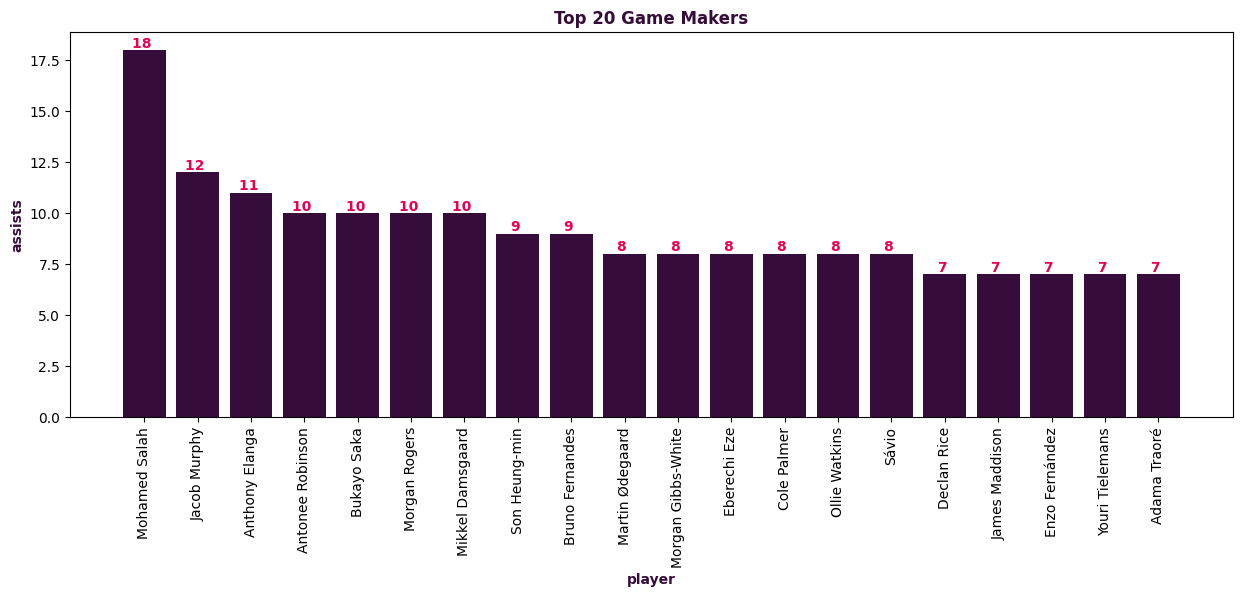

In [84]:
assists=pd.DataFrame(data_3[['name','assists']])
assists=assists.sort_values('assists',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(assists['name'].head(20), assists['assists'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('Top 20 Game Makers',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('assists',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

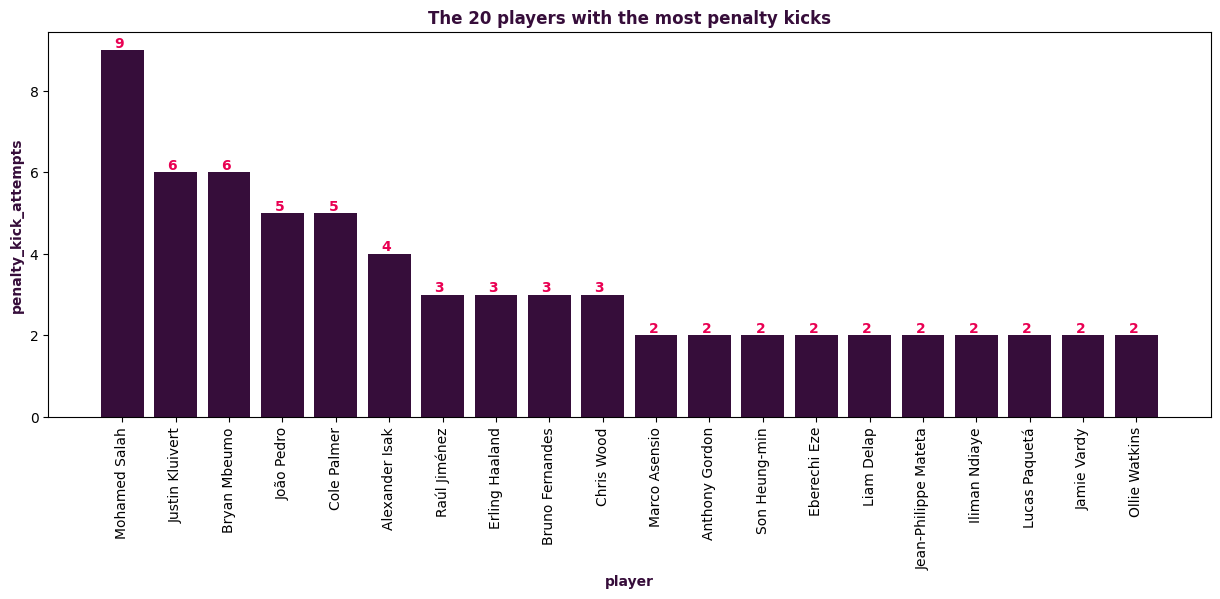

In [85]:
penalty_kick_attempts=pd.DataFrame(data_3[['name','penalty_kick_attempts']])
penalty_kick_attempts=penalty_kick_attempts.sort_values('penalty_kick_attempts',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(penalty_kick_attempts['name'].head(20), penalty_kick_attempts['penalty_kick_attempts'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('The 20 players with the most penalty kicks',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('penalty_kick_attempts',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

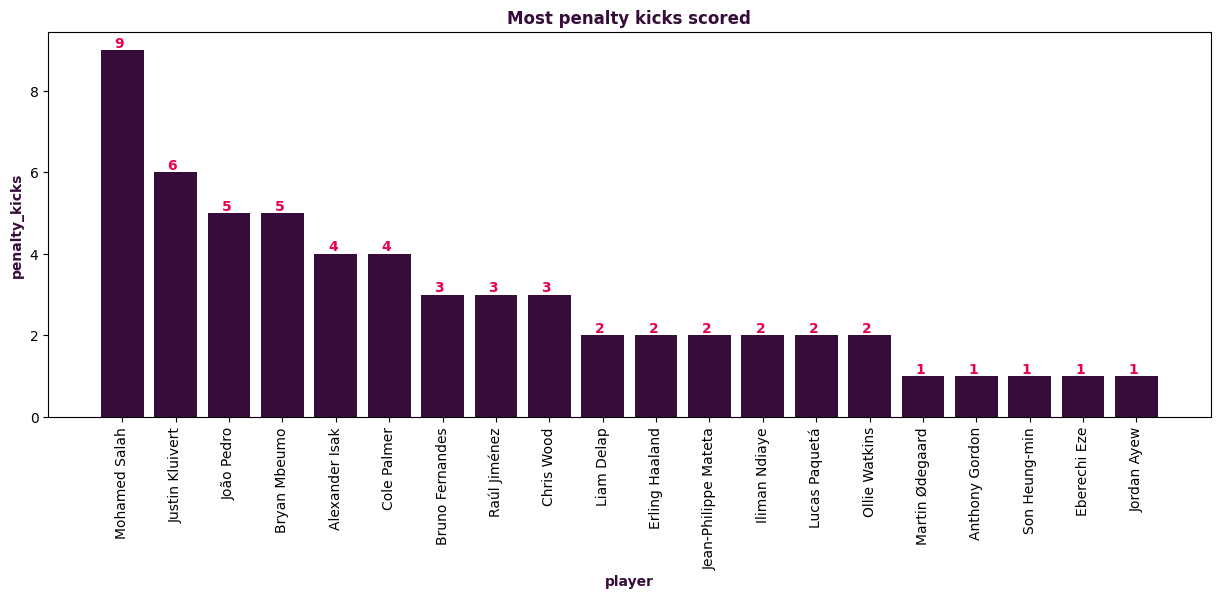

In [86]:
penalty_kicks=pd.DataFrame(data_3[['name','penalty_kicks']])
penalty_kicks=penalty_kicks.sort_values('penalty_kicks',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(penalty_kicks['name'].head(20), penalty_kicks['penalty_kicks'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('Most penalty kicks scored',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('penalty_kicks',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

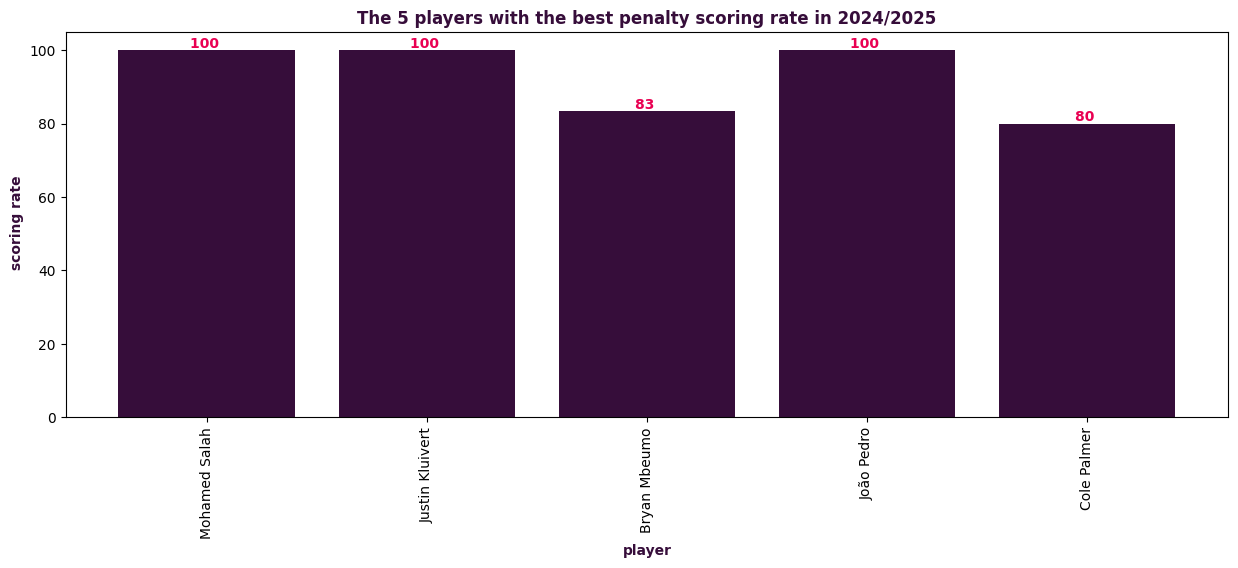

In [87]:
Best_rate=pd.DataFrame(data_3[['name','penalty_kicks','penalty_kick_attempts']])
Best_rate=Best_rate.sort_values('penalty_kick_attempts',ascending=False)
Best_rate['Best_rate']=(Best_rate['penalty_kicks']/Best_rate['penalty_kick_attempts'])*100
plt.figure(figsize=[15,5])
plt.bar(Best_rate['name'].head(), Best_rate['Best_rate'].head(),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt="%.0f ",fontweight='bold',color='#E90052')
plt.title('The 5 players with the best penalty scoring rate in 2024/2025',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel(' scoring rate',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

In [88]:
Best_rate

name  penalty_kicks  penalty_kick_attempts   Best_rate
446        Mohamed Salah              9                      9  100.000000
286      Justin Kluivert              6                      6  100.000000
337         Bryan Mbeumo              5                      6   83.333333
261           João Pedro              5                      5  100.000000
404          Cole Palmer              4                      5   80.000000
..                   ...            ...                    ...         ...
566         Ashley Young              0                      0         NaN
567       Illia Zabarnyi              0                      0         NaN
568  Oleksandr Zinchenko              0                      0         NaN
569       Joshua Zirkzee              0                      0         NaN
11            Nathan Aké              0                      0         NaN

[571 rows x 4 columns]

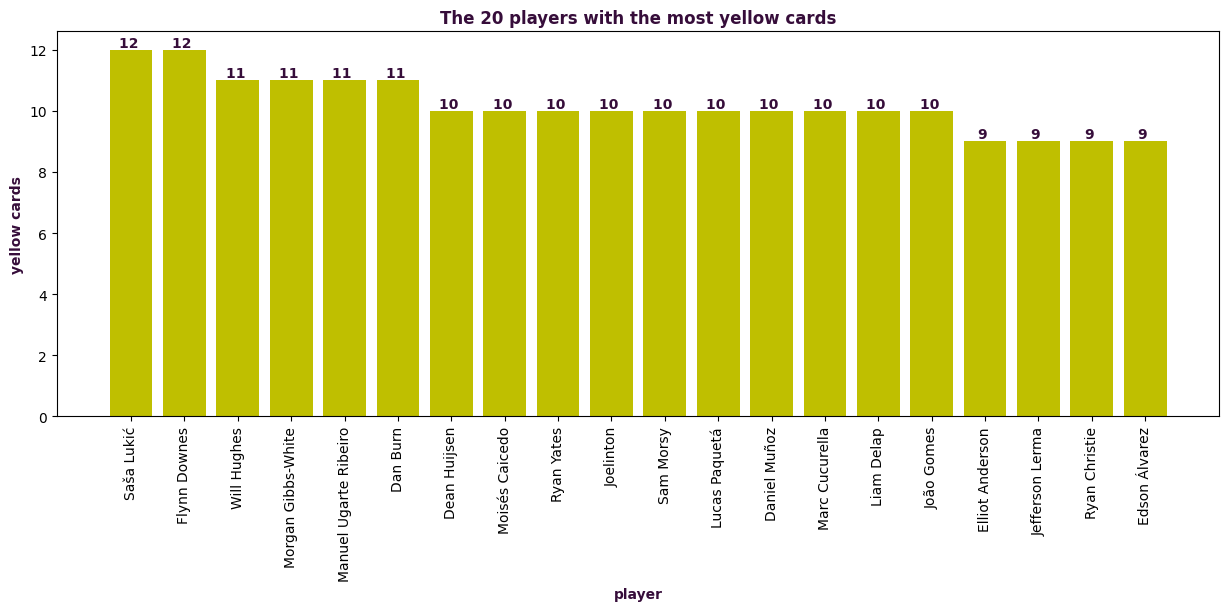

In [89]:
yellow=pd.DataFrame(data_3[['name','yellow']])
yellow=yellow.sort_values('yellow',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(yellow['name'].head(20), yellow['yellow'].head(20),color='y')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#360D3A')
plt.title('The 20 players with the most yellow cards',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('yellow cards',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

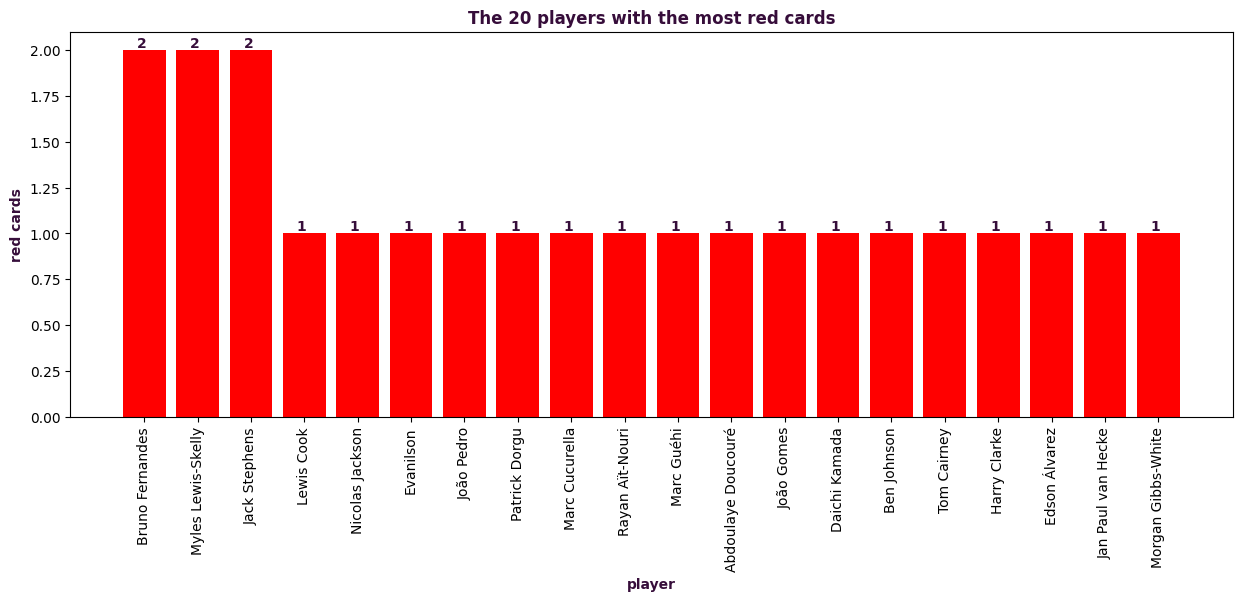

In [90]:
red=pd.DataFrame(data_3[['name','red']])
red=red.sort_values('red',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(red['name'].head(20), red['red'].head(20),color='r')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#360D3A')
plt.title('The 20 players with the most red cards',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('red cards',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

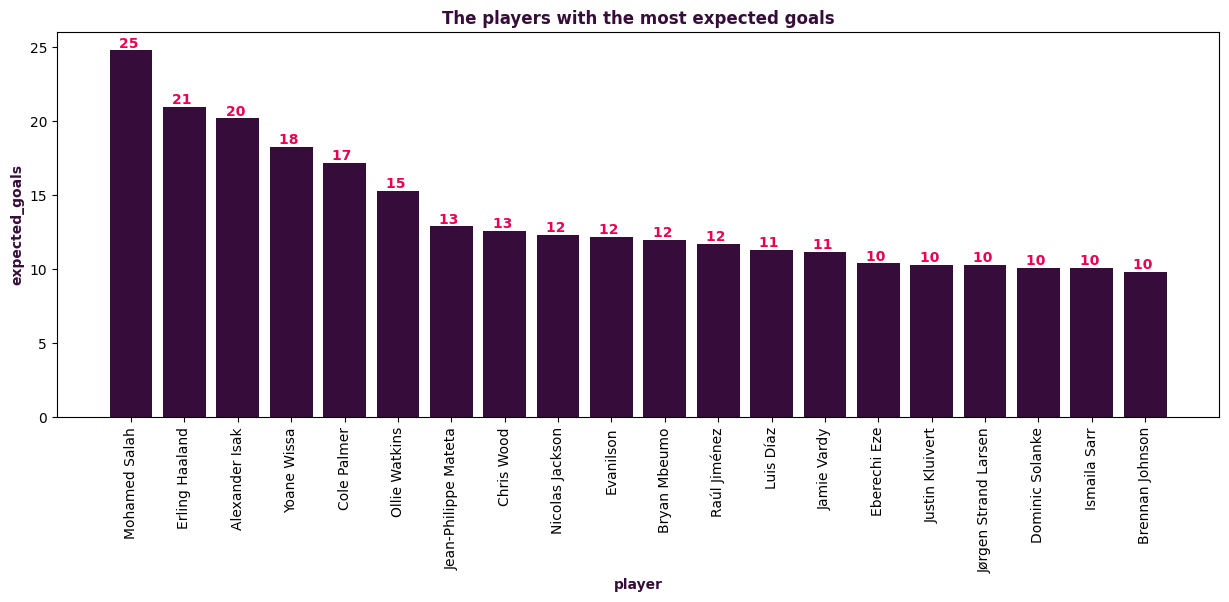

In [91]:
expected_goals=pd.DataFrame(data_3[['name','expected_goals']])
expected_goals=expected_goals.sort_values('expected_goals',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(expected_goals['name'].head(20), expected_goals['expected_goals'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('The players with the most expected goals',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('expected_goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

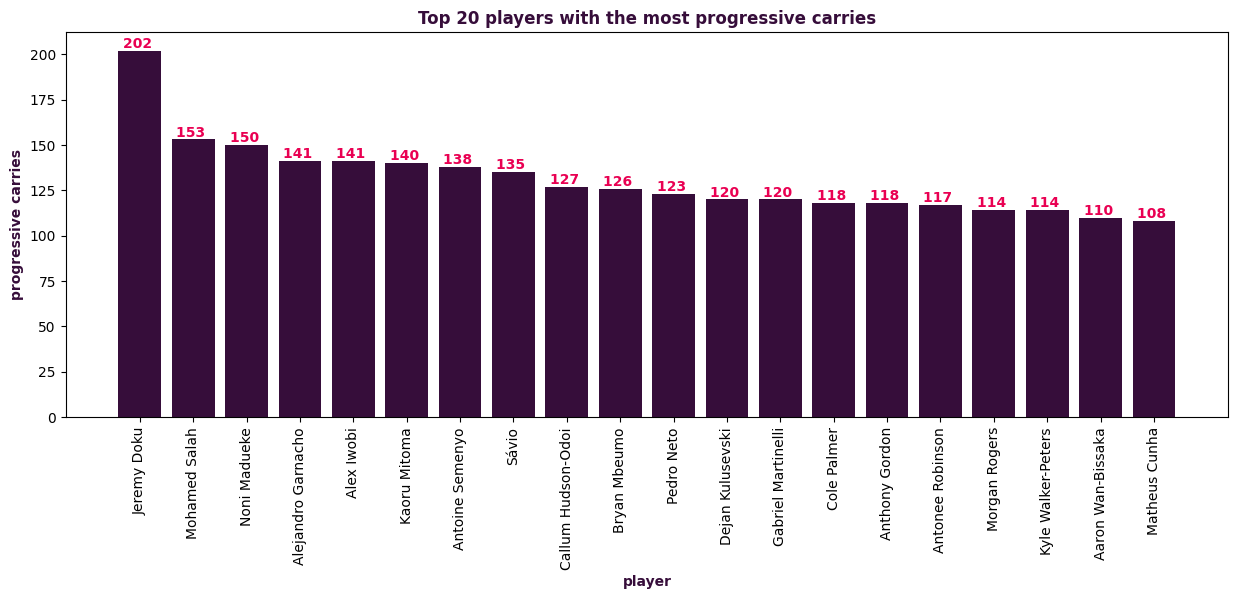

In [92]:
progressive_carries=pd.DataFrame(data_3[['name','progressive_carries']])
progressive_carries=progressive_carries.sort_values('progressive_carries',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(progressive_carries['name'].head(20), progressive_carries['progressive_carries'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('Top 20 players with the most progressive carries',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('progressive carries',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

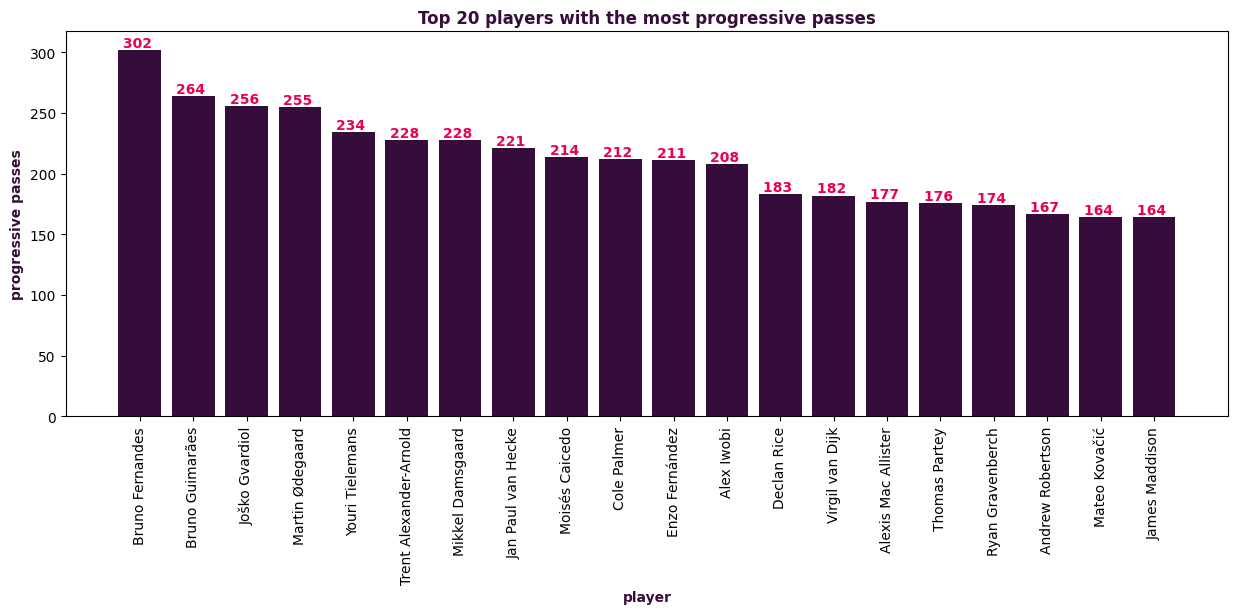

In [93]:
progressive_passes=pd.DataFrame(data_3[['name','progressive_passes']])
progressive_passes=progressive_passes.sort_values('progressive_passes',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(progressive_passes['name'].head(20), progressive_passes['progressive_passes'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('Top 20 players with the most progressive passes',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('progressive passes',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

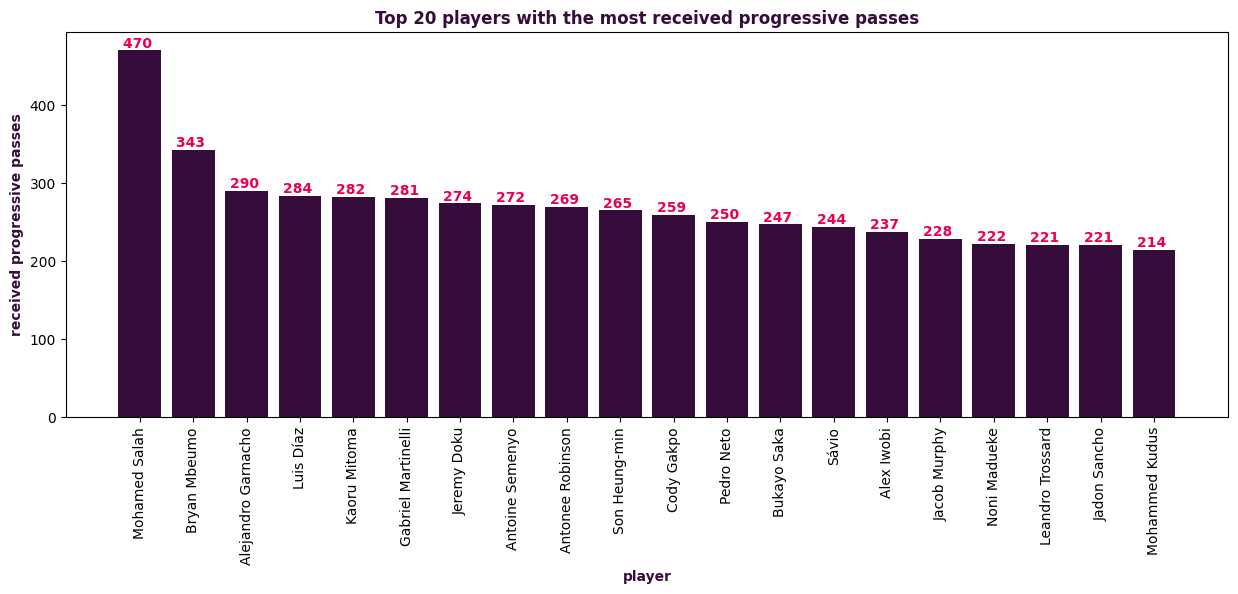

In [94]:
received_progressive_passes=pd.DataFrame(data_3[['name','received_progressive_passes']])
received_progressive_passes=received_progressive_passes.sort_values('received_progressive_passes',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(received_progressive_passes['name'].head(20), received_progressive_passes['received_progressive_passes'].head(20),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',color='#E90052')
plt.title('Top 20 players with the most received progressive passes',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('received progressive passes',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

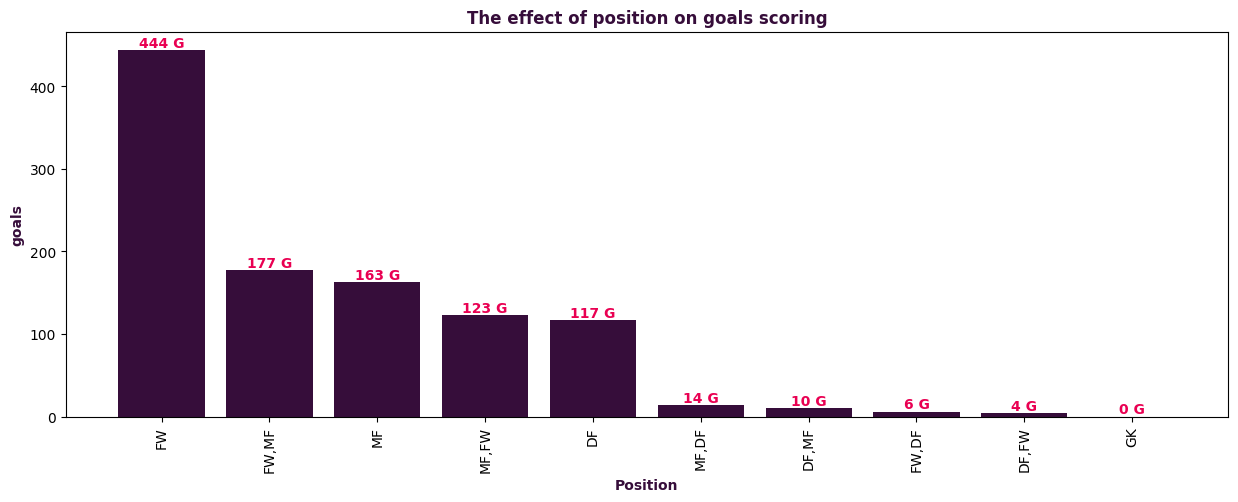

In [95]:
goals_by_Position=pd.DataFrame(data_3.groupby('position')['goals'].sum())
goals_by_Position=goals_by_Position.sort_values('goals',ascending=False)
goals_by_Position.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.bar(goals_by_Position['position'], goals_by_Position['goals'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G',fontweight='bold',color='#E90052')
plt.title('The effect of position on goals scoring',fontweight='bold',color='#360D3A')
plt.xlabel('Position',fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

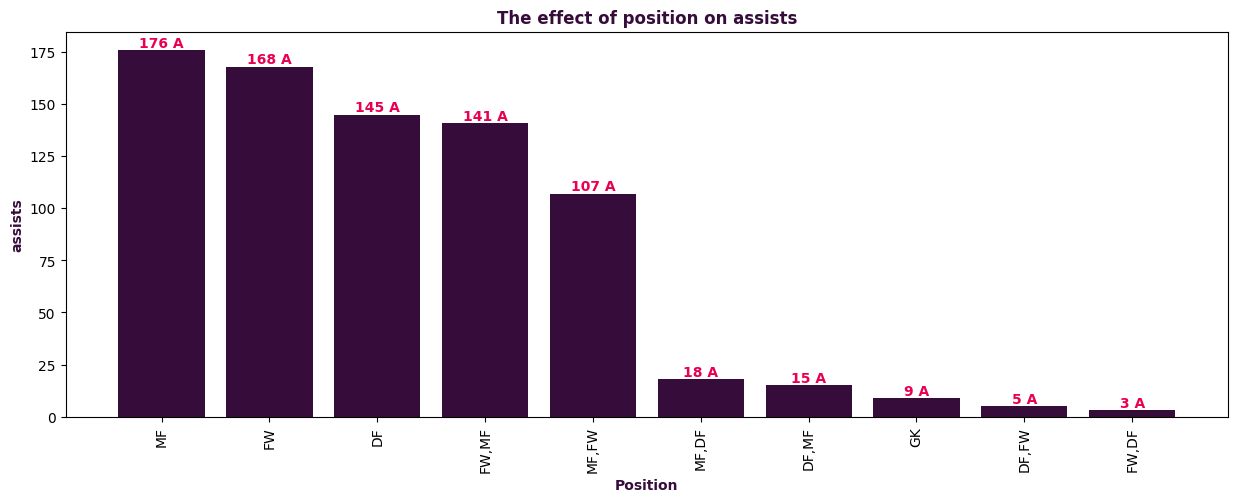

In [96]:
assists_by_Position=pd.DataFrame(data_3.groupby('position')['assists'].sum())
assists_by_Position=assists_by_Position.sort_values('assists',ascending=False)
assists_by_Position.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.bar(assists_by_Position['position'], assists_by_Position['assists'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f A',fontweight='bold',color='#E90052')
plt.title('The effect of position on assists',fontweight='bold',color='#360D3A')
plt.xlabel('Position',fontweight='bold',color='#360D3A')
plt.ylabel('assists',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

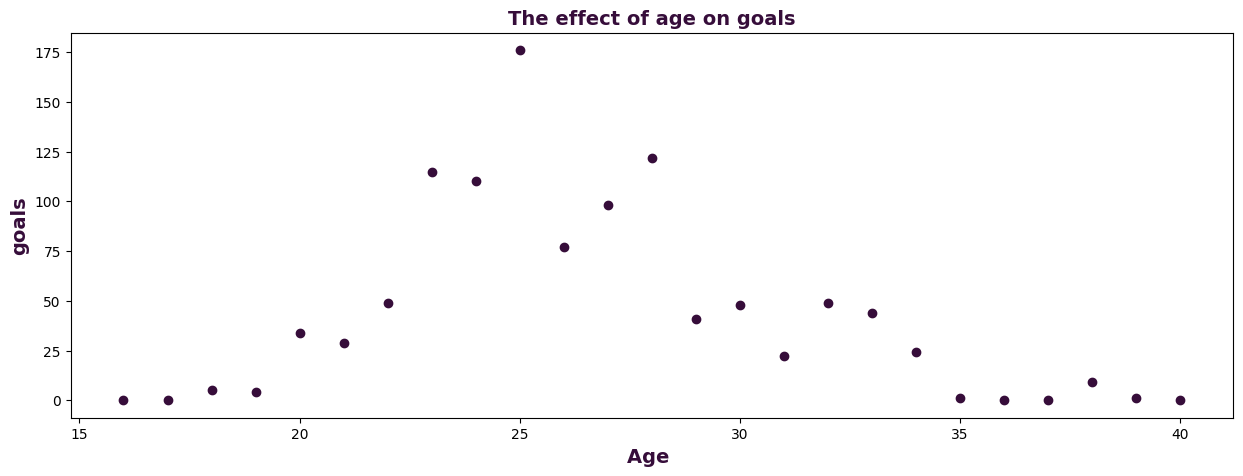

In [97]:
goals_by_age=pd.DataFrame(data_3.groupby('age')['goals'].sum())
goals_by_age=goals_by_age.sort_values('goals',ascending=False)
goals_by_age.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(goals_by_age['age'], goals_by_age['goals'],c='#360D3A')
plt.title('The effect of age on goals', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('Age ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

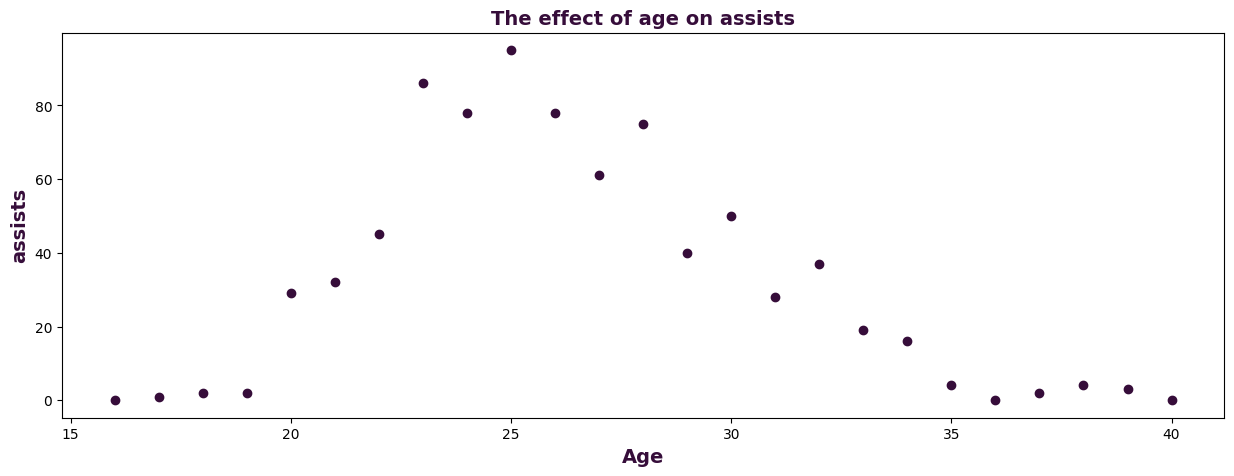

In [98]:
assists_by_age=pd.DataFrame(data_3.groupby('age')['assists'].sum())
assists_by_age=assists_by_age.sort_values('assists',ascending=False)
assists_by_age.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(assists_by_age['age'],assists_by_age['assists'],c='#360D3A')
plt.title('The effect of age on assists', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('Age',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('assists',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

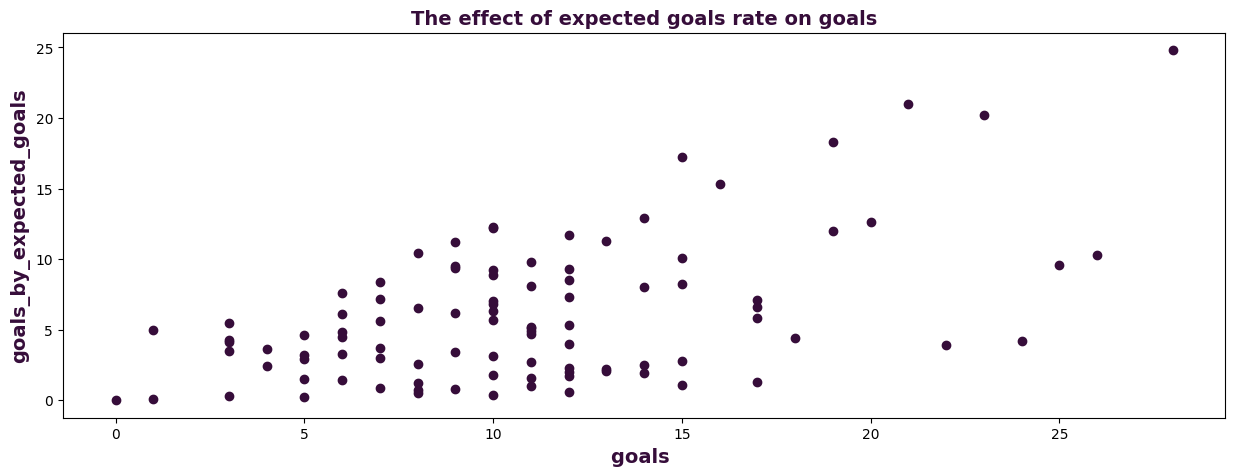

In [99]:
goals_by_expected_goals=pd.DataFrame(data_3.groupby('expected_goals')['goals'].sum())
goals_by_expected_goals=goals_by_expected_goals.sort_values('goals',ascending=False)
goals_by_expected_goals.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(goals_by_expected_goals['goals'], goals_by_expected_goals['expected_goals'],c='#360D3A')
plt.title('The effect of expected goals rate on goals', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('goals ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('goals_by_expected_goals',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

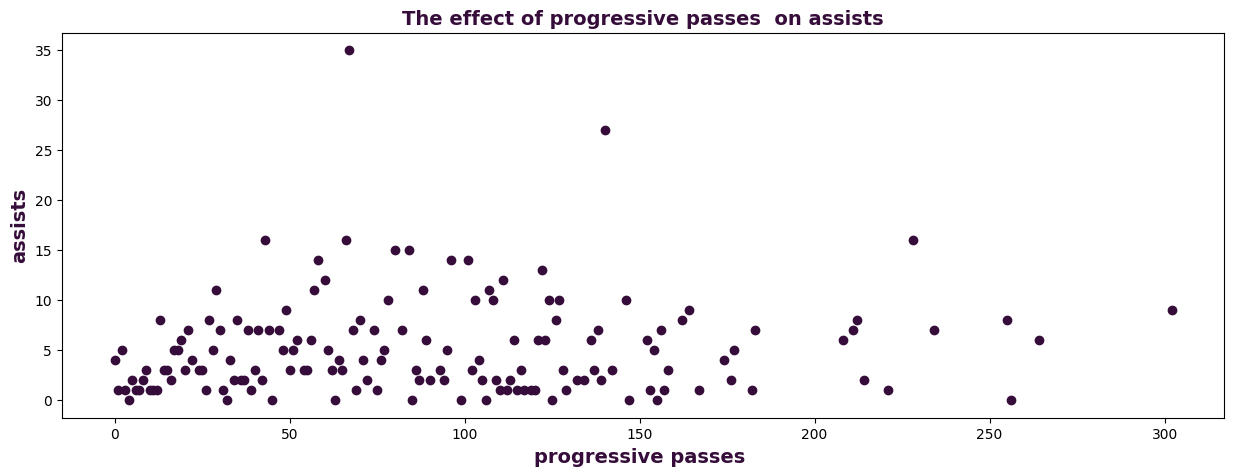

In [100]:
assists_by_progressive_passes=pd.DataFrame(data_3.groupby('progressive_passes')['assists'].sum())
assists_by_progressive_passes=assists_by_progressive_passes.sort_values('assists',ascending=False)
assists_by_progressive_passes.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(assists_by_progressive_passes['progressive_passes'],assists_by_progressive_passes['assists'], c='#360D3A')
plt.title('The effect of progressive passes  on assists', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('progressive passes ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('assists',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

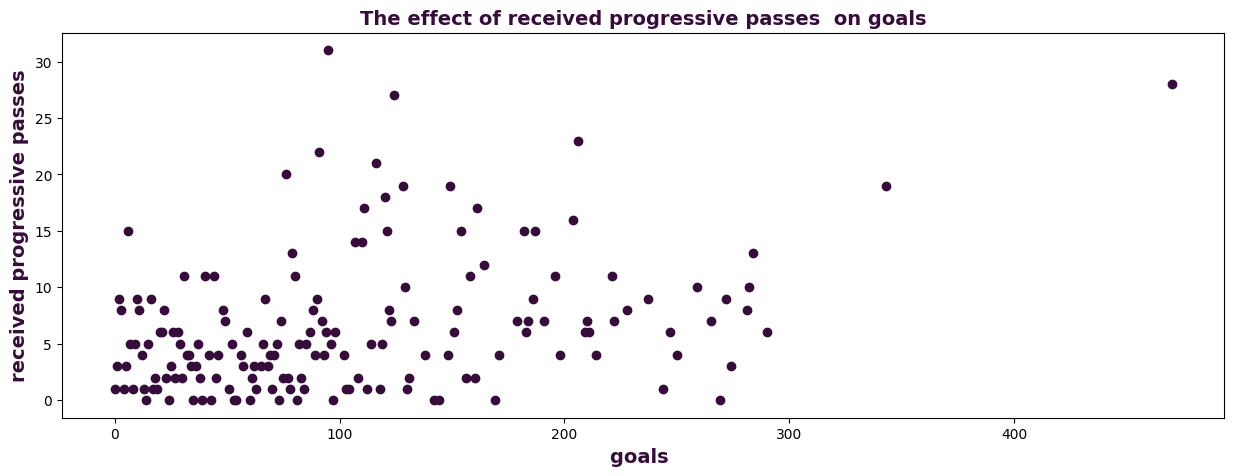

In [101]:
goals_by_received_progressive_passes=pd.DataFrame(data_3.groupby('received_progressive_passes')['goals'].sum())
goals_by_received_progressive_passes=goals_by_received_progressive_passes.sort_values('goals',ascending=False)
goals_by_received_progressive_passes.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(goals_by_received_progressive_passes['received_progressive_passes'], goals_by_received_progressive_passes['goals'],c='#360D3A')
plt.title('The effect of received progressive passes  on goals', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('goals ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('received progressive passes',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

In [102]:
data_3.columns

Index(['name', 'nation', 'position', 'team', 'age', 'born', 'played', 'starts',
       'minutes', 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts',
       'yellow', 'red', 'expected_goals', 'progressive_carries',
       'progressive_passes', 'received_progressive_passes'],
      dtype='object')

* 'name'                 → اسم اللاعب
* 'nation'               → الجنسية/الدولة  
* 'position'             → المركز (ST, CM, LB...)
* 'team'                 → الفريق
* 'age'                  → العمر الحالي
* 'born'                 → سنة الميلاد
* 'played'               → المباريات المُشارك فيها
* 'starts'               → المباريات الأساسية (11)
* 'minutes'              → الدقائق المُلعَبَة الكلية
* 'goals'                → الأهداف
* 'assists'              → التمريرات الحاسمة
* 'penalty_kicks'        → ركلات الجزاء (مسجلة)
* 'penalty_kick_attempts'→ محاولات ركلات الجزاء
* 'yellow'               → البطاقات الصفراء
* 'red'                  → البطاقات الحمراء
* 'expected_goals'       → xG (الأهداف المتوقعة)
* 'progressive_carries'  → الكرات التقدمية (دریبلينج متقدم)
* 'progressive_passes'   → التمريرات التقدمية  
* 'received_progressive_passes' → التمريرات التقدمية المستلمة


In [103]:
data_3

name         nation position            team   age  \
0             Max Aarons        England       DF     Bournemouth  25.0   
1      Joshua Acheampong        England       DF         Chelsea  19.0   
2            Tyler Adams  United States       MF     Bournemouth  26.0   
3       Tosin Adarabioyo        England       DF         Chelsea  27.0   
4          Simon Adingra   Cote dIvoire    FW,MF        Brighton  23.0   
..                   ...            ...      ...             ...   ...   
566         Ashley Young        England       DF         Everton  39.0   
567       Illia Zabarnyi        Ukraine       DF     Bournemouth  22.0   
568  Oleksandr Zinchenko        Ukraine    DF,MF         Arsenal  28.0   
569       Joshua Zirkzee    Netherlands    FW,MF  Manchester Utd  24.0   
570      Martin Ødegaard         Norway       MF         Arsenal  26.0   

       born  played  starts  minutes  goals  assists  penalty_kicks  \
0    2000.0       3       1       86      0        0              0   
1    2006.0       4       2      170      0        0              0   
2    1999.0      27      20     1875      0        3              0   
3    1997.0      21      14     1319      1        1              0   
4    2002.0      28      11     1052      2        2              0   
..      ...     ...     ...      ...    ...      ...            ...   
566  1985.0      31      18     1785      1        3              0   
567  2002.0      35      34     3019      0        0              0   
568  1996.0      14       4      458      0        1              0   
569  2001.0      32      14     1402      3        1              0   
570  1998.0      29      26     2309      2        8              1   

     penalty_kick_attempts  yellow  red  expected_goals  progressive_carries  \
0                        0       0    0             0.0                    1   
1                        0       1    0             0.2                    0   
2                        0       7    0             1.6                   13   
3                        0       3    0             0.9                    5   
4                        0       0    0             2.4                   50   
..                     ...     ...  ...             ...                  ...   
566                      0       6    1             0.3                   23   
567                      0       4    1             1.1                   26   
568                      0       1    0             0.3                   10   
569                      0       2    0             4.8                   14   
570                      1       4    0             4.7                   91   

     progressive_passes  received_progressive_passes  
0                     8                            3  
1                     8                            0  
2                    71                           10  
3                    39                            1  
4                    18                          128  
..                  ...                          ...  
566                  89                           32  
567                 134                            4  
568                  37                           12  
569                  44                           69  
570                 255                          151  

[571 rows x 19 columns]

In [104]:
data_4=pd.read_csv('../standings.csv')

In [105]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        20 non-null     int64 
 1   team        20 non-null     object
 2   win         20 non-null     int64 
 3   loss        20 non-null     int64 
 4   draw        20 non-null     int64 
 5   goals       20 non-null     int64 
 6   conceded    20 non-null     int64 
 7   points      20 non-null     int64 
 8   last5       20 non-null     object
 9   top_scorer  20 non-null     object
 10  keeper      20 non-null     object
dtypes: int64(7), object(4)
memory usage: 1.8+ KB


In [106]:
data_4.describe()

rank        win       loss       draw      goals   conceded  \
count  20.00000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   10.50000  13.950000  13.950000   9.100000  54.550000  54.550000   
std     5.91608   5.933624   6.723682   2.900091  14.605244  13.804938   
min     1.00000   2.000000   4.000000   5.000000  25.000000  33.000000   
25%     5.75000  10.000000   9.000000   7.000000  42.750000  44.750000   
50%    10.50000  14.500000  12.000000   9.000000  57.000000  51.000000   
75%    15.25000  19.000000  18.500000  10.250000  63.500000  61.000000   
max    20.00000  25.000000  29.000000  15.000000  85.000000  84.000000   

          points  
count  20.000000  
mean   50.950000  
std    18.167278  
min    12.000000  
25%    39.750000  
50%    53.500000  
75%    66.000000  
max    83.000000

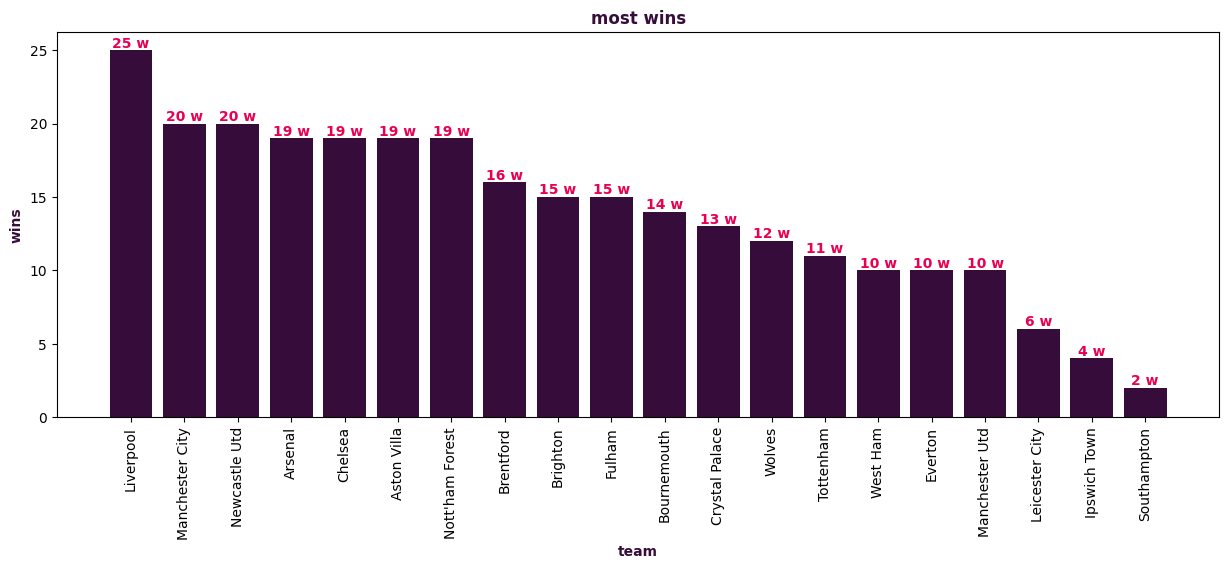

In [107]:
most_wins=pd.DataFrame(data_4[['team','win']])
most_wins=most_wins.sort_values('win',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(most_wins['team'], most_wins['win'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f w',fontweight='bold',color='#E90052')
plt.title('most wins',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('wins',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

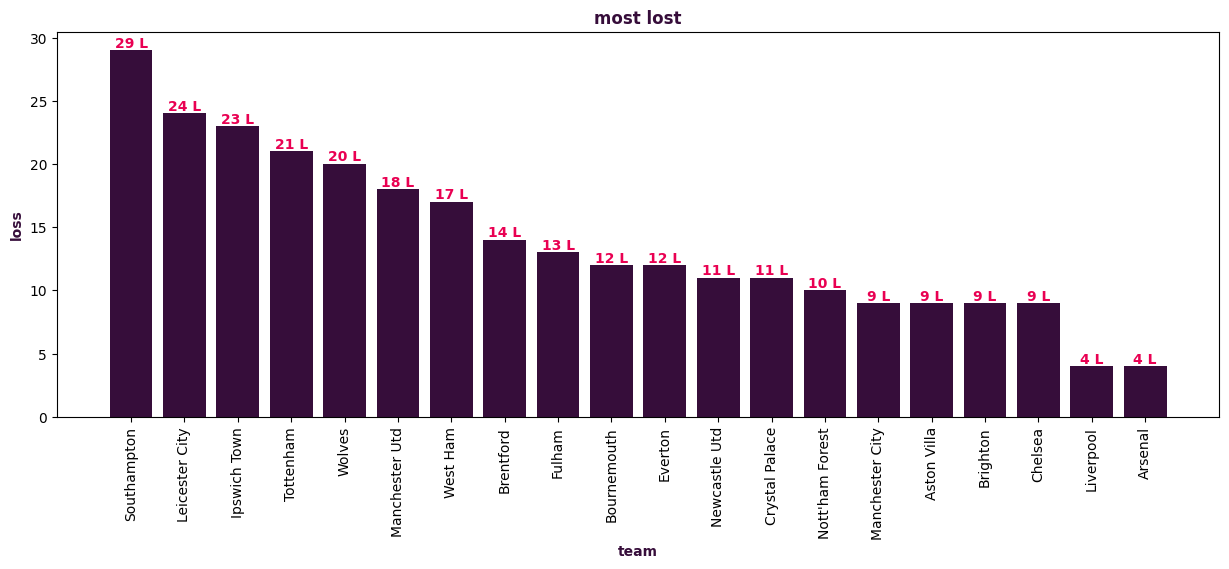

In [108]:
most_lost=pd.DataFrame(data_4[['team','loss']])
most_lost=most_lost.sort_values('loss',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(most_lost['team'], most_lost['loss'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f L',fontweight='bold',color='#E90052')
plt.title('most lost',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('loss',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

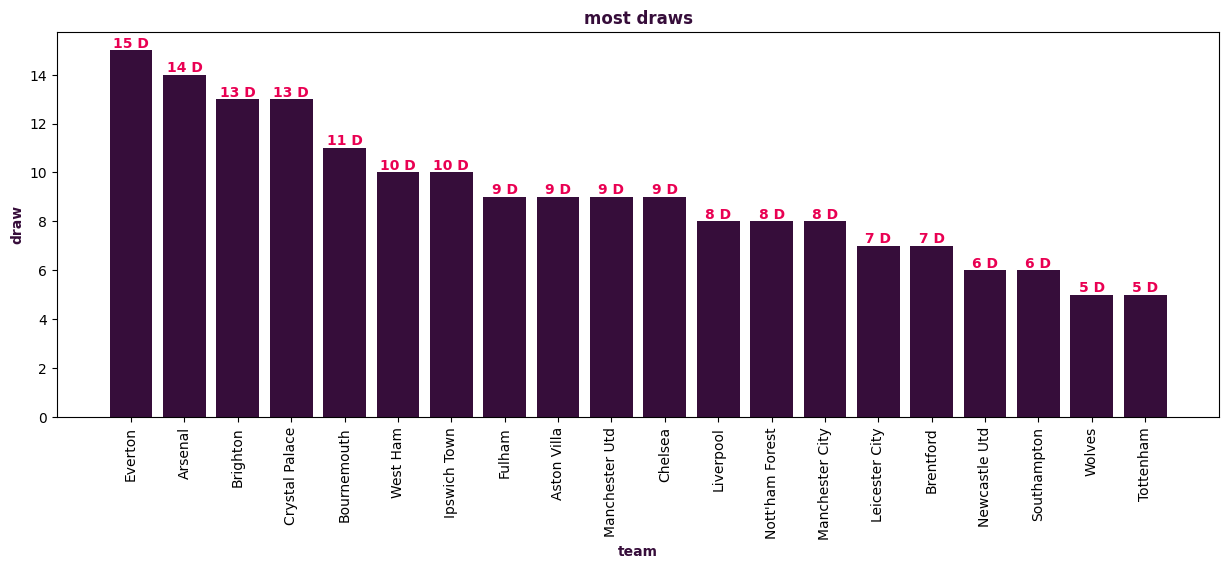

In [109]:
most_draws=pd.DataFrame(data_4[['team','draw']])
most_draws=most_draws.sort_values('draw',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(most_draws['team'], most_draws['draw'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f D',fontweight='bold',color='#E90052')
plt.title('most draws',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('draw',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

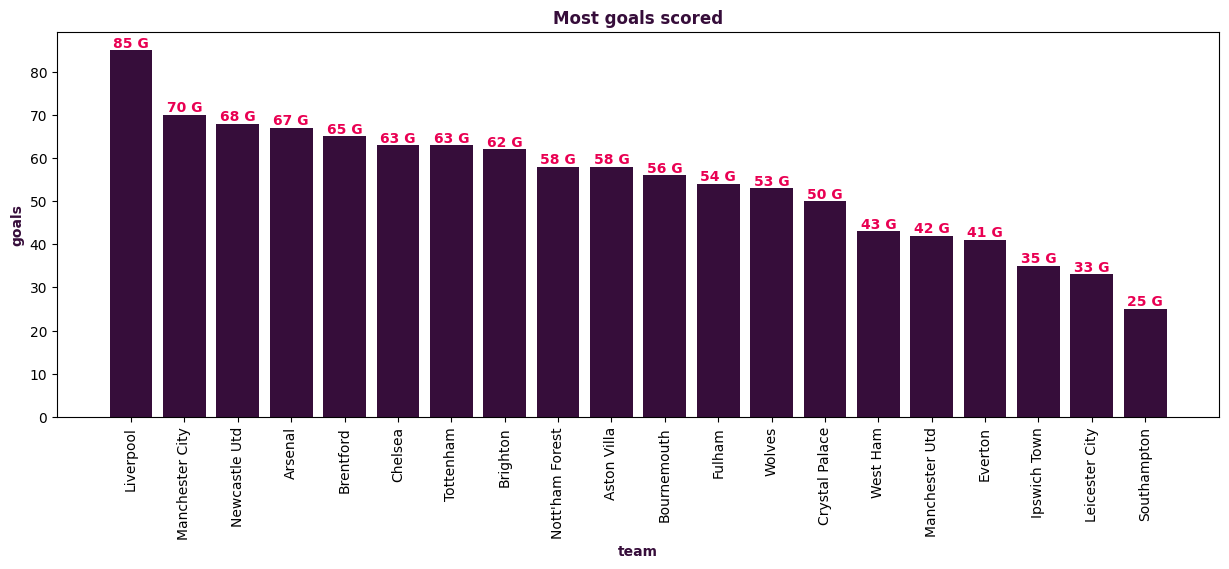

In [110]:

Most_goals_scored=pd.DataFrame(data_4[['team','goals']])
Most_goals_scored=Most_goals_scored.sort_values('goals',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Most_goals_scored['team'], Most_goals_scored['goals'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G',fontweight='bold',color='#E90052')
plt.title('Most goals scored',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

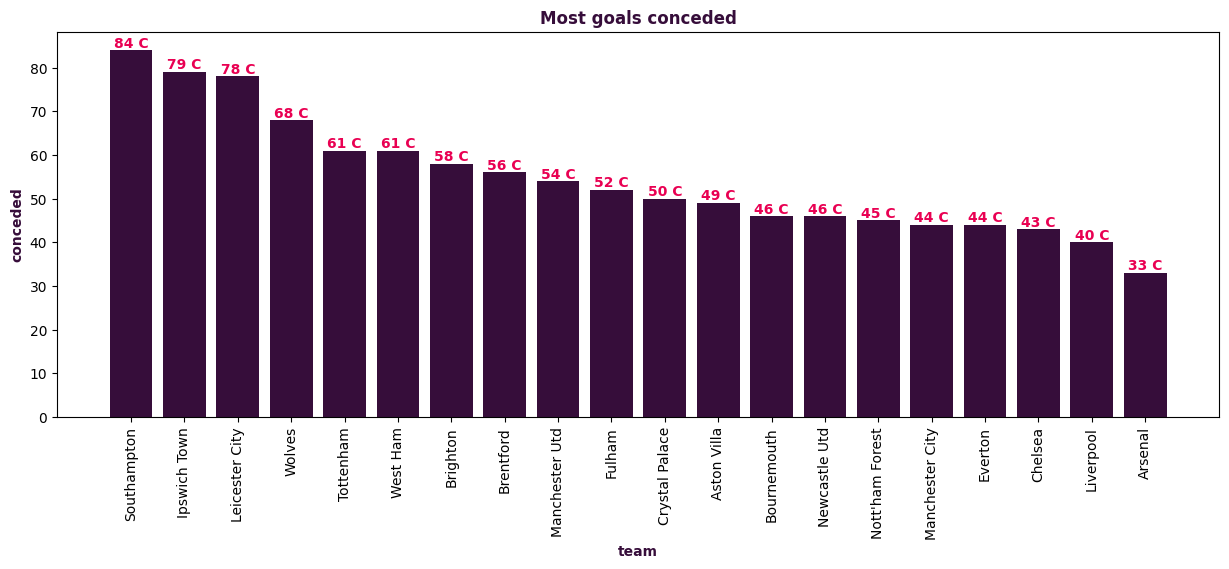

In [111]:
Most_goals_conceded=pd.DataFrame(data_4[['team','conceded']])
Most_goals_conceded=Most_goals_conceded.sort_values('conceded',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Most_goals_conceded['team'], Most_goals_conceded['conceded'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f C',fontweight='bold',color='#E90052')
plt.title('Most goals conceded',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('conceded',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

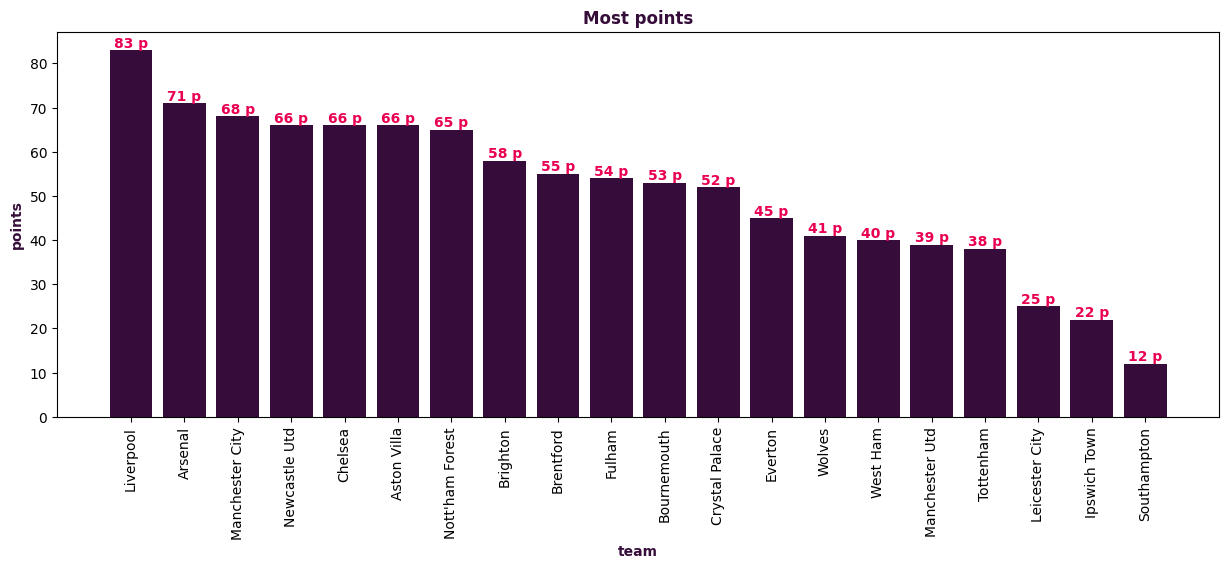

In [112]:
Most_points=pd.DataFrame(data_4[['team','points']])
Most_points=Most_points.sort_values('points',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Most_points['team'], Most_points['points'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f p',fontweight='bold',color='#E90052')
plt.title('Most points',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('points',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

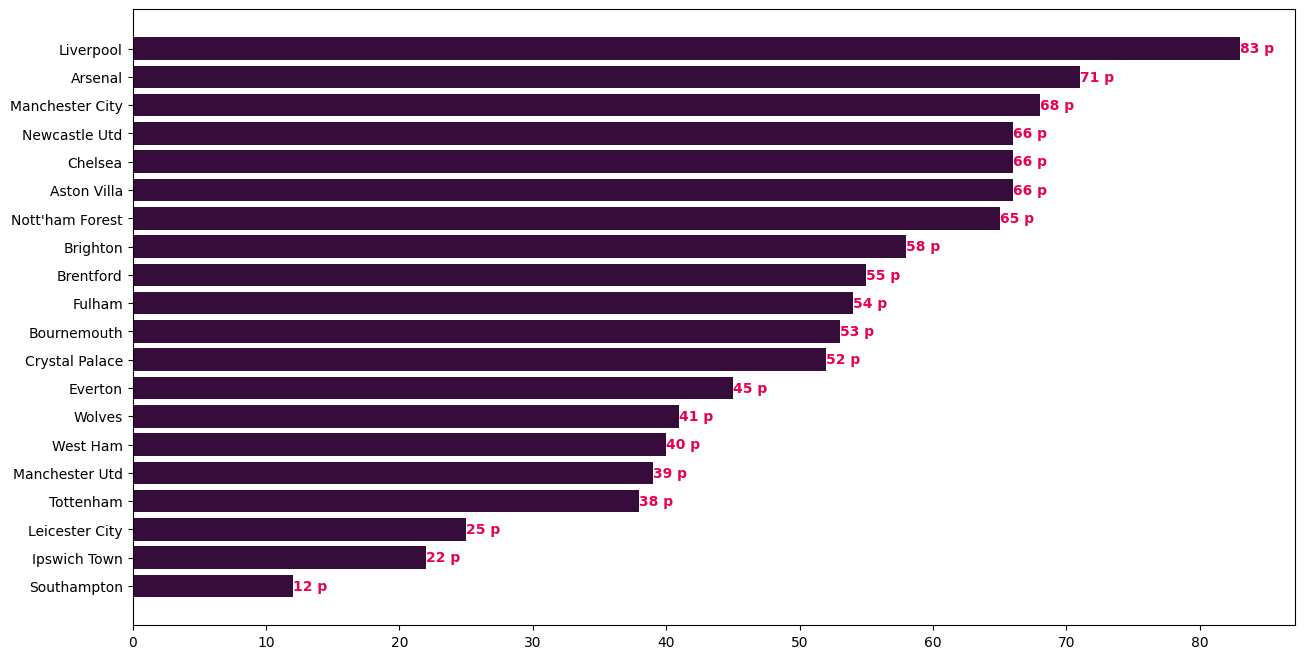

In [113]:
df_sorted = data_4.sort_values('rank',ascending=False) 
plt.figure(figsize=(15,8))
plt.barh(df_sorted['team'], df_sorted['points'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f p',fontweight='bold',color='#E90052')
plt.show()

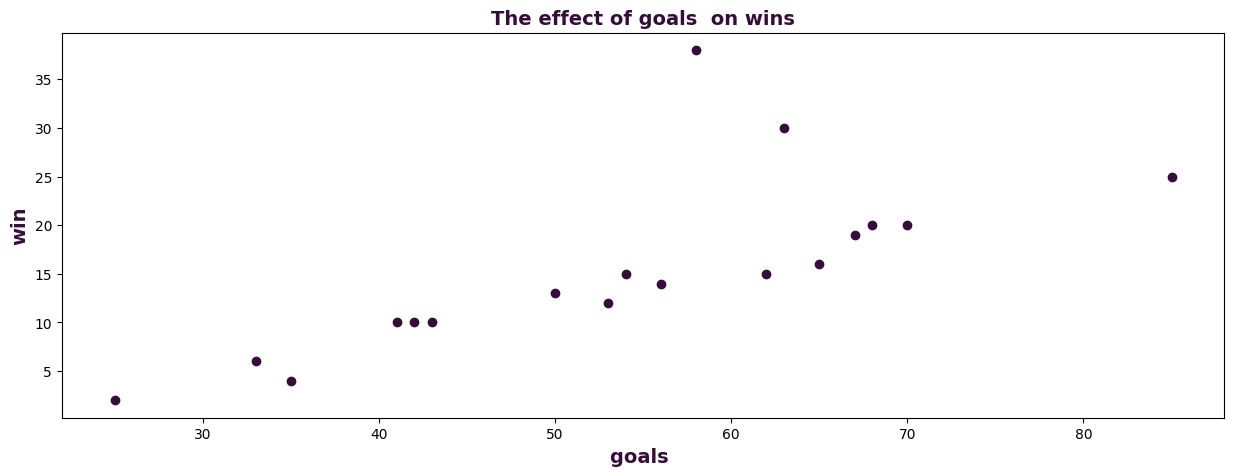

In [114]:
win_by_goals=pd.DataFrame(data_4.groupby('goals')['win'].sum())
win_by_goals=win_by_goals.sort_values('win',ascending=False)
win_by_goals.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(win_by_goals['goals'], win_by_goals['win'],c='#360D3A')
plt.title('The effect of goals  on wins', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('goals ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('win',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

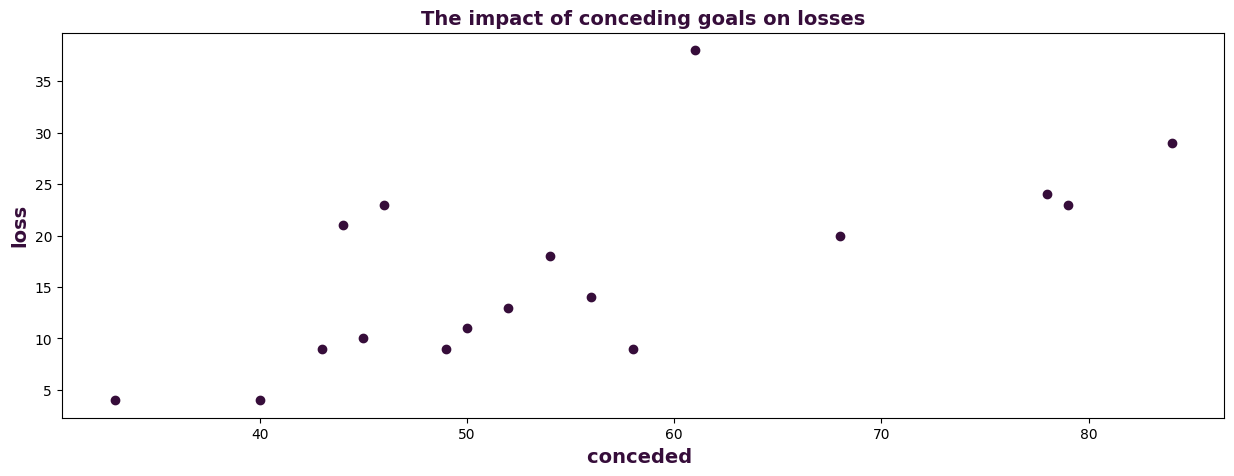

In [115]:
win_by_goals=pd.DataFrame(data_4.groupby('conceded')['loss'].sum())
win_by_goals=win_by_goals.sort_values('loss',ascending=False)
win_by_goals.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(win_by_goals['conceded'], win_by_goals['loss'],c='#360D3A')
plt.title('The impact of conceding goals on losses', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('conceded ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('loss',fontsize=14, fontweight='bold',color='#360D3A')
plt.show()

In [116]:
data_4.columns

Index(['rank', 'team', 'win', 'loss', 'draw', 'goals', 'conceded', 'points',
       'last5', 'top_scorer', 'keeper'],
      dtype='object')

* 'rank'     → المركز في الدوري (1 = الأول)
* 'team'     → اسم الفريق
* 'win'      → عدد الانتصارات
* 'loss'     → عدد الخسائر  
* 'draw'     → عدد التعادلات
* 'goals'    → الأهداف المسجلة (GF)
* 'conceded' → الأهداف المستقبلة (GA)
* 'points'   → النقاط الكلية
* 'last5'    → نتائج آخر 5 مباريات (WWDLW)
* 'top_scorer' → هداف الفريق
* 'keeper'   → حارس المرمى الأساسي


In [117]:
data_4

rank             team  win  loss  draw  goals  conceded  points  \
0      1        Liverpool   25     4     8     85        40      83   
1      2          Arsenal   19     4    14     67        33      71   
2      3  Manchester City   20     9     8     70        44      68   
3      4    Newcastle Utd   20    11     6     68        46      66   
4      5          Chelsea   19     9     9     63        43      66   
5      6      Aston Villa   19     9     9     58        49      66   
6      7  Nott'ham Forest   19    10     8     58        45      65   
7      8         Brighton   15     9    13     62        58      58   
8      9        Brentford   16    14     7     65        56      55   
9     10           Fulham   15    13     9     54        52      54   
10    11      Bournemouth   14    12    11     56        46      53   
11    12   Crystal Palace   13    11    13     50        50      52   
12    13          Everton   10    12    15     41        44      45   
13    14           Wolves   12    20     5     53        68      41   
14    15         West Ham   10    17    10     43        61      40   
15    16   Manchester Utd   10    18     9     42        54      39   
16    17        Tottenham   11    21     5     63        61      38   
17    18   Leicester City    6    24     7     33        78      25   
18    19     Ipswich Town    4    23    10     35        79      22   
19    20      Southampton    2    29     6     25        84      12   

        last5                      top_scorer             keeper  
0   W W L D L                   Mohamed Salah            Alisson  
1   W D L D W                     Kai Havertz         David Raya  
2   W W W D W                  Erling Haaland            Ederson  
3   L W D W L                  Alexander Isak          Nick Pope  
4   W W W L W                     Cole Palmer     Robert Sánchez  
5   W L W W W                   Ollie Watkins  Emiliano Martínez  
6   W L D D W                      Chris Wood          Matz Sels  
7   L W D W W  Kaoru Mitoma, Danny Welbeck...    Bart Verbruggen  
8   W W W W L       Yoane Wissa, Bryan Mbeumo       Mark Flekken  
9   L W L L W                    Raúl Jiménez         Bernd Leno  
10  D D W L L                 Justin Kluivert  Kepa Arrizabalaga  
11  D D D W W            Jean-Philippe Mateta     Dean Henderson  
12  L L D W W                   Iliman Ndiaye    Jordan Pickford  
13  W W L L L                   Matheus Cunha            José Sá  
14  D L D W L                    Jarrod Bowen    Alphonse Areola  
15  L D L L L                 Bruno Fernandes        André Onana  
16  L L D L L                 Brennan Johnson  Guglielmo Vicario  
17  L L W D W                     Jamie Vardy     Mads Hermansen  
18  L L D L L                      Liam Delap     Arijanet Muric  
19  D L L D L                    Paul Onuachu     Aaron Ramsdale

In [118]:
data_5=pd.read_csv('../team_salary.csv')

In [119]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   team     20 non-null     object
 1   players  20 non-null     int64 
 2   weekly   20 non-null     int64 
 3   annual   20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [120]:
data_5.describe()

players        weekly        annual
count  20.00000  2.000000e+01  2.000000e+01
mean   61.00000  2.451308e+06  1.274680e+08
std     6.30789  1.298511e+06  6.752255e+07
min    51.00000  8.833340e+05  4.593336e+07
25%    56.00000  1.561272e+06  8.118617e+07
50%    60.50000  1.823051e+06  9.479864e+07
75%    66.50000  2.913458e+06  1.514998e+08
max    71.00000  5.211401e+06  2.709929e+08

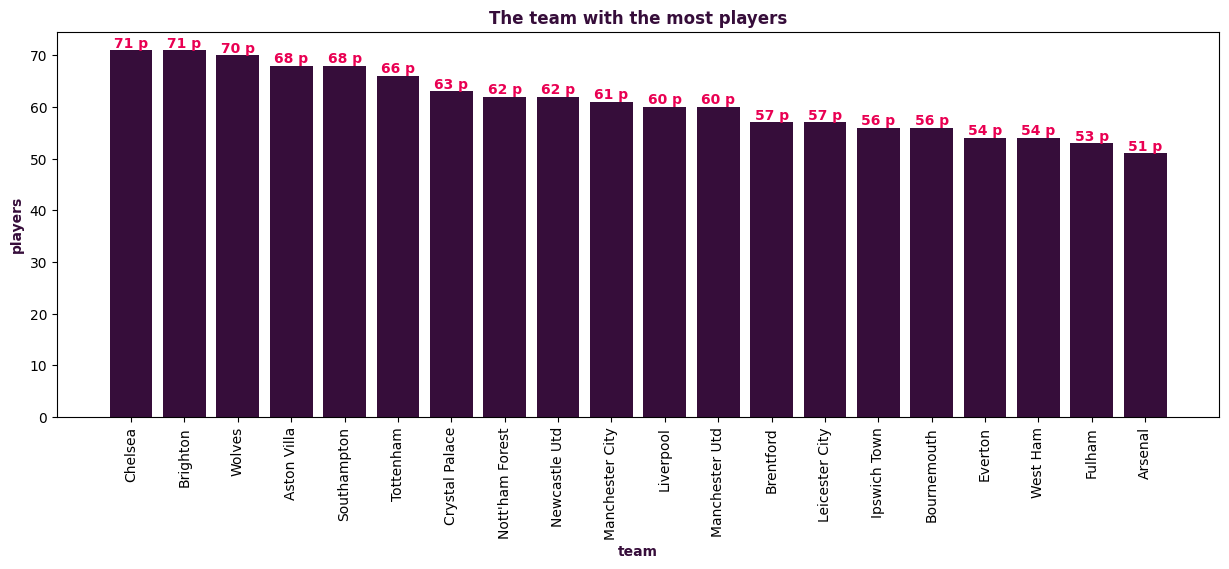

In [121]:
players=data_5.sort_values('players',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(players['team'],players['players'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f p',fontweight='bold',color='#E90052')
plt.title('The team with the most players',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('players',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

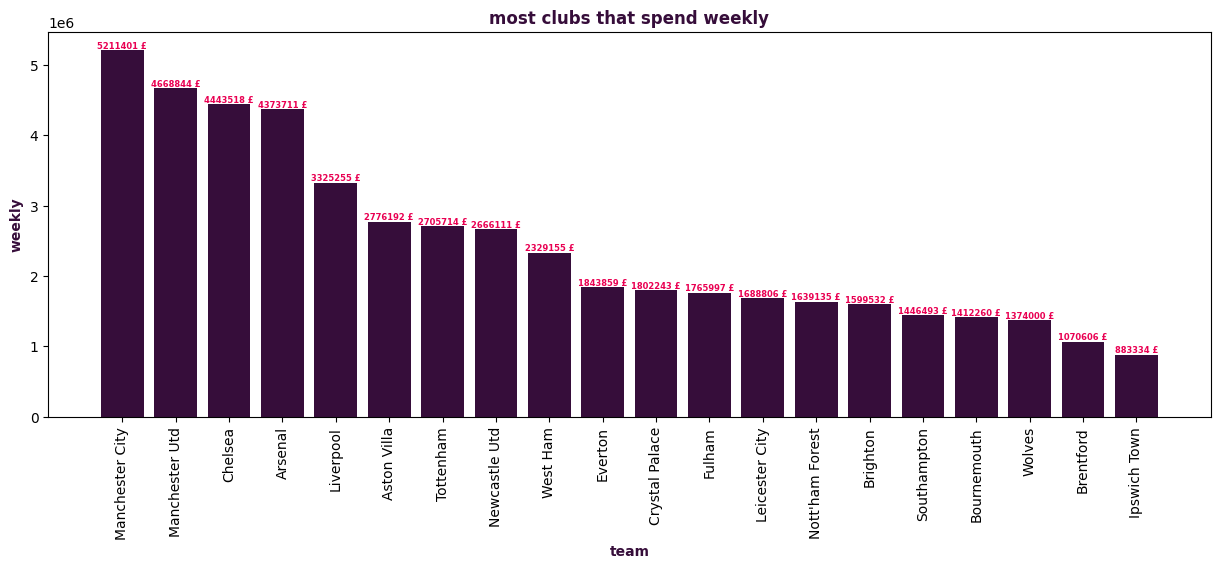

In [122]:
t_weekly=data_5.sort_values('weekly',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(t_weekly['team'],t_weekly['weekly'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £',fontweight='bold',fontsize=6,color='#E90052')
plt.title('most clubs that spend weekly',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('weekly',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

In [123]:
data_5.columns

Index(['team', 'players', 'weekly', 'annual'], dtype='object')

In [124]:
data_5

team  players   weekly     annual
0   Manchester City       61  5211401  270992872
1    Manchester Utd       60  4668844  242779887
2           Chelsea       71  4443518  231062958
3           Arsenal       51  4373711  227432965
4         Liverpool       60  3325255  172913278
5       Aston Villa       68  2776192  144361995
6         Tottenham       66  2705714  140697102
7     Newcastle Utd       62  2666111  138637776
8          West Ham       54  2329155  121116085
9           Everton       54  1843859   95880658
10   Crystal Palace       63  1802243   93716625
11           Fulham       53  1765997   91831819
12   Leicester City       57  1688806   87817887
13  Nott'ham Forest       62  1639135   85235009
14         Brighton       71  1599532   83175683
15      Southampton       68  1446493   75217626
16      Bournemouth       56  1412260   73437533
17           Wolves       70  1374000   71448017
18        Brentford       57  1070606   55671515
19     Ipswich Town       56   883334   45933362

In [125]:
data_6=pd.read_csv('../team_stats.csv')

In [126]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   20 non-null     object 
 1   players                20 non-null     int64  
 2   age                    20 non-null     float64
 3   possession             20 non-null     float64
 4   goals                  20 non-null     int64  
 5   assists                20 non-null     int64  
 6   penalty_kicks          20 non-null     int64  
 7   penalty_kick_attempts  20 non-null     int64  
 8   yellows                20 non-null     int64  
 9   reds                   20 non-null     int64  
 10  expected_goals         20 non-null     float64
 11  expected_assists       20 non-null     float64
 12  progressive_carries    20 non-null     int64  
 13  progressive_passes     20 non-null     int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 2.3+ KB


In [127]:
data_6.describe()

players        age  possession      goals    assists  penalty_kicks  \
count  20.000000  20.000000   20.000000  20.000000  20.000000      20.000000   
mean   28.550000  27.070000   50.000000  52.900000  39.350000       3.250000   
std     3.284333   1.188586    5.954565  14.541773  11.961671       2.124419   
min    23.000000  24.500000   40.500000  24.000000  15.000000       0.000000   
25%    26.000000  26.250000   47.250000  40.000000  27.500000       2.000000   
50%    29.000000  27.000000   49.850000  55.500000  41.500000       3.000000   
75%    31.000000  27.850000   53.700000  61.000000  46.250000       4.250000   
max    36.000000  29.000000   61.600000  84.000000  64.000000       9.000000   

       penalty_kick_attempts    yellows       reds  expected_goals  \
count              20.000000  20.000000  20.000000       20.000000   
mean                3.950000  78.550000   2.500000       52.435000   
std                 2.163696  11.217819   1.395481       12.599343   
min                 0.000000  59.000000   0.000000       32.000000   
25%                 2.750000  69.750000   2.000000       43.875000   
50%                 3.000000  79.000000   2.000000       56.100000   
75%                 6.000000  85.750000   3.000000       59.625000   
max                 9.000000  99.000000   6.000000       80.000000   

       expected_assists  progressive_carries  progressive_passes  
count         20.000000            20.000000           20.000000  
mean          39.210000           693.450000         1366.150000  
std            9.459159           154.952106          283.738997  
min           23.700000           474.000000          896.000000  
25%           32.775000           585.000000         1133.500000  
50%           40.500000           689.000000         1352.500000  
75%           43.575000           798.750000         1549.000000  
max           59.600000          1112.000000         1890.000000

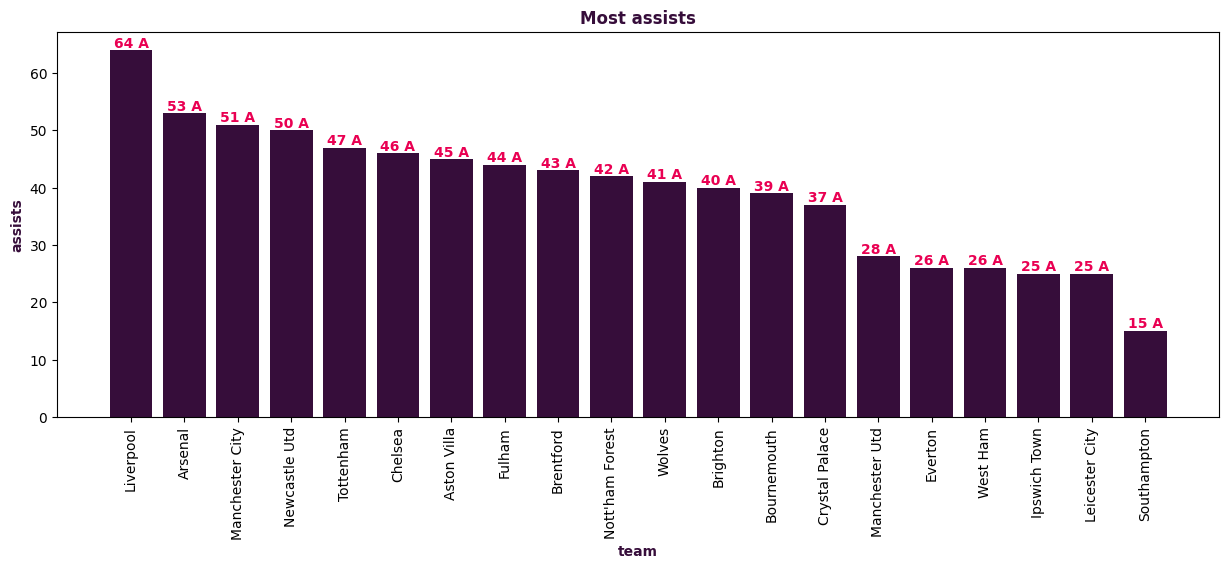

In [128]:

Team_Most_assists=pd.DataFrame(data_6[['team','assists']])
Team_Most_assists=Team_Most_assists.sort_values('assists',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_assists['team'], Team_Most_assists['assists'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f A',fontweight='bold',color='#E90052')
plt.title('Most assists',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('assists',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

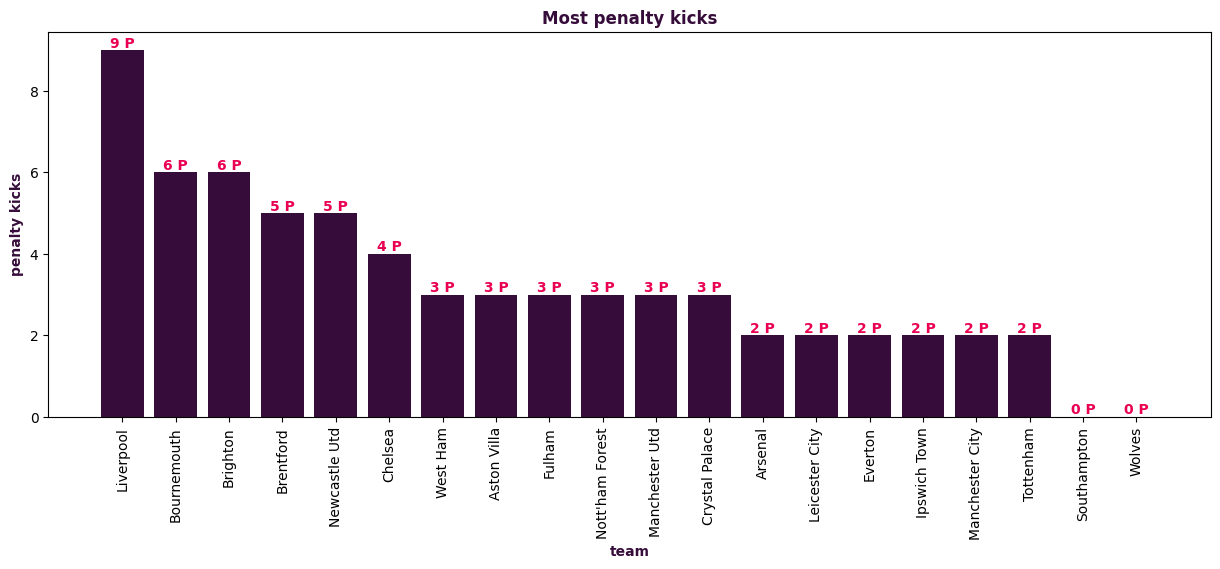

In [129]:
Team_Most_penalty_kicks=pd.DataFrame(data_6[['team','penalty_kicks']])
Team_Most_penalty_kicks=Team_Most_penalty_kicks.sort_values('penalty_kicks',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_penalty_kicks['team'], Team_Most_penalty_kicks['penalty_kicks'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f P',fontweight='bold',color='#E90052')
plt.title('Most penalty kicks',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('penalty kicks',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

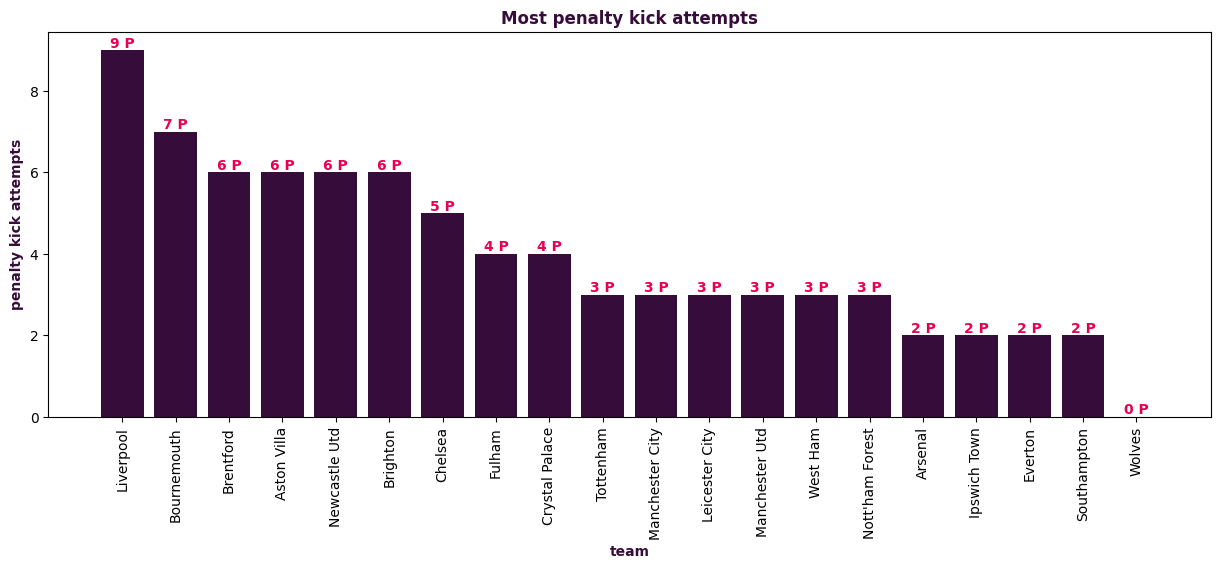

In [130]:
Team_Most_penalty_kick_attempts=pd.DataFrame(data_6[['team','penalty_kick_attempts']])
Team_Most_penalty_kick_attempts=Team_Most_penalty_kick_attempts.sort_values('penalty_kick_attempts',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_penalty_kick_attempts['team'], Team_Most_penalty_kick_attempts['penalty_kick_attempts'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f P',fontweight='bold',color='#E90052')
plt.title('Most penalty kick attempts',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('penalty kick attempts',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

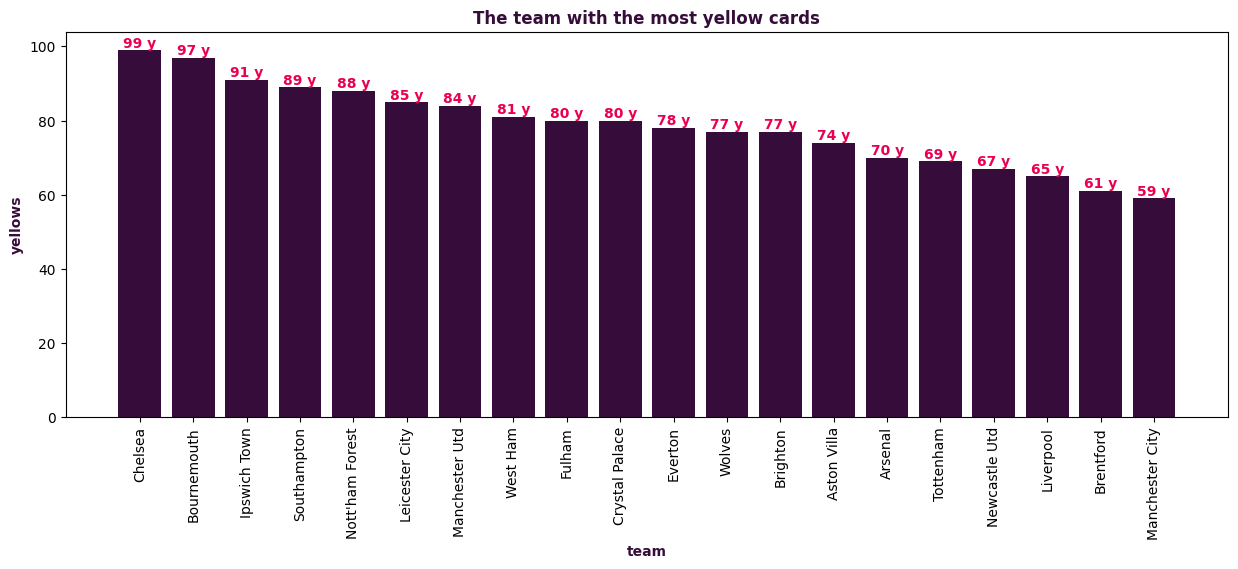

In [131]:
Team_Most_yellows=pd.DataFrame(data_6[['team','yellows']])
Team_Most_yellows=Team_Most_yellows.sort_values('yellows',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_yellows['team'], Team_Most_yellows['yellows'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f y',fontweight='bold',color='#E90052')
plt.title('The team with the most yellow cards',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('yellows',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

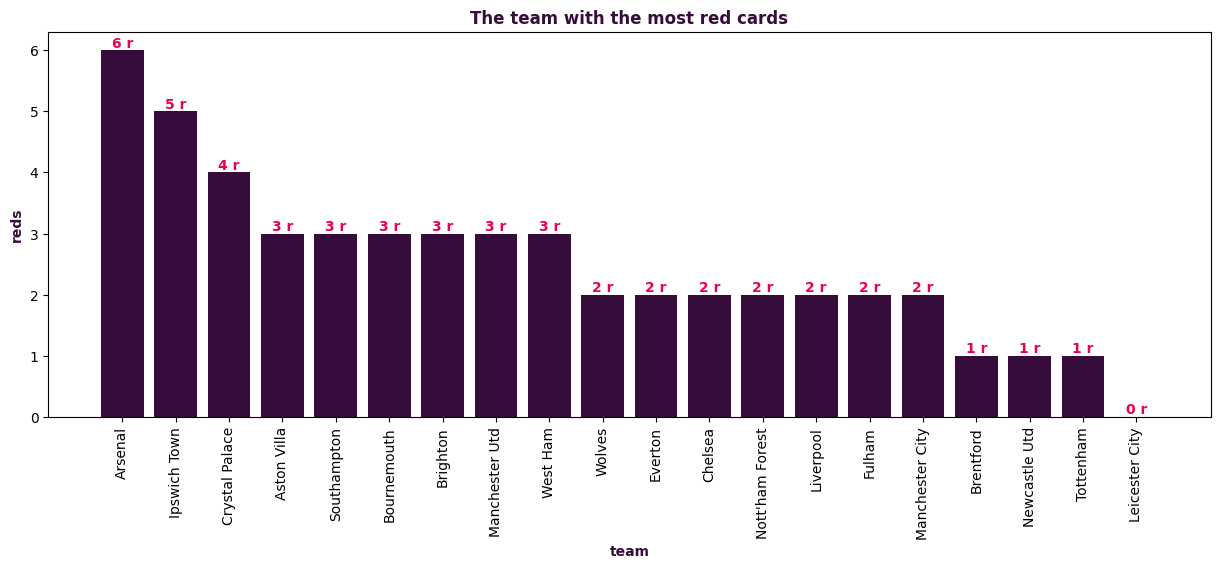

In [132]:
Team_Most_reds=pd.DataFrame(data_6[['team','reds']])
Team_Most_reds=Team_Most_reds.sort_values('reds',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_reds['team'], Team_Most_reds['reds'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f r',fontweight='bold',color='#E90052')
plt.title('The team with the most red cards',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('reds',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

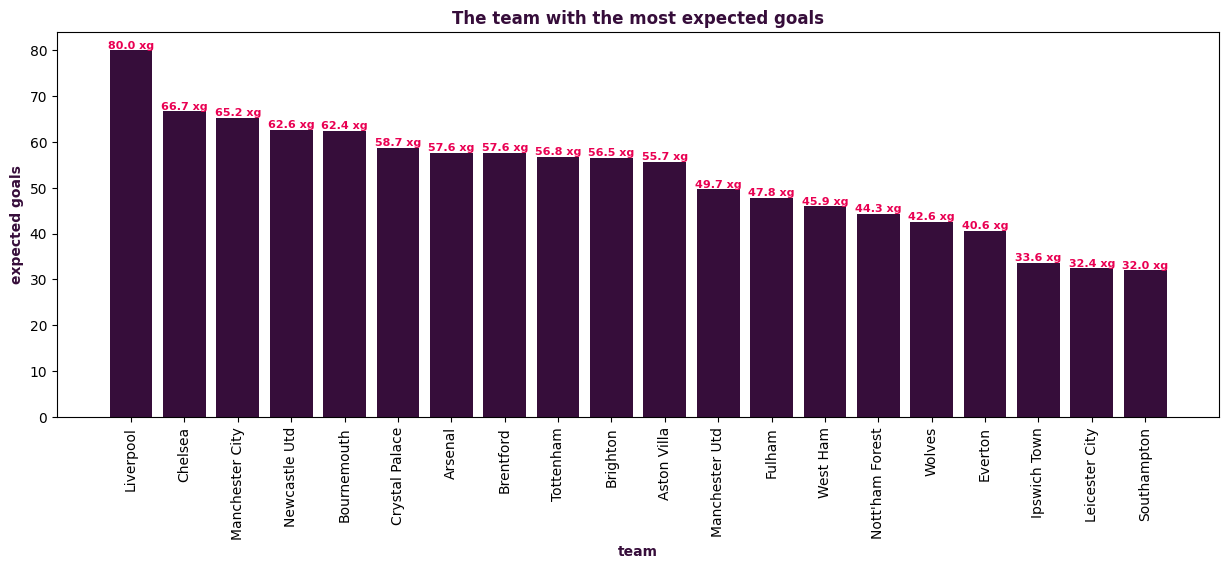

In [133]:
Team_Most_expected_goals=pd.DataFrame(data_6[['team','expected_goals']])
Team_Most_expected_goals=Team_Most_expected_goals.sort_values('expected_goals',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_expected_goals['team'], Team_Most_expected_goals['expected_goals'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.1f xg',fontweight='bold',fontsize=8,color='#E90052')
plt.title('The team with the most expected goals',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('expected goals',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

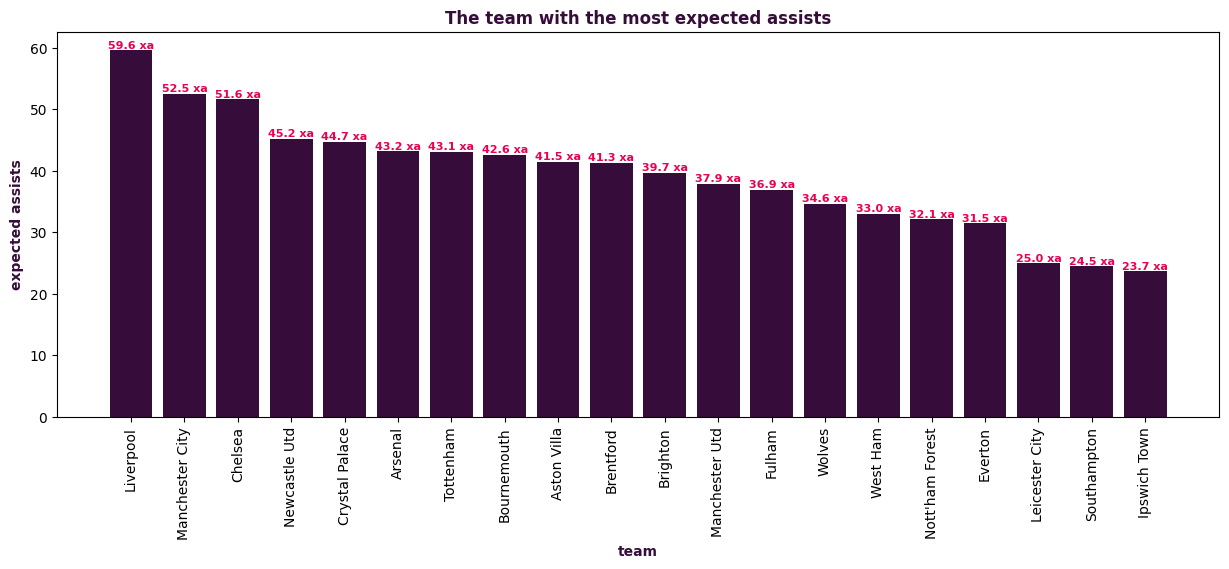

In [134]:
Team_Most_expected_assists=pd.DataFrame(data_6[['team','expected_assists']])
Team_Most_expected_assists=Team_Most_expected_assists.sort_values('expected_assists',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_expected_assists['team'], Team_Most_expected_assists['expected_assists'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.1f xa',fontweight='bold',fontsize=8,color='#E90052')
plt.title('The team with the most expected assists',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('expected assists',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

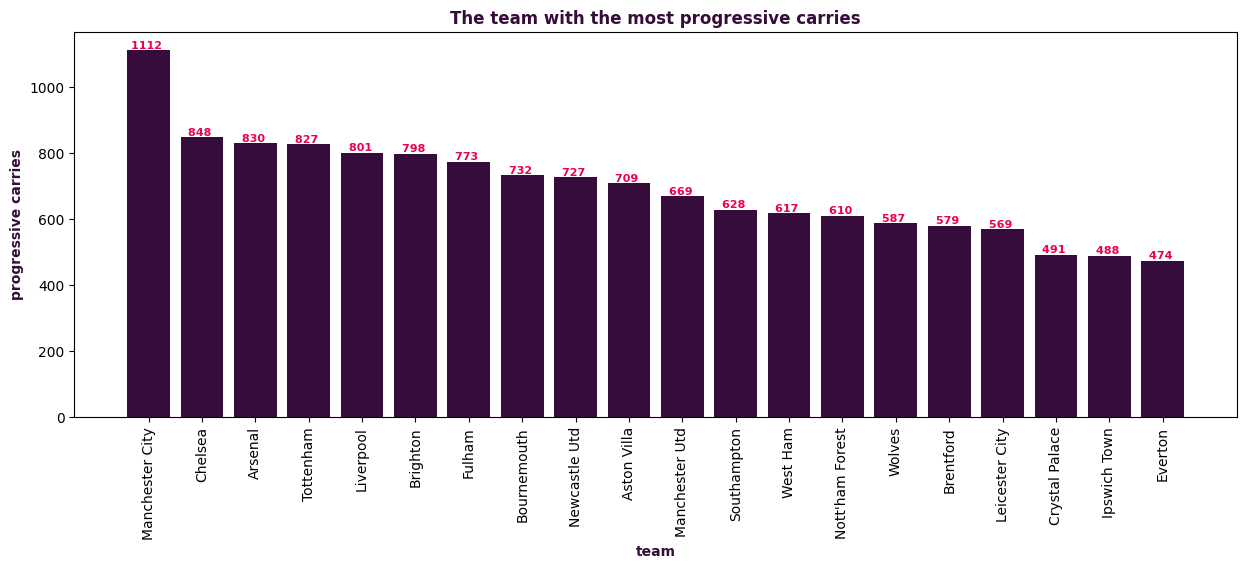

In [135]:
Team_Most_progressive_carries=pd.DataFrame(data_6[['team','progressive_carries']])
Team_Most_progressive_carries=Team_Most_progressive_carries.sort_values('progressive_carries',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_progressive_carries['team'], Team_Most_progressive_carries['progressive_carries'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',fontsize=8,color='#E90052')
plt.title('The team with the most progressive carries',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('progressive carries',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

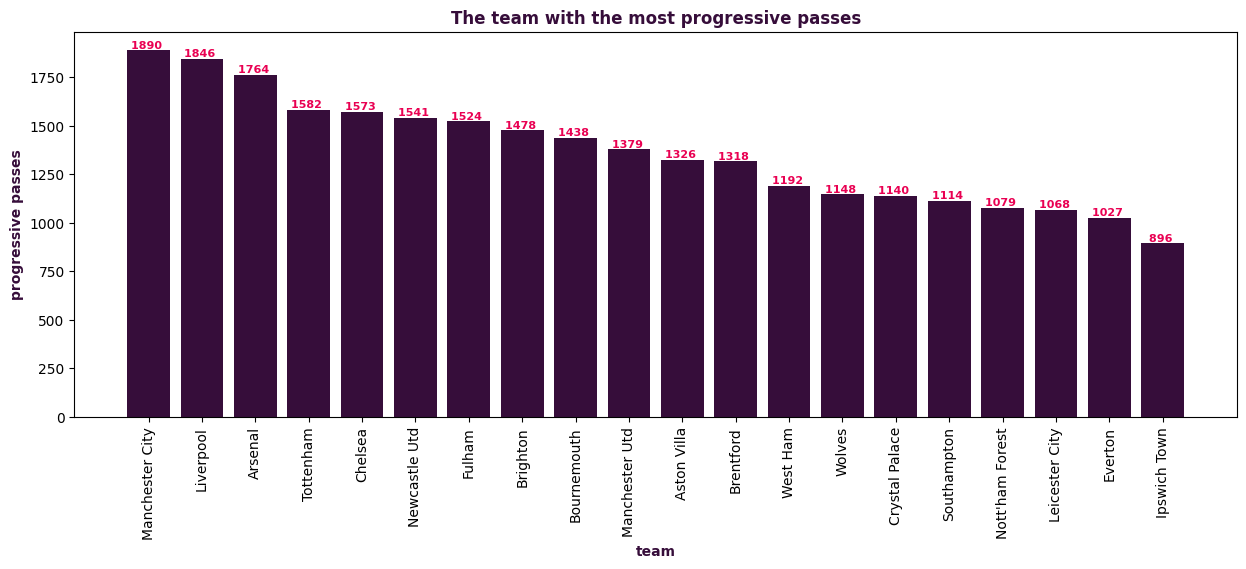

In [136]:
Team_Most_progressive_passes=pd.DataFrame(data_6[['team','progressive_passes']])
Team_Most_progressive_passes=Team_Most_progressive_passes.sort_values('progressive_passes',ascending=False)
plt.figure(figsize=[15,5])
plt.bar(Team_Most_progressive_passes['team'], Team_Most_progressive_passes['progressive_passes'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f ',fontweight='bold',fontsize=8,color='#E90052')
plt.title('The team with the most progressive passes',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('progressive passes',fontweight='bold',color='#360D3A')
plt.xticks(rotation=90)
plt.show()

In [137]:
data_6.columns

Index(['team', 'players', 'age', 'possession', 'goals', 'assists',
       'penalty_kicks', 'penalty_kick_attempts', 'yellows', 'reds',
       'expected_goals', 'expected_assists', 'progressive_carries',
       'progressive_passes'],
      dtype='object')

In [138]:
data_6

team  players   age  possession  goals  assists  penalty_kicks  \
0           Arsenal       25  26.6        56.8     65       53              2   
1       Aston Villa       28  27.8        51.0     56       45              3   
2       Bournemouth       29  25.9        48.1     55       39              6   
3         Brentford       28  26.6        47.8     64       43              5   
4          Brighton       32  25.7        52.0     60       40              6   
5           Chelsea       29  24.5        57.3     60       46              4   
6    Crystal Palace       29  27.0        43.1     48       37              3   
7           Everton       26  28.8        41.1     38       26              2   
8            Fulham       26  28.8        52.4     53       44              3   
9      Ipswich Town       32  26.6        40.5     34       25              2   
10   Leicester City       31  27.4        45.6     33       25              2   
11        Liverpool       24  28.0        57.4     84       64              9   
12  Manchester City       29  27.6        61.6     69       51              2   
13   Manchester Utd       31  26.3        53.2     40       28              3   
14    Newcastle Utd       24  28.2        50.9     66       50              5   
15  Nott'ham Forest       23  27.0        40.9     57       42              3   
16      Southampton       36  26.1        48.8     24       15              0   
17        Tottenham       31  25.8        55.2     60       47              2   
18         West Ham       27  29.0        48.2     40       26              3   
19           Wolves       31  27.7        48.1     52       41              0   

    penalty_kick_attempts  yellows  reds  expected_goals  expected_assists  \
0                       2       70     6            57.6              43.2   
1                       6       74     3            55.7              41.5   
2                       7       97     3            62.4              42.6   
3                       6       61     1            57.6              41.3   
4                       6       77     3            56.5              39.7   
5                       5       99     2            66.7              51.6   
6                       4       80     4            58.7              44.7   
7                       2       78     2            40.6              31.5   
8                       4       80     2            47.8              36.9   
9                       2       91     5            33.6              23.7   
10                      3       85     0            32.4              25.0   
11                      9       65     2            80.0              59.6   
12                      3       59     2            65.2              52.5   
13                      3       84     3            49.7              37.9   
14                      6       67     1            62.6              45.2   
15                      3       88     2            44.3              32.1   
16                      2       89     3            32.0              24.5   
17                      3       69     1            56.8              43.1   
18                      3       81     3            45.9              33.0   
19                      0       77     2            42.6              34.6   

    progressive_carries  progressive_passes  
0                   830                1764  
1                   709                1326  
2                   732                1438  
3                   579                1318  
4                   798                1478  
5                   848                1573  
6                   491                1140  
7                   474                1027  
8                   773                1524  
9                   488                 896  
10                  569                1068  
11                  801                1846  
12                 1112                1890  
13                  669       

In [139]:
data.columns,data_1.columns,data_2.columns,data_3.columns,data_4.columns,data_5.columns,data_6.columns

(Index(['week', 'Day', 'Date', 'Time', 'Home', 'HomeScore', 'Away', 'AwayScore',
        'Attendance', 'Venue', 'Referee', 'Score', 'Totale_Goals',
        'Time_of_the_day'],
       dtype='object'),
 Index(['player', 'nation', 'position', 'team', 'age', '90s', 'touches',
        'deffensive_touches', 'middle_touches', 'attacking_touches',
        'attempted_take_ons', 'successful_take_ons', 'takeons_tackled',
        'carries', 'total_distance_carried', 'received', 'dribble_rate'],
       dtype='object'),
 Index(['Player', 'Nation', 'Position', 'Team', 'Age', 'Weekly', 'Annual'], dtype='object'),
 Index(['name', 'nation', 'position', 'team', 'age', 'born', 'played', 'starts',
        'minutes', 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts',
        'yellow', 'red', 'expected_goals', 'progressive_carries',
        'progressive_passes', 'received_progressive_passes'],
       dtype='object'),
 Index(['rank', 'team', 'win', 'loss', 'draw', 'goals', 'conceded', 'points',
   

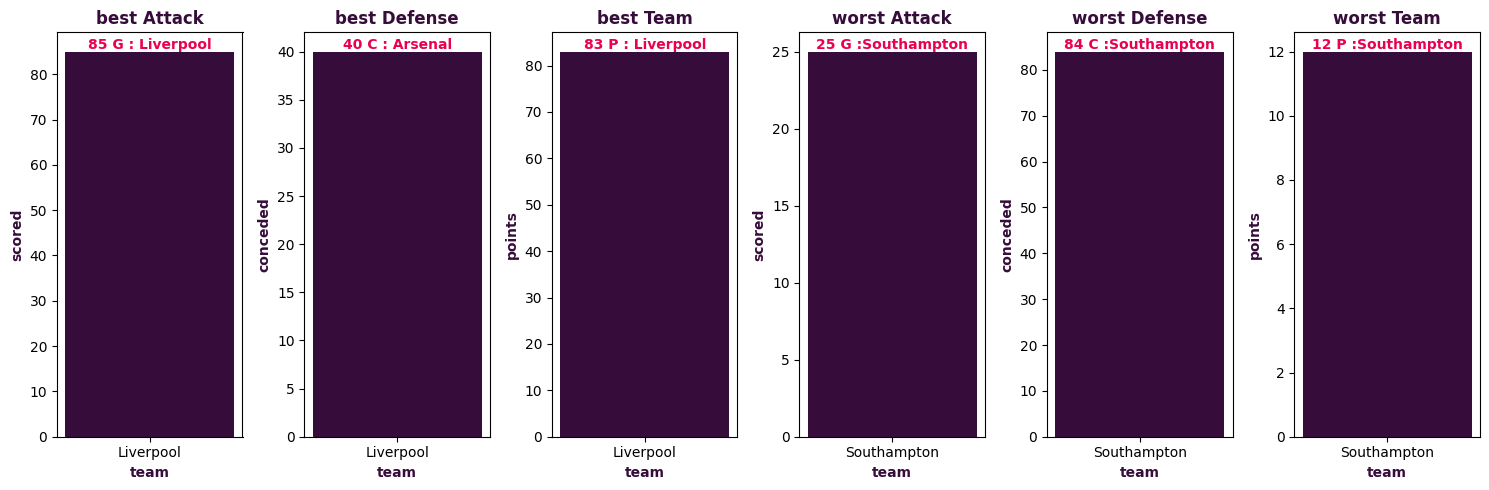

In [140]:
plt.figure(figsize=[15,5])
plt.subplot(1,6,1)
plt.bar(Most_goals_scored.loc[0,['team']], Most_goals_scored.loc[0,['goals']],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G : Liverpool',fontweight='bold',color='#E90052')
plt.title('best Attack',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('scored',fontweight='bold',color='#360D3A')
plt.subplot(1,6,2)
Most_goals_conceded=Most_goals_conceded.sort_values('conceded',ascending=True)
plt.bar(Most_goals_conceded.loc[0,['team']], Most_goals_conceded.loc[0,['conceded']],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f C : Arsenal',fontweight='bold',color='#E90052')
plt.title('best Defense',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('conceded',fontweight='bold',color='#360D3A')
plt.subplot(1,6,3)
plt.bar(df_sorted.loc[0,['team']], df_sorted.loc[0,['points']],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f P : Liverpool',fontweight='bold',color='#E90052')
plt.title('best Team',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('points',fontweight='bold',color='#360D3A')
plt.subplot(1,6,4)
plt.bar(Most_goals_scored.iloc[-1]['team'], Most_goals_scored.iloc[-1]['goals'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f G :Southampton',fontweight='bold',color='#E90052')
plt.title('worst Attack',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('scored',fontweight='bold',color='#360D3A')
plt.subplot(1,6,5)
Most_goals_conceded=Most_goals_conceded.sort_values('conceded',ascending=True)
plt.bar(Most_goals_conceded.iloc[-1]['team'], Most_goals_conceded.iloc[-1]['conceded'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f C :Southampton',fontweight='bold',color='#E90052')
plt.title('worst Defense',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('conceded',fontweight='bold',color='#360D3A')
plt.subplot(1,6,6)
plt.bar(df_sorted.iloc[0]['team'], df_sorted.iloc[0]['points'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f P :Southampton',fontweight='bold',color='#E90052')
plt.title('worst Team',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('points',fontweight='bold',color='#360D3A')
plt.tight_layout()
plt.show()

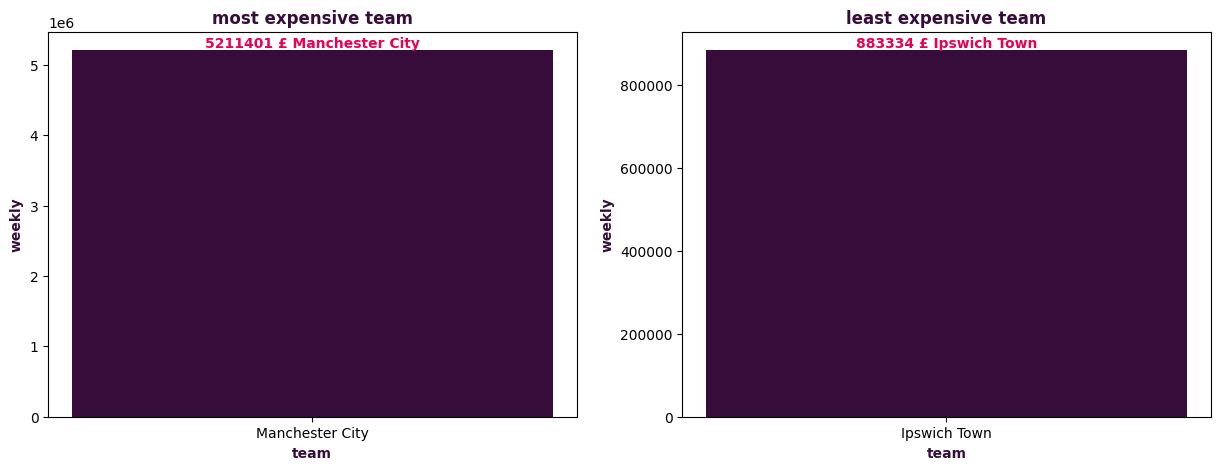

In [141]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.bar(t_weekly.loc[0,['team']],t_weekly.loc[0,['weekly']],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £ Manchester City',fontweight='bold',color='#E90052')
plt.title('most expensive team',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('weekly',fontweight='bold',color='#360D3A')
plt.subplot(1,2,2)
plt.bar(t_weekly.iloc[-1]['team'],t_weekly.iloc[-1]['weekly'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f £ Ipswich Town',fontweight='bold',color='#E90052')
plt.title('least expensive team',fontweight='bold',color='#360D3A')
plt.xlabel('team',fontweight='bold',color='#360D3A')
plt.ylabel('weekly',fontweight='bold',color='#360D3A')
plt.show()

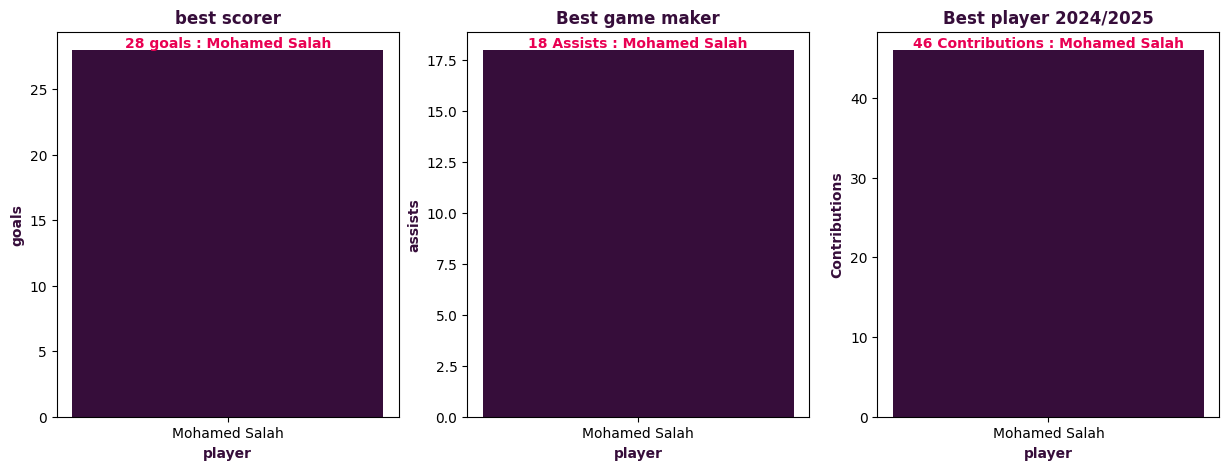

In [142]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.bar(goals['name'].head(1), goals['goals'].head(1),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f goals : Mohamed Salah',fontweight='bold',color='#E90052')
plt.title('best scorer',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('goals',fontweight='bold',color='#360D3A')
plt.subplot(1,3,2)
plt.bar(assists['name'].head(1), assists['assists'].head(1),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f Assists : Mohamed Salah',fontweight='bold',color='#E90052')
plt.title('Best game maker',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('assists',fontweight='bold',color='#360D3A')
plt.subplot(1,3,3)
plt.bar(assists['name'].head(1), assists['assists'].head(1)+goals['goals'].head(1),color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.0f Contributions : Mohamed Salah',fontweight='bold',color='#E90052')
plt.title('Best player 2024/2025',fontweight='bold',color='#360D3A')
plt.xlabel('player',fontweight='bold',color='#360D3A')
plt.ylabel('Contributions',fontweight='bold',color='#360D3A')
plt.show()

In [143]:
data_3

name         nation position            team   age  \
0             Max Aarons        England       DF     Bournemouth  25.0   
1      Joshua Acheampong        England       DF         Chelsea  19.0   
2            Tyler Adams  United States       MF     Bournemouth  26.0   
3       Tosin Adarabioyo        England       DF         Chelsea  27.0   
4          Simon Adingra   Cote dIvoire    FW,MF        Brighton  23.0   
..                   ...            ...      ...             ...   ...   
566         Ashley Young        England       DF         Everton  39.0   
567       Illia Zabarnyi        Ukraine       DF     Bournemouth  22.0   
568  Oleksandr Zinchenko        Ukraine    DF,MF         Arsenal  28.0   
569       Joshua Zirkzee    Netherlands    FW,MF  Manchester Utd  24.0   
570      Martin Ødegaard         Norway       MF         Arsenal  26.0   

       born  played  starts  minutes  goals  assists  penalty_kicks  \
0    2000.0       3       1       86      0        0              0   
1    2006.0       4       2      170      0        0              0   
2    1999.0      27      20     1875      0        3              0   
3    1997.0      21      14     1319      1        1              0   
4    2002.0      28      11     1052      2        2              0   
..      ...     ...     ...      ...    ...      ...            ...   
566  1985.0      31      18     1785      1        3              0   
567  2002.0      35      34     3019      0        0              0   
568  1996.0      14       4      458      0        1              0   
569  2001.0      32      14     1402      3        1              0   
570  1998.0      29      26     2309      2        8              1   

     penalty_kick_attempts  yellow  red  expected_goals  progressive_carries  \
0                        0       0    0             0.0                    1   
1                        0       1    0             0.2                    0   
2                        0       7    0             1.6                   13   
3                        0       3    0             0.9                    5   
4                        0       0    0             2.4                   50   
..                     ...     ...  ...             ...                  ...   
566                      0       6    1             0.3                   23   
567                      0       4    1             1.1                   26   
568                      0       1    0             0.3                   10   
569                      0       2    0             4.8                   14   
570                      1       4    0             4.7                   91   

     progressive_passes  received_progressive_passes  
0                     8                            3  
1                     8                            0  
2                    71                           10  
3                    39                            1  
4                    18                          128  
..                  ...                          ...  
566                  89                           32  
567                 134                            4  
568                  37                           12  
569                  44                           69  
570                 255                          151  

[571 rows x 19 columns]

In [144]:
#اختلاف في أسماء اللاعبين: نحلها بتوحيد الأسماء (strip لإزالة المسافات الزائدة + تحويل لأحرف صغيرة lower)
data_3['name'] = data_3['name'].str.strip().str.lower()
data_2['Player'] = data_2['Player'].str.strip().str.lower()

data_3['team'] = data_3['team'].str.strip().str.lower()
data_2['Team'] = data_2['Team'].str.strip().str.lower()

In [145]:
merged_df = pd.merge(
    left=data_3[['name', 'nation', 'position', 'team', 'age', 'born', 'played', 'starts', 'minutes', 
                 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts', 'yellow', 'red', 
                 'expected_goals', 'progressive_carries', 'progressive_passes', 
                 'received_progressive_passes']],
    right=data_2[['Player', 'Nation', 'Position', 'Team', 'Age', 'Weekly', 'Annual']],
    left_on=['name', 'team'],   # المفتاح في data_3
    right_on=['Player', 'Team'],  # المفتاح في data_2
    how='left'  # left: احتفظ بكل من data_3
)

In [146]:
merged_df

name         nation position            team   age  \
0             max aarons        England       DF     bournemouth  25.0   
1      joshua acheampong        England       DF         chelsea  19.0   
2            tyler adams  United States       MF     bournemouth  26.0   
3       tosin adarabioyo        England       DF         chelsea  27.0   
4          simon adingra   Cote dIvoire    FW,MF        brighton  23.0   
..                   ...            ...      ...             ...   ...   
566         ashley young        England       DF         everton  39.0   
567       illia zabarnyi        Ukraine       DF     bournemouth  22.0   
568  oleksandr zinchenko        Ukraine    DF,MF         arsenal  28.0   
569       joshua zirkzee    Netherlands    FW,MF  manchester utd  24.0   
570      martin ødegaard         Norway       MF         arsenal  26.0   

       born  played  starts  minutes  goals  ...  progressive_carries  \
0    2000.0       3       1       86      0  ...                    1   
1    2006.0       4       2      170      0  ...                    0   
2    1999.0      27      20     1875      0  ...                   13   
3    1997.0      21      14     1319      1  ...                    5   
4    2002.0      28      11     1052      2  ...                   50   
..      ...     ...     ...      ...    ...  ...                  ...   
566  1985.0      31      18     1785      1  ...                   23   
567  2002.0      35      34     3019      0  ...                   26   
568  1996.0      14       4      458      0  ...                   10   
569  2001.0      32      14     1402      3  ...                   14   
570  1998.0      29      26     2309      2  ...                   91   

     progressive_passes  received_progressive_passes               Player  \
0                     8                            3           max aarons   
1                     8                            0                  NaN   
2                    71                           10          tyler adams   
3                    39                            1     tosin adarabioyo   
4                    18                          128        simon adingra   
..                  ...                          ...                  ...   
566                  89                           32         ashley young   
567                 134                            4                  NaN   
568                  37                           12  oleksandr zinchenko   
569                  44                           69       joshua zirkzee   
570                 255                          151      martin ødegaard   

     Nation  Position            Team   Age    Weekly      Annual  
0       ENG        DF     bournemouth  24.0   42744.0   2222679.0  
1       NaN       NaN             NaN   NaN       NaN         NaN  
2       USA        MF     bournemouth  25.0   73275.0   3810307.0  
3       ENG        DF         chelsea  26.0  146550.0   7620614.0  
4       CIV     FW,MF        brighton  22.0   15266.0    793814.0  
..      ...       ...             ...   ...       ...         ...  
566     ENG        DF         everton  39.0   48850.0   2540205.0  
567     NaN       NaN             NaN   NaN       NaN         NaN  
568     UKR     DF,MF         arsenal  27.0  183188.0   9525767.0  
569     NED     FW,MF  manchester utd  23.0  128231.0   6668037.0  
570     NOR        MF         arsenal  25.0  293101.0  15241227.0  

[571 rows x 26 columns]

In [147]:
merged_df = merged_df.drop(columns=['Player', 'Team', 'Nation', 'Position', 'Age'], errors='ignore')

In [148]:
data_3.shape

(571, 19)

In [149]:
data_2.shape

(684, 7)

In [150]:
merged_df.shape

(571, 21)

In [151]:
merged_df

name         nation position            team   age  \
0             max aarons        England       DF     bournemouth  25.0   
1      joshua acheampong        England       DF         chelsea  19.0   
2            tyler adams  United States       MF     bournemouth  26.0   
3       tosin adarabioyo        England       DF         chelsea  27.0   
4          simon adingra   Cote dIvoire    FW,MF        brighton  23.0   
..                   ...            ...      ...             ...   ...   
566         ashley young        England       DF         everton  39.0   
567       illia zabarnyi        Ukraine       DF     bournemouth  22.0   
568  oleksandr zinchenko        Ukraine    DF,MF         arsenal  28.0   
569       joshua zirkzee    Netherlands    FW,MF  manchester utd  24.0   
570      martin ødegaard         Norway       MF         arsenal  26.0   

       born  played  starts  minutes  goals  ...  penalty_kicks  \
0    2000.0       3       1       86      0  ...              0   
1    2006.0       4       2      170      0  ...              0   
2    1999.0      27      20     1875      0  ...              0   
3    1997.0      21      14     1319      1  ...              0   
4    2002.0      28      11     1052      2  ...              0   
..      ...     ...     ...      ...    ...  ...            ...   
566  1985.0      31      18     1785      1  ...              0   
567  2002.0      35      34     3019      0  ...              0   
568  1996.0      14       4      458      0  ...              0   
569  2001.0      32      14     1402      3  ...              0   
570  1998.0      29      26     2309      2  ...              1   

     penalty_kick_attempts  yellow  red  expected_goals  progressive_carries  \
0                        0       0    0             0.0                    1   
1                        0       1    0             0.2                    0   
2                        0       7    0             1.6                   13   
3                        0       3    0             0.9                    5   
4                        0       0    0             2.4                   50   
..                     ...     ...  ...             ...                  ...   
566                      0       6    1             0.3                   23   
567                      0       4    1             1.1                   26   
568                      0       1    0             0.3                   10   
569                      0       2    0             4.8                   14   
570                      1       4    0             4.7                   91   

     progressive_passes  received_progressive_passes    Weekly      Annual  
0                     8                            3   42744.0   2222679.0  
1                     8                            0       NaN         NaN  
2                    71                           10   73275.0   3810307.0  
3                    39                            1  146550.0   7620614.0  
4                    18                          128   15266.0    793814.0  
..                  ...                          ...       ...         ...  
566                  89                           32   48850.0   2540205.0  
567                 134                            4       NaN         NaN  
568                  37                           12  183188.0   9525767.0  
569                  44                           69  128231.0   6668037.0  
570                 255                          151  293101.0  15241227.0  

[571 rows x 21 columns]

In [152]:
missing_players = set(data_3['name']) - set(data_2['Player'])
len(missing_players)

44

In [153]:
missing_players

{'abdul fatawu issahaku',
 'alfie dorrington',
 'alfie pond',
 'asher agbinone',
 'ben winterburn',
 'billy gilmour',
 'chidozie obi-martin',
 'chiquinho',
 'daniel podence',
 'divin mubama',
 'edmond-paris maghoma',
 'frank onyeka',
 'george edmundson',
 'harrison armstrong',
 'harry howell',
 'illia zabarnyi',
 'jake evans',
 'jay robinson',
 'jay stansfield',
 'jayden danns',
 'jeremy monga',
 'joshua acheampong',
 'joshua king',
 'kim jisoo',
 'kosta nedeljković',
 'lewis orford',
 'manuel ugarte ribeiro',
 'mateus mane',
 'mathis amougou',
 'nathan butler-oyedeji',
 'nathan wood-gordon',
 'nico o’reilly',
 'oliver scarles',
 'remy rees-dottin',
 'roman dixon',
 'ross barkley',
 'scott mctominay',
 'shumaira mheuka',
 'thiago',
 'victor bernth kristiansen',
 'will alves',
 'yehor yarmoliuk',
 'zain silcott-duberry',
 'álex moreno'}

In [154]:
# فلترة أقل من 900 دقيقة
MIN_MINUTES = 900
df_filtered = merged_df[merged_df['minutes'] >= MIN_MINUTES].copy()

In [155]:
df_filtered.shape

(319, 21)

In [156]:
df_filtered.dropna(axis=0, inplace=True)
df_filtered.shape

(312, 21)

In [157]:
df_filtered['Contributions']=df_filtered['goals']+df_filtered['assists']

In [158]:
df_filtered.columns

Index(['name', 'nation', 'position', 'team', 'age', 'born', 'played', 'starts',
       'minutes', 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts',
       'yellow', 'red', 'expected_goals', 'progressive_carries',
       'progressive_passes', 'received_progressive_passes', 'Weekly', 'Annual',
       'Contributions'],
      dtype='object')

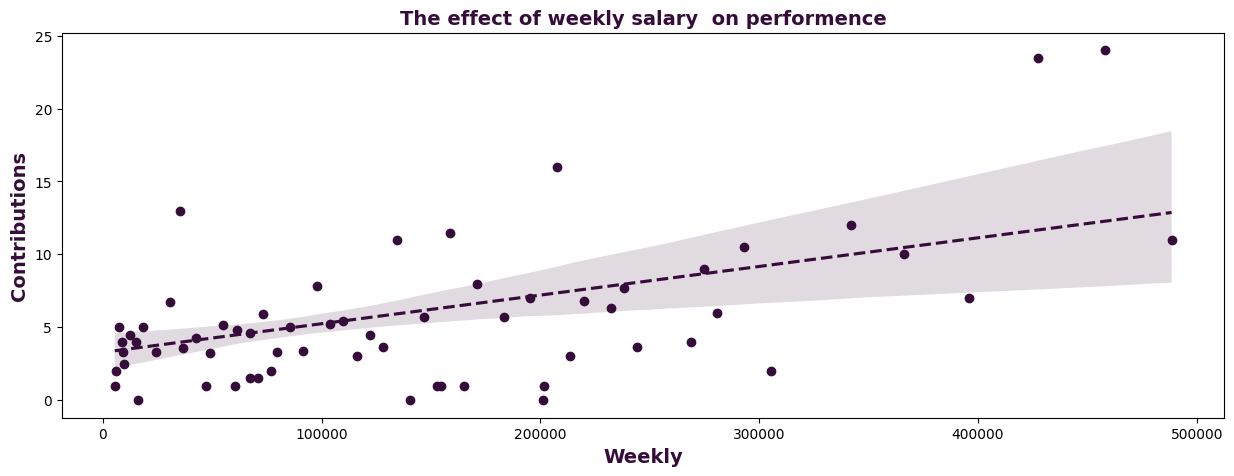

In [159]:
per_by_salary=pd.DataFrame(df_filtered.groupby('Weekly')['Contributions'].mean())
per_by_salary=per_by_salary.sort_values('Weekly',ascending=True)
per_by_salary.reset_index(inplace=True)
plt.figure(figsize=[15,5])
plt.scatter(per_by_salary['Weekly'], per_by_salary['Contributions'],c='#360D3A')
plt.title('The effect of weekly salary  on performence', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('weekly salary ',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('contributions',fontsize=14, fontweight='bold',color='#360D3A')
sns.regplot(data=df_filtered, x='Weekly', y='Contributions', scatter=False, color='#360D3A', line_kws={'linestyle':'--'})
plt.show()

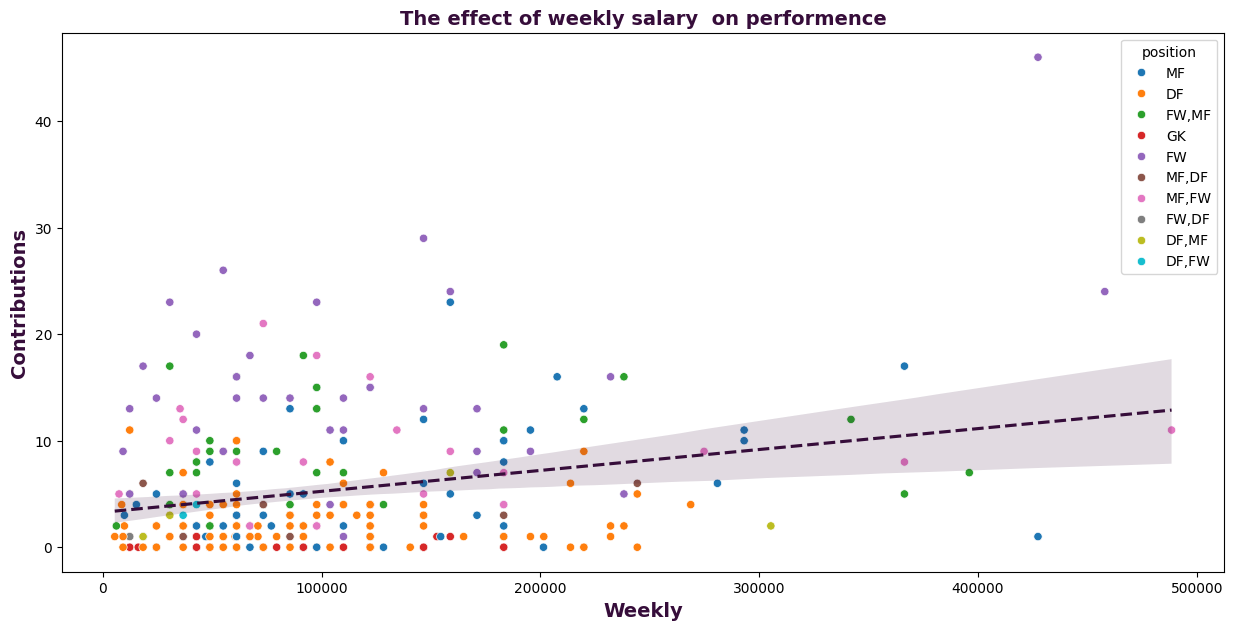

In [160]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df_filtered,
    x='Weekly',
    y='Contributions',
    hue='position',           # لون حسب المركز → يعطي فكرة أفضل
    #size='minutes',           # حجم النقطة حسب الدقائق → يبرز اللاعبين الأكثر لعباً
    #sizes=(40, 220),
    color='#360D3A'
)

plt.title('The effect of weekly salary  on performence', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('weekly salary (£)',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('contributions',fontsize=14, fontweight='bold',color='#360D3A')
sns.regplot(data=df_filtered, x='Weekly', y='Contributions', scatter=False, color='#360D3A', line_kws={'linestyle':'--'})
plt.show()

In [161]:
data

week  Day        Date   Time             Home  HomeScore  \
0     1.0  Fri  2024-08-16  20:00   Manchester Utd          1   
1     1.0  Sat  2024-08-17  12:30     Ipswich Town          0   
2     1.0  Sat  2024-08-17  15:00    Newcastle Utd          1   
3     1.0  Sat  2024-08-17  15:00          Everton          0   
4     1.0  Sat  2024-08-17  15:00  Nott'ham Forest          1   
..    ...  ...         ...    ...              ...        ...   
375  38.0  Sun  2025-05-25  16:00  Nott'ham Forest          0   
376  38.0  Sun  2025-05-25  16:00           Fulham          0   
377  38.0  Sun  2025-05-25  16:00    Newcastle Utd          0   
378  38.0  Sun  2025-05-25  16:00      Bournemouth          2   
379  38.0  Sun  2025-05-25  16:00        Tottenham          1   

                Away  AwayScore  Attendance                      Venue  \
0             Fulham          0     73297.0               Old Trafford   
1          Liverpool          2     30014.0       Portman Road Stadium   
2        Southampton          0     52196.0             St James' Park   
3           Brighton          3     39217.0              Goodison Park   
4        Bournemouth          1     29763.0            The City Ground   
..               ...        ...         ...                        ...   
375          Chelsea          1     30263.0            The City Ground   
376  Manchester City          2     27671.0             Craven Cottage   
377          Everton          1     52221.0             St James' Park   
378   Leicester City          0     11238.0           Vitality Stadium   
379         Brighton          4     61449.0  Tottenham Hotspur Stadium   

             Referee Score  Totale_Goals Time_of_the_day  
0       Robert Jones   1:0             1         Evening  
1       Tim Robinson   0:2             2       Afternoon  
2       Craig Pawson   1:0             1       Afternoon  
3       Simon Hooper   0:3             3       Afternoon  
4     Michael Oliver   1:1             2       Afternoon  
..               ...   ...           ...             ...  
375   Anthony Taylor   0:1             1       Afternoon  
376    Andrew Madley   0:2             2       Afternoon  
377  Tony Harrington   0:1             1       Afternoon  
378      Lewis Smith   2:0             2       Afternoon  
379     Robert Jones   1:4             5       Afternoon  

[380 rows x 14 columns]

In [162]:
data['MatchResult'] = 'Draw'
data.loc[data['HomeScore'] > data['AwayScore'], 'MatchResult'] = 'Home Win'
data.loc[data['HomeScore'] < data['AwayScore'], 'MatchResult'] = 'Away Win'
attendance_vs_score = data[['HomeScore', 'AwayScore', 'Attendance', 'Totale_Goals', 'MatchResult']].dropna(subset=['Attendance'])

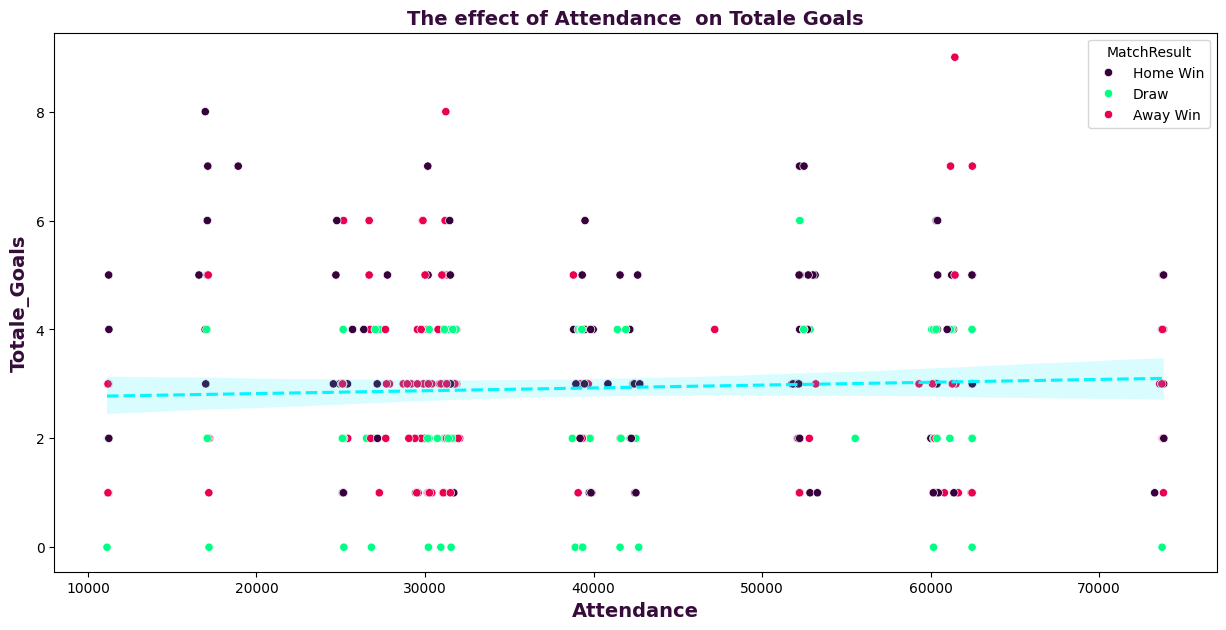

In [163]:
 
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=attendance_vs_score,
    x='Attendance',
    y='Totale_Goals',
    hue='MatchResult',
    hue_order=['Home Win', 'Draw', 'Away Win'],
    palette={'Home Win': '#38003c', 'Draw': '#00ff85', 'Away Win': '#e90052'}
)

plt.title('The effect of Attendance  on Totale Goals', fontsize=14, fontweight='bold',color='#360D3A')
plt.xlabel('Attendance',fontsize=14, fontweight='bold',color='#360D3A')
plt.ylabel('Totale Goals',fontsize=14, fontweight='bold',color='#360D3A')
sns.regplot(data=attendance_vs_score, x='Attendance', y='Totale_Goals', scatter=False, color='#04f5ff', line_kws={'linestyle':'--'})
plt.show()

In [164]:
# seting the target
data['result']=np.where(data['HomeScore']==data['AwayScore'],0,np.where(data['HomeScore']>data['AwayScore'],1,2))# drow = 0 , homewin=1 , awaywin=2


In [165]:
distrubution=pd.DataFrame(data['result'].value_counts())
distrubution.reset_index(inplace=True)
distrubution['Percentages']=(distrubution['count']/380)*100
distrubution['win']=np.where(distrubution['result']==0,'Drow',np.where(distrubution['result']==1,'HomeWin','AwayWin'))
distrubution

result  count  Percentages      win
0       1    155    40.789474  HomeWin
1       2    132    34.736842  AwayWin
2       0     93    24.473684     Drow

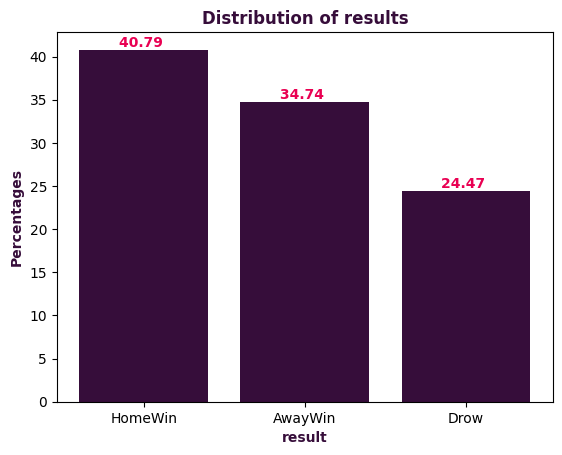

In [166]:
plt.bar(distrubution['win'],distrubution['Percentages'],color='#360D3A')
plt.bar_label(plt.gca().containers[0],fmt='%.2f ',fontweight='bold',color='#E90052')
plt.xlabel('result',fontweight='bold',color='#360D3A')
plt.ylabel('Percentages',fontweight='bold',color='#360D3A')
plt.title("Distribution of results",fontweight='bold',color='#360D3A')
plt.show()

In [167]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])
data.dtypes

C:\Users\eloma\AppData\Local\Temp\ipykernel_8212\4152643105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


week                      float64
Day                        object
Date               datetime64[ns]
Time               datetime64[ns]
Home                       object
HomeScore                   int64
Away                       object
AwayScore                   int64
Attendance                float64
Venue                      object
Referee                    object
Score                      object
Totale_Goals                int64
Time_of_the_day            object
MatchResult                object
result                      int64
dtype: object

In [168]:
data['win']=np.where(data['result']==0,'Drow',np.where(data['result']==1,'HomeWin','AwayWin'))
data=data.sort_values('Date')


In [169]:
data['day_of_week'] = data['Date'].dt.dayofweek

In [170]:
data['is_weekend']=np.where(data['day_of_week'].isin([5,6]),1,0)

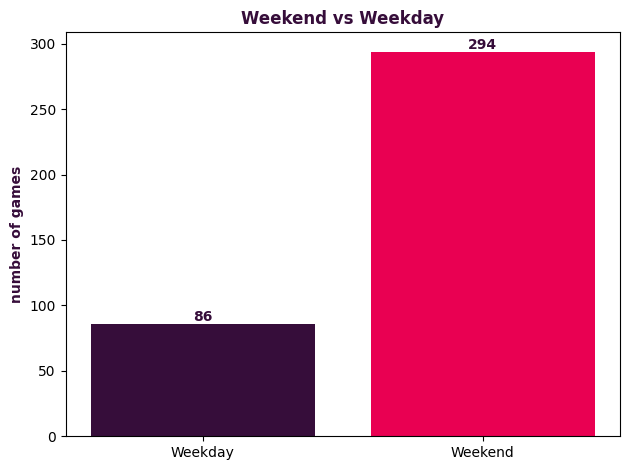

In [171]:
weekend_data = data['is_weekend'].value_counts()
labels = ['Weekday', 'Weekend']
plt.bar(labels, [weekend_data.get(0, 0), weekend_data.get(1, 0)], color=['#360D3A', '#E90052'])
plt.bar_label(plt.gca().containers[0], fmt='%d', fontweight='bold', color='#360D3A')
plt.title('Weekend vs Weekday', fontweight='bold', color='#360D3A')
plt.ylabel('number of games', fontweight='bold', color='#360D3A')

plt.tight_layout()
plt.show()

In [172]:
result_by_weekend=pd.DataFrame(data.groupby('is_weekend')['result'].value_counts())
result_by_weekend.reset_index(inplace=True)
result_by_weekend['winer']=np.where(result_by_weekend['result']==0,'Drow',np.where(result_by_weekend['result']==1,'HomeWin','AwayWin'))
result_by_weekend

is_weekend  result  count    winer
0           0       1     47  HomeWin
1           0       2     21  AwayWin
2           0       0     18     Drow
3           1       2    111  AwayWin
4           1       1    108  HomeWin
5           1       0     75     Drow

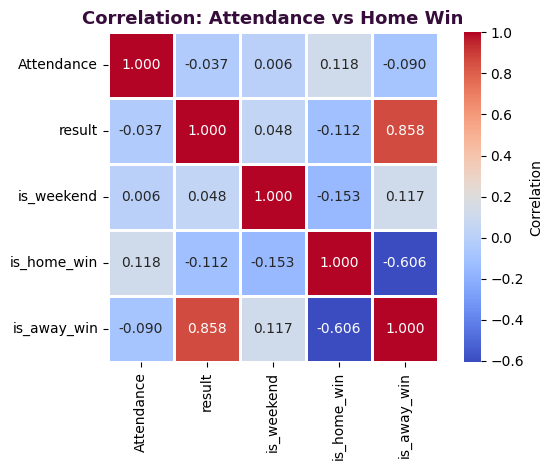

In [173]:
data['is_home_win'] = (data['result'] == 1).astype(int)
data['is_away_win'] = (data['result'] == 2).astype(int)
corr= data[['Attendance','result','is_weekend','is_home_win','is_away_win']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f",square=True, linewidths=2, cbar_kws={'label': 'Correlation'})
plt.title('Correlation: Attendance vs Home Win',fontweight='bold', fontsize=13, color='#360D3A')
plt.tight_layout()
plt.show()